# Analysez des données de systèmes éducatifs

## Problématiques et questionnements

- Quels sont les pays avec un fort potentiel de clients pour nos services ?
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
- Dans quels pays l'entreprise doit-elle opérer en priorité ?

## Mission 

Données : https://datacatalog.worldbank.org/dataset/education-statistics \
Informations supplémentaires : http://datatopics.worldbank.org/education

### Méthodologie 

1. Pré-analyse 
- Valider la qualité de ce jeu de données 
- Décrire les informations contenues dans le jeu de données
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde

2. Nettoyage de données
- Sélections de la periode pertinente
- Suppression des régions non pertinente
- Suppression des lignes vides
- Remplissage des valeurs NaN 
3. Scoring
- Regroupement d'indicateur par Topic
- Scoring des Topics
- Score général

4. Conclusion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go_carte 
import matplotlib.gridspec as gridspec

# Pré-analyse

##  Data 1

In [2]:
data1 = pd.read_csv('EdStatsCountry-Series.csv')
data1.shape 

(613, 4)

Notre dataframe est composé de 613 lignes pour 4 colonnes.

In [3]:
data1.head()

CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population...         NaN  
1  Data sources: United Nations World Population ...         NaN  
2  Data sources: United Nations World Population ...         NaN  
3                 Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population...         NaN

In [4]:
data1.columns

Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')

In [5]:
data1.dtypes #3 colonnes de type objet et 1 de type float

CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object

In [6]:
data1.isna().mean() #Unnamed a 100 % de valeurs manquantes, on la retirera

CountryCode    0.0
SeriesCode     0.0
DESCRIPTION    0.0
Unnamed: 3     1.0
dtype: float64

In [7]:
total_valeurs = data1.shape[0]*data1.shape[1]
total_valeurs_na = data1.isna().sum().sum()
print("Notre jeu de donnée a un total de ", total_valeurs, " valeurs.")
print("Par ailleurs, elle a ", total_valeurs_na, " valeurs manquantes.")
print("Cela fait donc une proportion de ", (total_valeurs_na/total_valeurs)*100, "% de valeurs manquantes.")

Notre jeu de donnée a un total de  2452  valeurs.
Par ailleurs, elle a  613  valeurs manquantes.
Cela fait donc une proportion de  25.0 % de valeurs manquantes.


Visualisons comment sont réparties ces valeurs NaN : 

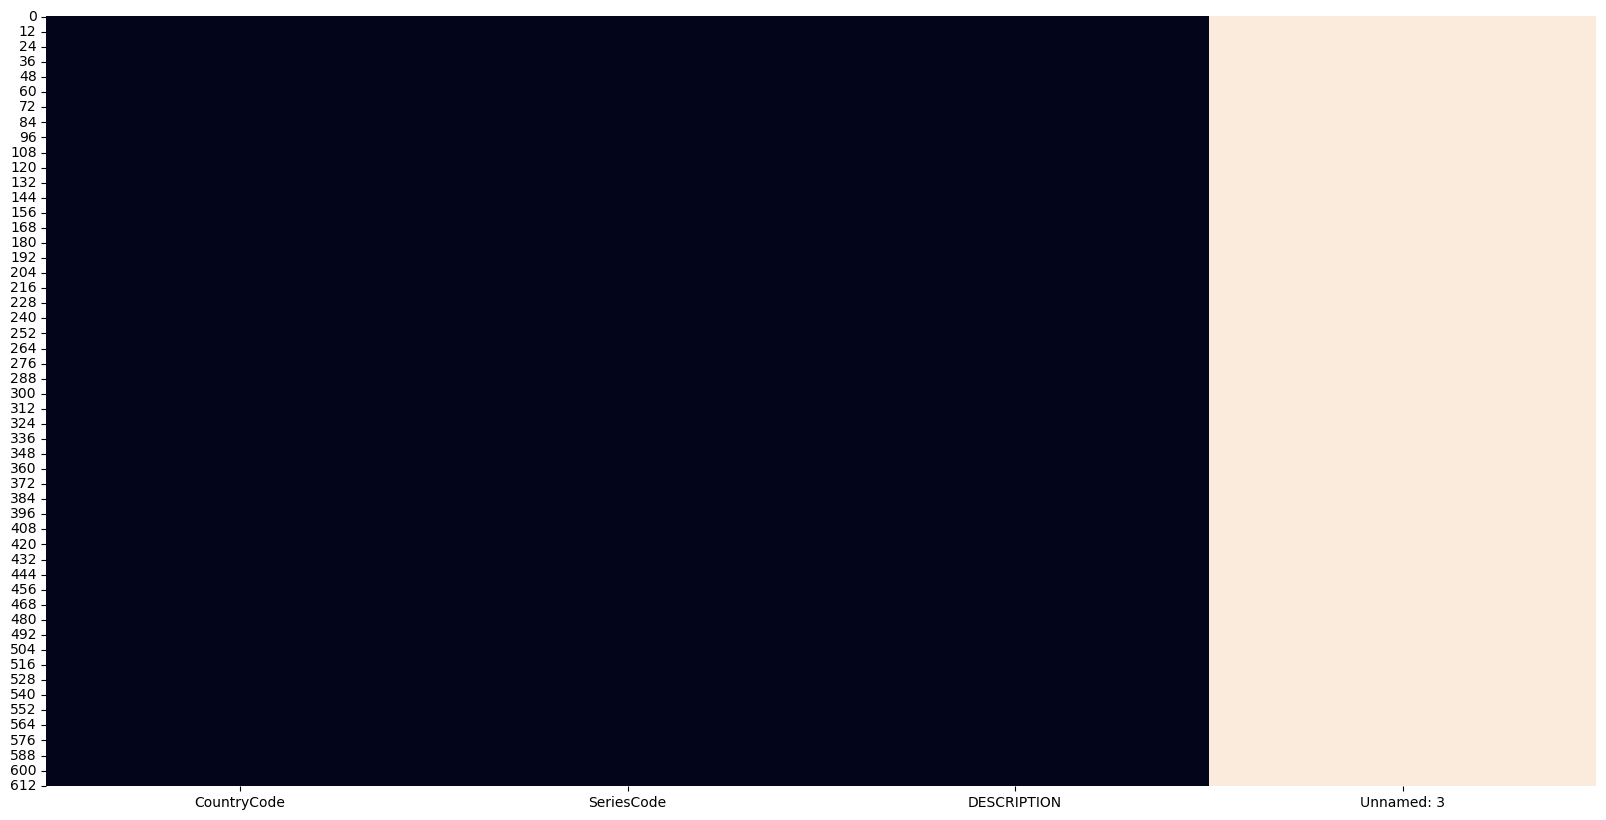

In [8]:
plt.figure(figsize=(20, 10))
sns.heatmap(data1.isna(), cbar=False)
plt.show()

On observe que les valeurs manquantes sont à 100% pour la variable Unnamed: 3.

In [9]:
data1['CountryCode'].unique() #Code des pays 

array(['ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM',
       'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD',
       'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA',
       'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHI', 'CHL',
       'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI',
       'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM',
       'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'FIN', 'FJI',
       'FRA', 'FRO', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIB', 'GIN',
       'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 'GUM', 'GUY',
       'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IMN', 'IND', 'IRL',
       'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ',
       'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN',
       'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA',
       'MAC', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEX', 'MHL', 'MKD',
       'MLI', 'MLT',

In [10]:
data1['SeriesCode'].unique() #Code des facteurs

array(['SP.POP.TOTL', 'SP.POP.GROW', 'NY.GDP.PCAP.PP.CD',
       'NY.GDP.MKTP.PP.KD', 'NY.GNP.MKTP.PP.CD', 'NY.GDP.MKTP.PP.CD',
       'NY.GDP.PCAP.PP.KD', 'NY.GNP.PCAP.PP.CD', 'SP.POP.1564.TO.ZS',
       'SP.POP.TOTL.MA.ZS', 'SP.POP.TOTL.FE.ZS', 'SP.POP.0014.TO.ZS',
       'NY.GNP.PCAP.CD', 'NY.GDP.PCAP.CD', 'NY.GDP.PCAP.KD',
       'SP.POP.1564.MA.IN', 'SP.POP.0014.TO', 'SP.POP.1564.TO',
       'SP.POP.1564.FE.IN', 'SP.POP.0014.MA.IN', 'SP.POP.0014.FE.IN'],
      dtype=object)

In [11]:
data1['DESCRIPTION'].unique() #Description sur la source des données & quelques notes.

array(['Data sources : United Nations World Population Prospects',
       'Data sources: United Nations World Population Prospects',
       'Estimates are based on regression.',
       'Data sources : Institute of Statistics, Eurostat',
       'Data sources : Australian Bureau of Statistics',
       'Including Other Territories comprising Jervis Bay Territory, Christmas Island and the Cocos (Keeling) Islands. ',
       'Data sources: Australian Bureau of Statistics',
       'Data sources : Eurostat',
       'Data sources : Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources: Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources : National Statistical Committee of the Republic of Belarus',
       'Data sources: National Statistical Committee of the Republic of Belarus',
       'Data sources : Bermuda Government Department of Statistics',
       'Data sources: Bermuda Government Departme

In [12]:
data1.duplicated(['CountryCode', 'SeriesCode', 'DESCRIPTION']).sum() #Pas de doublons dans le jeu de donnée

0

In [13]:
data1.describe(exclude = [np.number]).T

count unique                                                top  \
CountryCode   613    211                                                MDA   
SeriesCode    613     21                                        SP.POP.TOTL   
DESCRIPTION   613     97  Data sources : United Nations World Population...   

            freq  
CountryCode   18  
SeriesCode   211  
DESCRIPTION  154

On observe que le fichier contient 211 pays, 21 facteurs et 97 Descriptions différentes.

In [14]:
data1.drop('Unnamed: 3', axis=1, inplace = True) #Suppression de 'Unnamed : 3' 

In [15]:
data1.head() 

CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  
0  Data sources : United Nations World Population...  
1  Data sources: United Nations World Population ...  
2  Data sources: United Nations World Population ...  
3                 Estimates are based on regression.  
4  Data sources : United Nations World Population...

In [16]:
data1.groupby(['SeriesCode'])['CountryCode'].count().reset_index().sort_values(by='CountryCode', ascending=False) 
#Certaines variables sont disponibles pour tous les pays mais la majorité pour très peu

SeriesCode  CountryCode
18        SP.POP.TOTL          211
17        SP.POP.GROW          211
4   NY.GDP.PCAP.PP.CD           19
5   NY.GDP.PCAP.PP.KD           19
8   NY.GNP.PCAP.PP.CD           19
0   NY.GDP.MKTP.PP.CD           14
6   NY.GNP.MKTP.PP.CD           14
1   NY.GDP.MKTP.PP.KD           14
12  SP.POP.0014.TO.ZS           13
19  SP.POP.TOTL.FE.ZS           13
16  SP.POP.1564.TO.ZS           13
20  SP.POP.TOTL.MA.ZS           13
7      NY.GNP.PCAP.CD            6
3      NY.GDP.PCAP.KD            5
2      NY.GDP.PCAP.CD            5
11     SP.POP.0014.TO            4
13  SP.POP.1564.FE.IN            4
14  SP.POP.1564.MA.IN            4
15     SP.POP.1564.TO            4
9   SP.POP.0014.FE.IN            4
10  SP.POP.0014.MA.IN            4

In [17]:
data1.groupby(['CountryCode'])['SeriesCode'].count().reset_index().sort_values(by='SeriesCode', ascending=False)
#Certains pays ont quasiment tous les facteurs de disponibles, la majorité en ont peu

CountryCode  SeriesCode
120         MDA          18
68          GEO          18
47          CYP          12
173         SRB          12
134         MUS          12
..          ...         ...
77          GRL           2
78          GTM           2
79          GUM           2
81          HKG           2
210         ZWE           2

[211 rows x 2 columns]

## Bilan de EdStatsCountry-Series

- Le jeu de donnée donne accès à une description pour certaines variables et pour certains pays (211 pays, 21 facteurs). Ces descriptions indiquent la provenance des données ainsi que des notes plus spécifiques.
- Le jeu de donnée est composée de 611 lignes ainsi que de 4 colonnes.
- On a identifié que la colonne Unnamed: 3 était à 100% vide, on l'a donc supprimé.
- Aucun doublons détectés.
- Tous les états n'ont pas le même nombre de facteurs et chaque facteurs n'est pas disponible en même proportion pour les états.
- Data1 pas forcément interessant pour le moment, on se laisse la liberté de le garder en fonction des autres dataframes.

## Data 2

In [18]:
data2 = pd.read_csv('EdStatsCountry.csv')
data2.shape #241 lignes pour 32 colonnes

(241, 32)

In [19]:
data2.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

In [20]:
data2.head()

Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   
3          ALB      Albania      Albania           Republic of Albania   
4          AND      Andorra      Andorra       Principality of Andorra   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   
3           AL    Albanian lek   
4           AD            Euro   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   
3                                                NaN   
4                                                NaN   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   
1                 South Asia            Low income        AF  ...   
2         Sub-Saharan Africa   Upper middle income        AO  ...   
3      Europe & Central Asia   Upper middle income        AL  ...   
4      Europe & Central Asia  High income: nonOECD        AD  ...   

            IMF data dissemination standard  \
0                                       NaN   
1  General Data Dissemination System (GDDS)   
2  General Data Dissemination System (GDDS)   
3  General Data Dissemination System (GDDS)   
4                                       NaN   

                            Latest population census  \
0                                               2010   
1                                               1979   
2                                               1970   
3                                               2011   
4  2011. Population figures compiled from adminis...   

                             Latest household survey  \
0                                                NaN   
1  Multiple Indicator Cluster Survey (MICS), 2010/11   
2               Malaria Indicator Survey (MIS), 2011   
3       Demographic and Health Survey (DHS), 2008/09   
4                                                NaN   

   Source of most recent Income and expenditure data  \
0                                                NaN   
1            Integrated household survey (IHS), 2008   
2            Integrated household survey (IHS), 2008   
3  Living Standards Measurement Study Survey (LSM...   
4                                                NaN   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   
2                         NaN                       2015   
3                         Yes                       2012   
4                         Yes                        NaN   

  Latest industrial data Latest trade data Latest water withdrawal data  \
0                    NaN            2012.0                          NaN   
1                    NaN            2012.0                         2000   
2                    NaN               NaN                         2005   
3                 2010.0            2012.0                         2006   
4                    NaN            2006.0                          NaN   

  Unnamed: 31  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 32 columns]

In [21]:
data2.isna().mean().sort_values(ascending=False) 
#Unnamed, Other Groups, Alternative conversion factor, Vital registration complete > 50% de NaN

Unnamed: 31                                          1.000000
National accounts reference year                     0.867220
Alternative conversion factor                        0.804979
Other groups                                         0.759336
Latest industrial data                               0.556017
Vital registration complete                          0.539419
External debt Reporting status                       0.485477
Latest household survey                              0.414938
Latest agricultural census                           0.410788
Lending category                                     0.402490
PPP survey year                                      0.398340
Special Notes                                        0.398340
Source of most recent Income and expenditure data    0.336100
Government Accounting concept                        0.331950
Latest water withdrawal data                         0.257261
IMF data dissemination standard                      0.248963
Balance 

In [22]:
total_valeurs = data2.shape[0]*data2.shape[1]
total_valeurs_na = data2.isna().sum().sum()
print("Notre jeu de donnée a un total de ", total_valeurs, " valeurs.")
print("Par ailleurs, elle a ", total_valeurs_na, " valeurs manquantes.")
print("Cela fait donc une proportion de ", round((total_valeurs_na/total_valeurs)*100,2), "% de valeurs manquantes.")

Notre jeu de donnée a un total de  7712  valeurs.
Par ailleurs, elle a  2354  valeurs manquantes.
Cela fait donc une proportion de  30.52 % de valeurs manquantes.


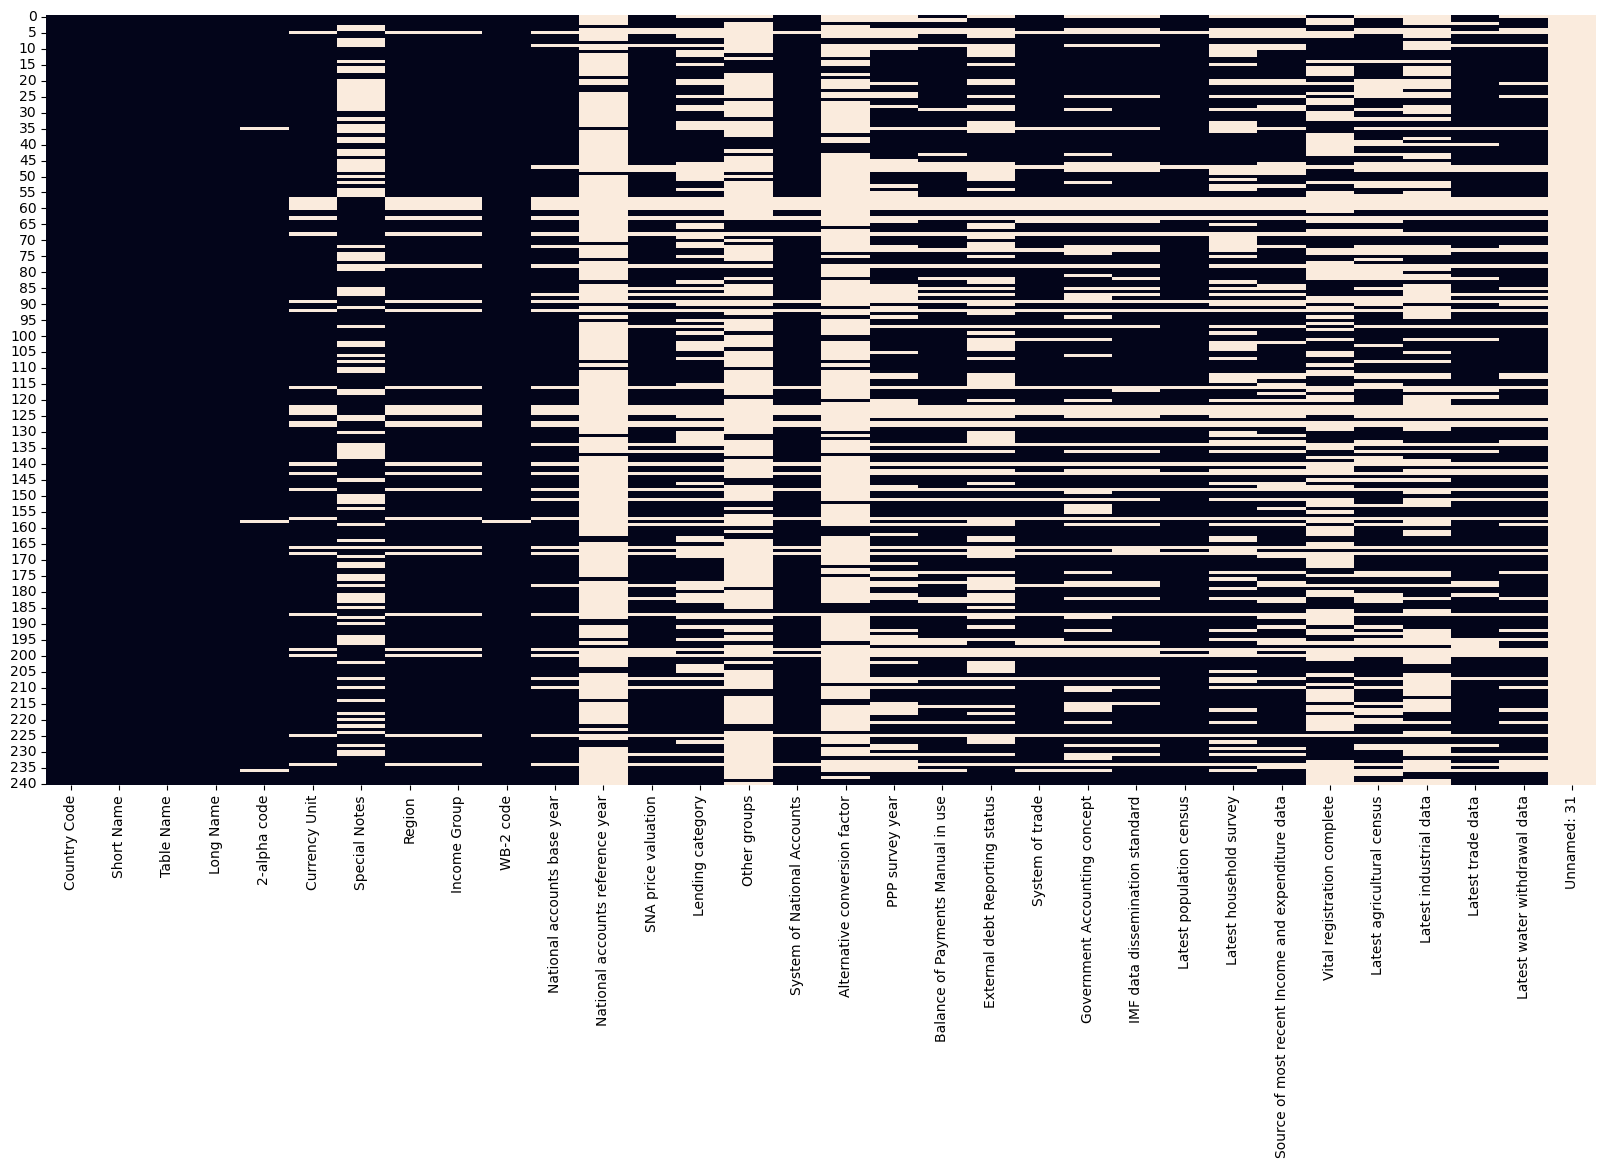

In [23]:
plt.figure(figsize=(20, 10))
sns.heatmap(data2.isna(), cbar=False)
plt.show()

On observe que certaines variables ont beaucoup de valeurs NaN, à l'image de 'National accounts reference year', 'Other groups' et 'alternative conversion factor'. Il conviendra donc de les supprimer. On observe également que certains groupes de pays viennent à avoir énormement de valeurs NaN, on les supprimera probablement.

In [24]:
data2.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

In [25]:
data2.duplicated('Country Code').sum() #Pas de doublons

0

Country Code : Code pour chaque état.                                      
Short Name : Nom court de chaque état.                                       
Table Name : Nom de la table (état).                                         
Long Name : Nom complet de chaque état.                                            
2-alpha code : Code pour chaque état suivant la norme ISO 3166.                                          
Currency Unit : Unité Monétaire (Euro, dollar, franc suisse etc...)                                      
Special Notes : Note concernant les données (provenance, situation économique ...)                                        
Region : Région du monde dans lequelle le pays est situé (Europe de l'ouest, afrique subsaharienne...)                          Income Group : Niveau de revenu (Peut aider pour un éventuel scoring)                                         
WB-2 code : Code WorldBank                                            
National accounts base year : Année utilisée comme période de base pour les calculs à prix constants dans les comptes nationaux  National accounts reference year : Année de réference des comptes nationaux                  
SNA price valuation : 'Value added at basic prices (VAB)' ou 'Value added at producer prices (VAP)'.                            Lending category : prêt 'IDA', 'IBRD', 'Blend'. IDA pour pays pauvre, sinon IBRD, si les deux alors Blend.                     Other groups : 'HIPC' : Pays pauvres très endettés , 'Euro area' : zone euro.                                    
System of National Accounts : Country uses the 1993 (ou 1968 ou 1993) System of National Accounts methodology.'                  Alternative conversion factor : '1991–96', '1971–84', '1990–95'...                        
PPP survey year : année d'enquête sur les parités de pouvoir d'achat                                       
Balance of Payments Manual in use : Manuel de la balance des paiements en cours d'utilisation                  
External debt Reporting status : Dette extérieure Statut de notification                      
System of trade : Système de commerce  (Général ou Spécial)                                  
Government Accounting concept : Concept de comptabilité gouvernementale (Administration centrale consolidée ou Budgétaire)      IMF data dissemination standard : Norme de diffusion des données du Fond International Monétaire (GDDS/SDDS)              
Latest population census : Dernier recensement de la population (en année)                             
Latest household survey : Dernière enquête auprès des ménages                               
Source of most recent Income and expenditure data : Source des données les plus récentes sur les revenus et les dépenses   
Vital registration complete : Enregistrement de l'état civil terminé (Oui/Non)                          
Latest agricultural census : Dernier recensement agricole (année)                         
Latest industrial data : Dernières données industrielles (année)                            
Latest trade data : Dernières données commerciales (année)                               
Latest water withdrawal data : Dernières données de prélèvement d'eau (année)

Parmis tous ces facteurs on décide pour le moment de garder : Country Code, Long Name, Region, Income Group.


In [26]:
data2 = data2[['Country Code', 'Long Name', 'Region', 'Income Group']]
data2.head()

Country Code                     Long Name                     Region  \
0          ABW                         Aruba  Latin America & Caribbean   
1          AFG  Islamic State of Afghanistan                 South Asia   
2          AGO   People's Republic of Angola         Sub-Saharan Africa   
3          ALB           Republic of Albania      Europe & Central Asia   
4          AND       Principality of Andorra      Europe & Central Asia   

           Income Group  
0  High income: nonOECD  
1            Low income  
2   Upper middle income  
3   Upper middle income  
4  High income: nonOECD

In [27]:
data2.describe(exclude = [np.number]).T

count unique                    top freq
Country Code   241    241                    ABW    1
Long Name      241    241                  Aruba    1
Region         214      7  Europe & Central Asia   57
Income Group   214      5    Upper middle income   55

In [28]:
data2['Income Group'].value_counts() 

Upper middle income     55
Lower middle income     50
High income: nonOECD    44
Low income              34
High income: OECD       31
Name: Income Group, dtype: int64

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Country Code', ylabel='Income Group'>

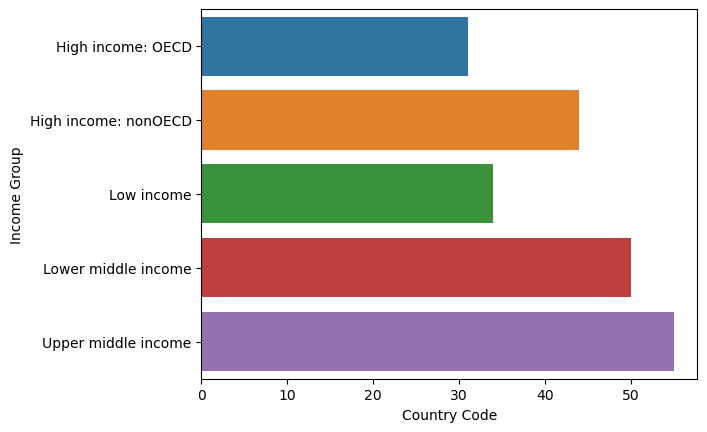

In [29]:
nb_pays_par_groupe = data2.groupby(['Income Group'])['Country Code'].count().reset_index()
sns.barplot(nb_pays_par_groupe['Country Code'], nb_pays_par_groupe['Income Group'])

In [30]:
data2['score'] = np.nan
data2.loc[(data2['Income Group'] == 'High income: nonOECD' ) | (data2['Income Group'] == 'High income: OECD'), 'score'] = 3
data2.loc[data2['Income Group'] == 'Upper middle income' , 'score'] = 2
data2.loc[data2['Income Group'] == 'Lower middle income' , 'score'] = 1
data2.loc[data2['Income Group'] == 'Low income' , 'score'] = 0

In [31]:
data2['Income Group'].unique()

array(['High income: nonOECD', 'Low income', 'Upper middle income', nan,
       'Lower middle income', 'High income: OECD'], dtype=object)

In [32]:
def indicateur_sur_carte(df, indic_column, color_scale, reverse_scale = True, map_title = "", scale_title = ""):
    
    fig = go_carte.Figure(data=go_carte.Choropleth(
        
        # Informations des données
        locations = df[df['Region'].isna() == False]['Country Code'],
        z = df[df['Region'].isna() == False][indic_column],
        text = df[df['Region'].isna() == False]['Long Name'],
        
        # Informations de la carte
        colorscale = color_scale,
        reversescale = reverse_scale,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        
        colorbar_title = scale_title,
    ))
    
    fig.update_layout(
        title_text = map_title
    )
    
    fig.show()

In [33]:
indicateur_sur_carte(data2, indic_column = 'score', color_scale = 'earth', reverse_scale = True,
          map_title = 'Niveau de revenu pour chaque pays', scale_title = "Niveau de revenu") 

## Bilan 'EdStatsCountry.csv'

- EdStatsCountry.csv contient énormement de valeurs économiques et statistiques pour chaque pays.
- Il contient 241 lignes (pays) pour 32 colonnes (variables statistiques).
- 30% des valeurs sont manquantes.
- Aucun doublons.
- On garde 'Country Code', 'Long Name', 'Region' et 'Income Group' qui sont les seules colonnes utiles et interessantes. 
- On a produit sur une carte la répartition des pays pauvre à riche, cela nous donne déjà une idée des pays qu'on pourrait sélectionner pour le programme de formation à distance.


## Data 3

In [34]:
data3 = pd.read_csv('EdStatsData.csv')

In [35]:
data3.shape #886930 lignes pour 70 colonnes

(886930, 70)

In [36]:
data3.columns 

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [37]:
data3.head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975  ...  2060  \
0        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  ...   NaN   

   2065  2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  

[5 rows x 70 columns]

In [38]:
data3.dtypes.value_counts() #Les 4 premières variables sont objets, les autres sont float

float64    66
object      4
dtype: int64

In [39]:
data3.describe(exclude=[np.number]).T #242 pays pour 3665 indicateurs

count unique  \
Country Name    886930    242   
Country Code    886930    242   
Indicator Name  886930   3665   
Indicator Code  886930   3665   

                                                              top  freq  
Country Name                                           Arab World  3665  
Country Code                                                  ARB  3665  
Indicator Name  Adjusted net enrolment rate, lower secondary, ...   242  
Indicator Code                                         UIS.NERA.2   242

In [40]:
data3.describe() 

1970          1971          1972          1973          1974  \
count  7.228800e+04  3.553700e+04  3.561900e+04  3.554500e+04  3.573000e+04   
mean   1.974772e+09  4.253638e+09  4.592365e+09  5.105006e+09  5.401493e+09   
std    1.211687e+11  1.804814e+11  1.914083e+11  2.059170e+11  2.112150e+11   
min   -1.435564e+00 -1.594625e+00 -3.056522e+00 -4.032582e+00 -4.213563e+00   
25%    8.900000e-01  8.853210e+00  9.240920e+00  9.595200e+00  9.861595e+00   
50%    6.317724e+00  6.316240e+01  6.655139e+01  6.969595e+01  7.087760e+01   
75%    6.251250e+01  5.655200e+04  5.863650e+04  6.202900e+04  6.383675e+04   
max    1.903929e+13  1.986457e+13  2.100916e+13  2.238367e+13  2.282991e+13   

               1975          1976          1977          1978          1979  \
count  8.730600e+04  3.748300e+04  3.757400e+04  3.757600e+04  3.680900e+04   
mean   2.314288e+09  5.731808e+09  6.124437e+09  6.671489e+09  7.436724e+09   
std    1.375059e+11  2.215546e+11  2.325489e+11  2.473986e+11  2.660957e+11   
min   -3.658569e+00 -2.950945e+00 -3.174870e+00 -3.558749e+00 -2.973612e+00   
25%    1.400000e+00  9.312615e+00  9.519913e+00  1.000000e+01  1.000000e+01   
50%    9.677420e+00  7.101590e+01  7.133326e+01  7.290512e+01  7.510173e+01   
75%    7.854163e+01  5.682800e+04  5.739175e+04  5.940425e+04  6.411500e+04   
max    2.300634e+13  2.424128e+13  2.521383e+13  2.622101e+13  2.730873e+13   

       ...          2060          2065          2070          2075  \
count  ...  5.143600e+04  5.143600e+04  5.143600e+04  5.143600e+04   
mean   ...  7.224868e+02  7.271290e+02  7.283779e+02  7.266484e+02   
std    ...  2.215845e+04  2.287990e+04  2.352338e+04  2.408149e+04   
min    ... -1.630000e+00 -1.440000e+00 -1.260000e+00 -1.090000e+00   
25%    ...  3.000000e-02  3.000000e-02  2.000000e-02  2.000000e-02   
50%    ...  2.300000e-01  2.300000e-01  2.300000e-01  2.300000e-01   
75%    ...  7.505000e+00  7.500000e+00  7.300000e+00  7.100000e+00   
max    ...  2.951569e+06  3.070879e+06  3.169711e+06  3.246239e+06   

               2080          2085          2090          2095          2100  \
count  5.143600e+04  5.143600e+04  5.143600e+04  5.143600e+04  5.143600e+04   
mean   7.228327e+02  7.176899e+02  7.113072e+02  7.034274e+02  6.940296e+02   
std    2.455897e+04  2.496587e+04  2.530183e+04  2.556069e+04  2.574189e+04   
min   -9.200000e-01 -7.800000e-01 -6.500000e-01 -5.500000e-01 -4.500000e-01   
25%    1.000000e-02  1.000000e-02  1.000000e-02  1.000000e-02  1.000000e-02   
50%    2.300000e-01  2.300000e-01  2.300000e-01  2.300000e-01  2.200000e-01   
75%    6.722500e+00  6.080000e+00  5.462500e+00  4.680000e+00  4.032500e+00   
max    3.301586e+06  3.337871e+06  3.354746e+06  3.351887e+06  3.330484e+06   

       Unnamed: 69  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 66 columns]

<AxesSubplot:>

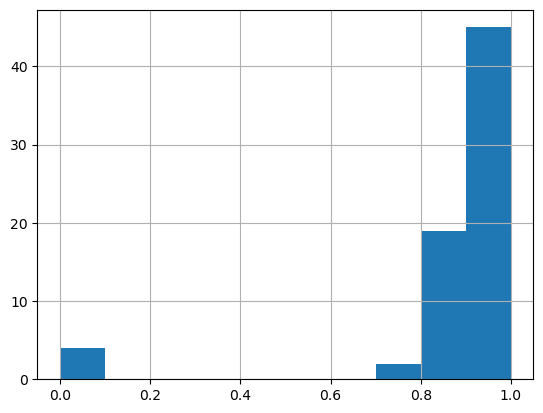

In [41]:
data3.isna().mean().hist() #beaucoup de valeurs manquantes pour la majorité des variables

In [42]:
total_valeurs = data3.shape[0]*data3.shape[1]
total_valeurs_na = data3.isna().sum().sum()
print("Notre jeu de donnée a un total de ", total_valeurs, " valeurs.")
print("Par ailleurs, elle a ", total_valeurs_na, " valeurs manquantes.")
print("Cela fait donc une proportion de ", round((total_valeurs_na/total_valeurs)*100,2), "% de valeurs manquantes.")

Notre jeu de donnée a un total de  62085100  valeurs.
Par ailleurs, elle a  53455179  valeurs manquantes.
Cela fait donc une proportion de  86.1 % de valeurs manquantes.


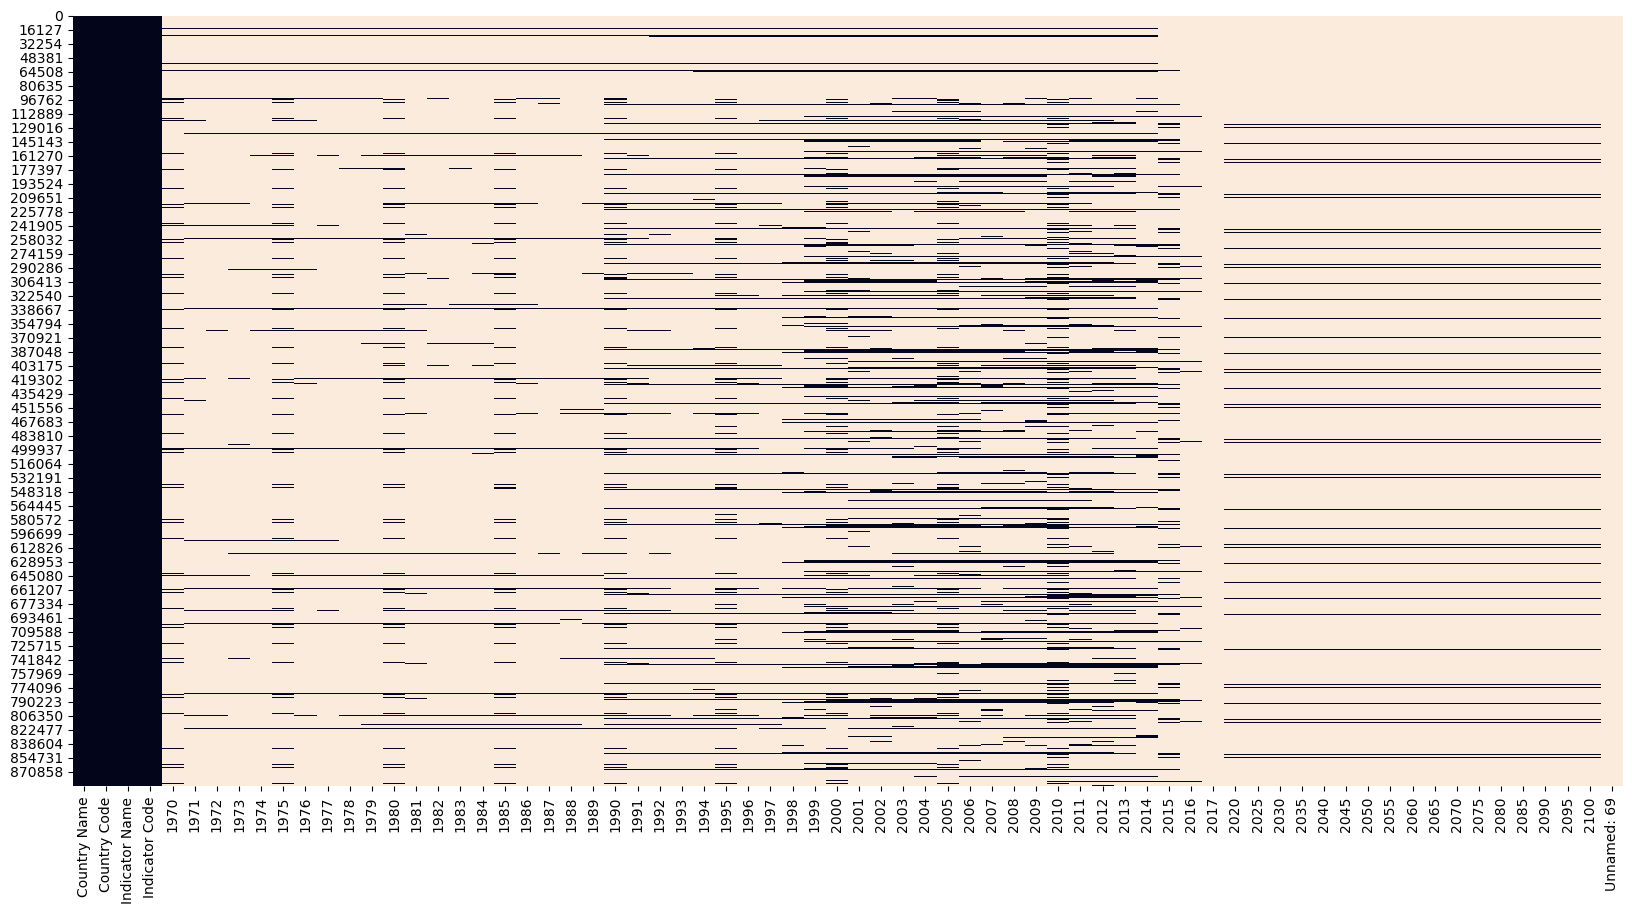

In [43]:
plt.figure(figsize=(20, 10))
sns.heatmap(data3.isna(), cbar=False)
plt.show()

In [44]:
data3.duplicated(['Country Name', 'Indicator Name', 'Indicator Code']).sum() #Aucun doublon

0

Country Name : Nom du Pays 

Country Code : Code associé au Pays

Indicator Name : Nom de l'indicateur

Indicator Code : Code associé à l'indicateur

'1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978','1979', '1980', '1981', '1982', '1983', '1984',
'1985', '1986', '1987','1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996','1997', '1998', '1999',
'2000', '2001', '2002', '2003', '2004', '2005','2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
'2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045','2050', '2055', '2060', '2065', '2070', '2075',
'2080', '2085', '2090','2095', '2100' : Années considérées pour chaque variables ci-dessus

In [45]:
data3['Country Code'].nunique() == data1['CountryCode'].nunique() #data1 et data3 ne possèdent pas les mêmes pays

False

In [46]:
data3['Country Code'].nunique() == data2['Country Code'].nunique() #data2 et data3 ne possèdent pas les mêmes pays

False

Voyons dans les deux cas quels pays viennent à manquer dans ces jeux de données : 

In [47]:
data3_pas_data1 = data3[~data3['Country Code'].isin(data1['CountryCode'])][['Country Name']]
data3_pas_data1.drop_duplicates(inplace=True)
data3_pas_data1 

Country Name
0                                              Arab World
3665                                  East Asia & Pacific
7330          East Asia & Pacific (excluding high income)
10995                                           Euro area
14660                               Europe & Central Asia
18325       Europe & Central Asia (excluding high income)
21990                                      European Union
25655              Heavily indebted poor countries (HIPC)
29320                                         High income
32985                           Latin America & Caribbean
36650   Latin America & Caribbean (excluding high income)
40315        Least developed countries: UN classification
43980                                 Low & middle income
47645                                          Low income
51310                                 Lower middle income
54975                          Middle East & North Africa
58640   Middle East & North Africa (excluding high inc...
62305                                       Middle income
65970                                       North America
69635                                        OECD members
73300                                          South Asia
76965                                  Sub-Saharan Africa
80630          Sub-Saharan Africa (excluding high income)
84295                                 Upper middle income
87960                                               World
190580                             British Virgin Islands
274875                                            Curacao
593730                                              Nauru
718340                          Sint Maarten (Dutch part)
740330                                        South Sudan
758655                           St. Martin (French part)

On observe que dans data3 en plus d'avoir les pays présents dans data2, on a des groupes/zones/régions d'appartenance géographique/démographique/économique différents. Ils seront à enlever lorsqu'on voudra étudier uniquement les pays et à sélectionner exclusivement pour des études plus globales/primaires.

In [48]:
data3_pas_data2 = data3[~data3['Country Code'].isin(data2['Country Code'])][['Country Name']]
data3_pas_data2.drop_duplicates(inplace=True)
data3_pas_data2 

Country Name
190580  British Virgin Islands

Les îles vierges britanniques sont un territoire d'outre-mer britannique, on le considerera comme une région particulière.
Revenons sur les valeurs manquantes : 

In [49]:
data3.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

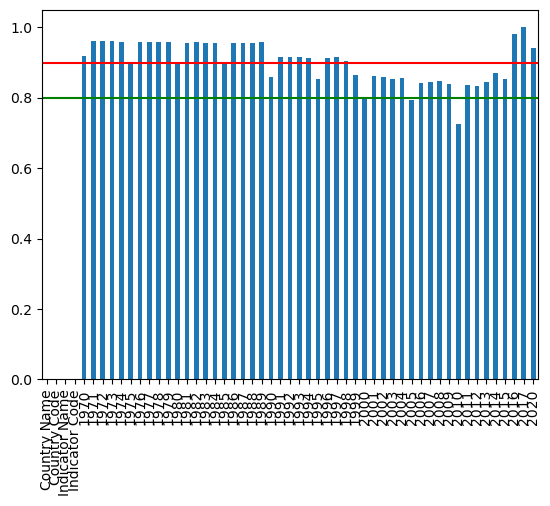

In [50]:
data3[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020']].isna().mean().plot.bar()
plt.axhline(y=0.9, color='r', linestyle='-')
plt.axhline(y=0.8, color='g', linestyle='-')
plt.show()

Beaucoup de colonnes possèdent plus de 90% de valeurs NaN dans les années passées (environ 75%), la quasi-totalité restante a entre 80% et 90% de valeurs NaN (environ 20%). On supprimera les colonnes avec trop peu d'information après avoir sélectionné les colonnes qui nous intéressent.

## Bilan 'EdStatsData.csv'

- data3 contient des données statistiques couvrant la periode 1970-2100 (avec des données prospectives donc).
- Le jeu de données contient 886 930 lignes pour 70 colonnes dans lesquelles pour chacun des 242 pays existent 3665 indicateurs statistiques.
- Le jeu de données ne contient aucun doublon et 86,1% de données manquantes. (Une majorité des colonnes ayant plus de 90% de valeurs NaN, et 20% entre 80% et 90% de NaN).
- data3 contient des données prospectives peu pertinente pour notre étude, il conviendra donc de les supprimer.
- Après comparatif avec les pays contenue dans data1 on a pu observer que data3 contenait en plus des régions/zones géographiques ayant certaines particularités socio-économique. On sera amené à les utiliser pour des études primaires plus globales.

## Data 4

In [51]:
data4 = pd.read_csv('EdStatsFootNote.csv')

In [52]:
data4.shape #643638 lignes pour 5 colonnes

(643638, 5)

In [53]:
data4.head()

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.         NaN
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.         NaN

In [54]:
data4.columns

Index(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4'], dtype='object')

In [55]:
data4.isna().mean() #0 valeurs manquantes pour toutes les variables sauf Unnamed qu'on supprimera

CountryCode    0.0
SeriesCode     0.0
Year           0.0
DESCRIPTION    0.0
Unnamed: 4     1.0
dtype: float64

In [56]:
total_valeurs = data4.shape[0]*data4.shape[1]
total_valeurs_na = data4.isna().sum().sum()
print("Notre jeu de donnée a un total de ", total_valeurs, " valeurs.")
print("Par ailleurs, elle a ", total_valeurs_na, " valeurs manquantes.")
print("Cela fait donc une proportion de ", round((total_valeurs_na/total_valeurs)*100,2), "% de valeurs manquantes.")

Notre jeu de donnée a un total de  3218190  valeurs.
Par ailleurs, elle a  643638  valeurs manquantes.
Cela fait donc une proportion de  20.0 % de valeurs manquantes.


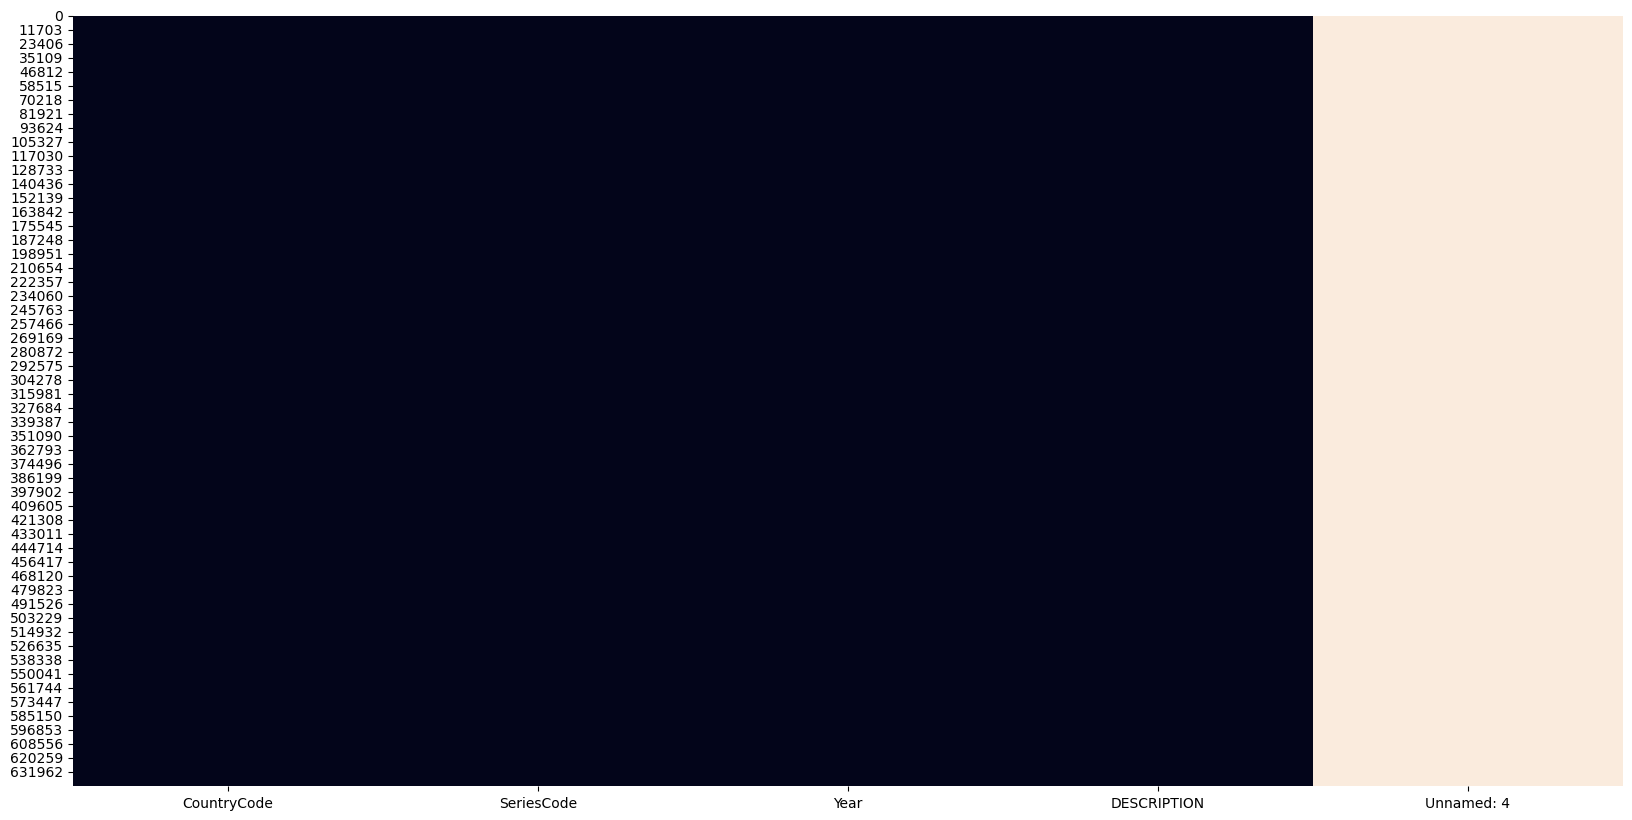

In [57]:
plt.figure(figsize=(20, 10))
sns.heatmap(data4.isna(), cbar=False)
plt.show()

In [58]:
data4.dtypes #4 colonnes de type objets et 1 de type float

CountryCode     object
SeriesCode      object
Year            object
DESCRIPTION     object
Unnamed: 4     float64
dtype: object

In [59]:
data4.describe(exclude=[np.number]).T #239 pays pour 1558 facteurs, ce qui est légèrement moins que dans data3

count unique           top    freq
CountryCode  643638    239           LIC    7320
SeriesCode   643638   1558   SH.DYN.MORT    9226
Year         643638     56        YR2004   27128
DESCRIPTION  643638   9102  Country Data  191188

In [60]:
data4.duplicated(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION']).sum() #Pas de doublons

0

In [61]:
data4['Year'].unique() #On observe que les années sont en objet, il conviendra de les transformer en valeurs numériques si besoin

array(['YR2001', 'YR2005', 'YR2000', 'YR2004', 'YR2006', 'YR2003',
       'YR1999', 'YR2008', 'YR2002', 'YR2007', 'YR2017', 'YR2010',
       'YR2009', 'YR2011', 'YR2012', 'YR2015', 'YR2014', 'YR1970',
       'YR1971', 'YR1972', 'YR1973', 'YR1974', 'YR1975', 'YR1976',
       'YR1977', 'YR1978', 'YR1979', 'YR1980', 'YR1981', 'YR1982',
       'YR1983', 'YR1984', 'YR1985', 'YR1986', 'YR1987', 'YR1988',
       'YR1989', 'YR1990', 'YR1991', 'YR1992', 'YR1993', 'YR1994',
       'YR1995', 'YR1996', 'YR1997', 'YR1998', 'YR2013', 'YR2016',
       'YR2020', 'YR2025', 'YR2030', 'YR2035', 'YR2040', 'YR2045',
       'YR2050', 'yr2012'], dtype=object)

CountryCode : Code associé chaque Etat.   
SeriesCode : Code séries    
Year : Année          
DESCRIPTION : Description de l'opération statistique.

In [62]:
data4.drop('Unnamed: 4', axis=1, inplace=True) #Suppression de 'Unnamed: 4'

Regardons les pays qui sont dans data3 mais pas dans data4:

In [63]:
data3_pas_data4 = data3[~data3['Country Code'].isin(data4['CountryCode'])][['Country Name']]
data3_pas_data4.drop_duplicates(inplace=True)
data3_pas_data4 

Country Name
370165                  Greenland
718340  Sint Maarten (Dutch part)
758655   St. Martin (French part)

Saint Martin et le Groenland (ou compté de greenland aux états unis ?) sont de toutes petites régions pas nécessairement intéressante pour notre analyse.

In [64]:
data4.columns

Index(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION'], dtype='object')

On se décide de chercher quels sont les descriptions, les facteurs ainsi que les années les plus renseignées. Pour chacun des pays : 

In [65]:
description_populaire = data4.groupby(['DESCRIPTION'])['CountryCode'].count().reset_index().sort_values(by='CountryCode', ascending=False)[:10]
description_populaire.loc[:, 'CountryCode'] = (description_populaire.loc[:, 'CountryCode']/data4.shape[0])*100
description_populaire

DESCRIPTION  CountryCode
83                                      Country Data    29.704275
1276  UNESCO Institute for Statistics (UIS) estimate    26.649607
119                                        Estimated    18.202002
1272                                  UIS Estimation     4.877742
90                               Country estimation.     4.087391
231                                National Estimate     3.661996
84                                      Country data     2.540714
232                              National Estimation     1.864557
1278             UNSD WPP08 revision file 2A and 3A.     0.540677
1197                    Reference Period: 2005-2014.     0.529179

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



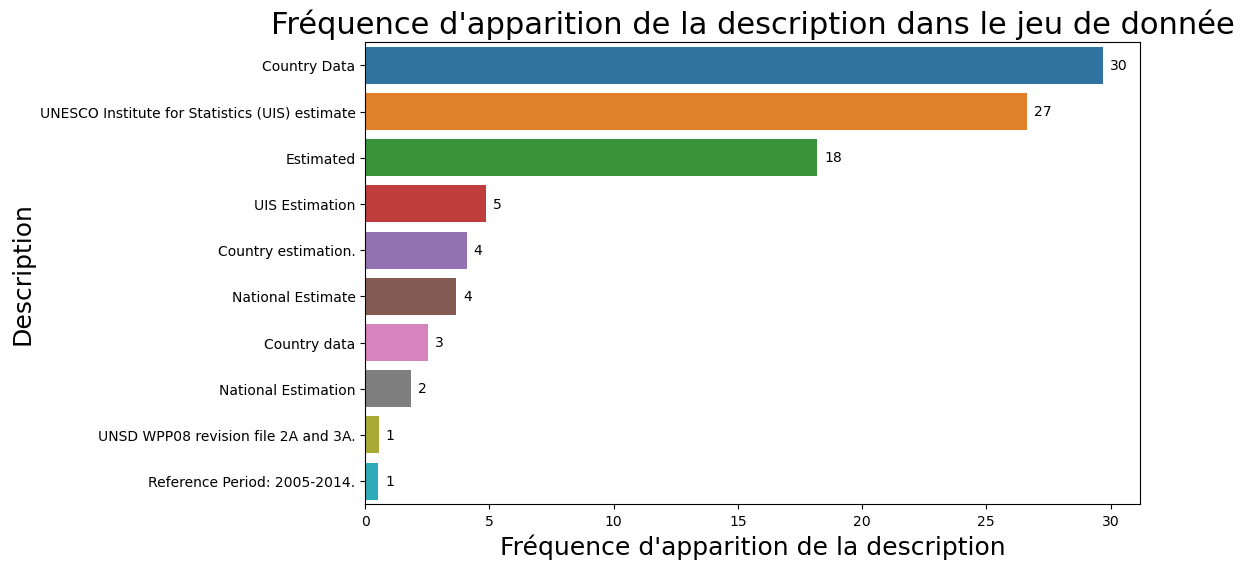

In [66]:
fig=plt.figure(figsize=(10,6))
ax=sns.barplot(description_populaire['CountryCode'], description_populaire['DESCRIPTION'])
plt.xlabel("Fréquence d'apparition de la description", fontsize=18)
plt.ylabel('Description', fontsize=18)
plt.title("Fréquence d'apparition de la description dans le jeu de donnée", fontsize=22)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

On observe que 'Country Data', 'Estimation UNESCO' et 'Estimation' sont les plus fréquentes (75% d'apparitions), les 7 autres apparaissent 20% des fois.

In [67]:
facteurs_populaire = data4.groupby(['SeriesCode'])['CountryCode'].count().reset_index().sort_values(by='CountryCode', ascending=False)[:20]
facteurs_populaire.loc[:, 'CountryCode'] = (facteurs_populaire.loc[:, 'CountryCode']/data4.shape[0])*100
facteurs_populaire

SeriesCode  CountryCode
650        SH.DYN.MORT     1.433414
504        SE.PRM.AGES     1.362723
514        SE.PRM.DURS     1.362723
560        SE.SEC.DURS     1.339107
556        SE.SEC.AGES     1.333203
515        SE.PRM.ENRL     1.026975
519        SE.PRM.ENRR     0.997144
517  SE.PRM.ENRL.FE.ZS     0.959701
516     SE.PRM.ENRL.FE     0.957837
486  SE.ENR.PRIM.FM.ZS     0.934221
520     SE.PRM.ENRR.FE     0.934065
521     SE.PRM.ENRR.MA     0.933444
561        SE.SEC.ENRL     0.918218
574        SE.SEC.ENRR     0.894602
662  SP.POP.AG11.FE.UN     0.871608
518  SE.PRM.ENRL.TC.ZS     0.856848
544        SE.PRM.TCHR     0.856693
564  SE.SEC.ENRL.FE.ZS     0.854052
562     SE.SEC.ENRL.FE     0.843331
575     SE.SEC.ENRR.FE     0.823134

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



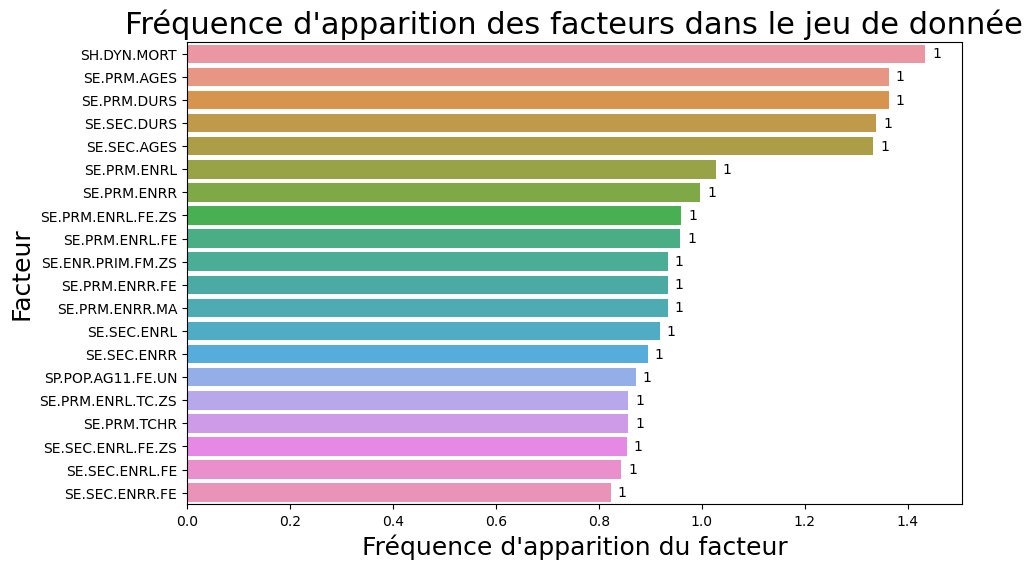

In [68]:
fig=plt.figure(figsize=(10,6))
ax=sns.barplot(facteurs_populaire['CountryCode'], facteurs_populaire['SeriesCode'])
plt.xlabel("Fréquence d'apparition du facteur", fontsize=18)
plt.ylabel('Facteur', fontsize=18)
plt.title("Fréquence d'apparition des facteurs dans le jeu de donnée", fontsize=22)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

## Bilan 'EdStatsFootNote.csv'

- data4 répertorie pour chaque couple de pays/variables une description sur la provenance/nature des données.
- Ce jeu de donnée contient 643 638 lignes pour 5 colonnes. On y trouve 239 pays et 1558 facteurs différents.
- Au total, 20% des valeurs sont manquantes car la colonne unnamed est complètement vide (on l'a donc supprimé).
- Il n'y a aucun doublon.
- 3 des 9102 descriptions ('Country Data', 'Estimation UNESCO' et 'Estimation') apparaissent 75% du temps et 7 autres apparaissent 20% du temps. Ainsi on peut réstreindre les descriptions à une dizaine.
- data4 contient l'ensemble des pays présents dans data3 sauf Saint Martin et Greenland.

## Data 5 

In [69]:
data5 = pd.read_csv('EdStatsSeries.csv')
data5.shape #3665 lignes pour 21 colonnes

(3665, 21)

In [70]:
data5.head()

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of population age 15+ wi...   
4  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   
3  Percentage of population age 15+ with no educa...   
4  Percentage of female population age 20-24 with...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   
3  Percentage of population age 15+ with no educa...              NaN   
4  Percentage of female population age 20-24 with...              NaN   

  Periodicity Base Period Other notes Aggregation method  ...  \
0         NaN         NaN         NaN                NaN  ...   
1         NaN         NaN         NaN                NaN  ...   
2         NaN         NaN         NaN                NaN  ...   
3         NaN         NaN         NaN                NaN  ...   
4         NaN         NaN         NaN                NaN  ...   

  Notes from original source  General comments  \
0                        NaN               NaN   
1                        NaN               NaN   
2                        NaN               NaN   
3                        NaN               NaN   
4                        NaN               NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   
2  Robert J. Barro and Jong-Wha Lee: http://www.b...   
3  Robert J. Barro and Jong-Wha Lee: http://www.b...   
4  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   

  Related source links Other web links  Related indicators  License Type  \
0                  NaN             NaN                 NaN           NaN   
1                  NaN             NaN                 NaN           NaN   
2                  NaN             NaN                 NaN           NaN   
3                  NaN             NaN                 NaN           NaN   
4                  NaN             NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 21 columns]

In [71]:
data5.dtypes

Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20                            float64
dtype: object

In [72]:
data5.describe(exclude=[np.number]).T 

count unique  \
Series Code                          3665   3665   
Topic                                3665     37   
Indicator Name                       3665   3665   
Short definition                     2156   1169   
Long definition                      3665   2060   
Periodicity                            99      1   
Base Period                           314      4   
Other notes                           552     14   
Aggregation method                     47      3   
Limitations and exceptions             14      9   
General comments                       14      8   
Source                               3665     31   
Statistical concept and methodology    23      2   
Development relevance                   3      1   
Related source links                  215      1   

                                                                                   top  \
Series Code                                                        BAR.NOED.1519.FE.ZS   
Topic                                                                Learning Outcomes   
Indicator Name                       Barro-Lee: Percentage of female population age...   
Short definition                     Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
Long definition                      Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
Periodicity                                                                     Annual   
Base Period                                                 Projections (2010 to 2100)   
Other notes                                                                       EGRA   
Aggregation method                                                    Weighted average   
Limitations and exceptions           Data should be used cautiously because of diff...   
General comments                     When NEET rates are available for more than tw...   
Source                                                 UNESCO Institute for Statistics   
Statistical concept and methodology                                              TIMSS   
Development relevance                Unemployment and total employment are the broa...   
Related source links                              http://saber.worldbank.org/index.cfm   

                                     freq  
Series Code                             1  
Topic                                1046  
Indicator Name                          1  
Short definition                      215  
Long definition                       215  
Periodicity                            99  
Base Period                           308  
Other notes                           403  
Aggregation method                     31  
Limitations and exceptions              3  
General comments                        3  
Source                               1269  
Statistical concept and methodology    20  
Development relevance                   3  
Related source links                  215

- 3665 facteurs (même nombre que dans data3), voir si ce sont les mêmes.
- 37 thèmes.

In [73]:
data5.describe().T #Les valeurs numériques sont complètement vide.

count  mean  std  min  25%  50%  75%  max
Unit of measure               0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Notes from original source    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Other web links               0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Related indicators            0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
License Type                  0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Unnamed: 20                   0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [74]:
data5.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')

In [75]:
data5.isna().mean() #Beaucoup de variables avec un nombre de données manquantes proche de 100 %

Series Code                            0.000000
Topic                                  0.000000
Indicator Name                         0.000000
Short definition                       0.411733
Long definition                        0.000000
Unit of measure                        1.000000
Periodicity                            0.972988
Base Period                            0.914325
Other notes                            0.849386
Aggregation method                     0.987176
Limitations and exceptions             0.996180
Notes from original source             1.000000
General comments                       0.996180
Source                                 0.000000
Statistical concept and methodology    0.993724
Development relevance                  0.999181
Related source links                   0.941337
Other web links                        1.000000
Related indicators                     1.000000
License Type                           1.000000
Unnamed: 20                            1

In [76]:
total_valeurs = data5.shape[0]*data5.shape[1]
total_valeurs_na = data5.isna().sum().sum()
print("Notre jeu de donnée a un total de ", total_valeurs, " valeurs.")
print("Par ailleurs, elle a ", total_valeurs_na, " valeurs manquantes.")
print("Cela fait donc une proportion de ", round((total_valeurs_na/total_valeurs)*100,2), "% de valeurs manquantes.")

Notre jeu de donnée a un total de  76965  valeurs.
Par ailleurs, elle a  55203  valeurs manquantes.
Cela fait donc une proportion de  71.72 % de valeurs manquantes.


Series Code : Code Séries

Topic : Sujet variés

Indicator Name : Noms des différents indicateurs 

Short definition : Courte définition

Long definition : Définition plus complète

Other notes : Notes

Source : Source.

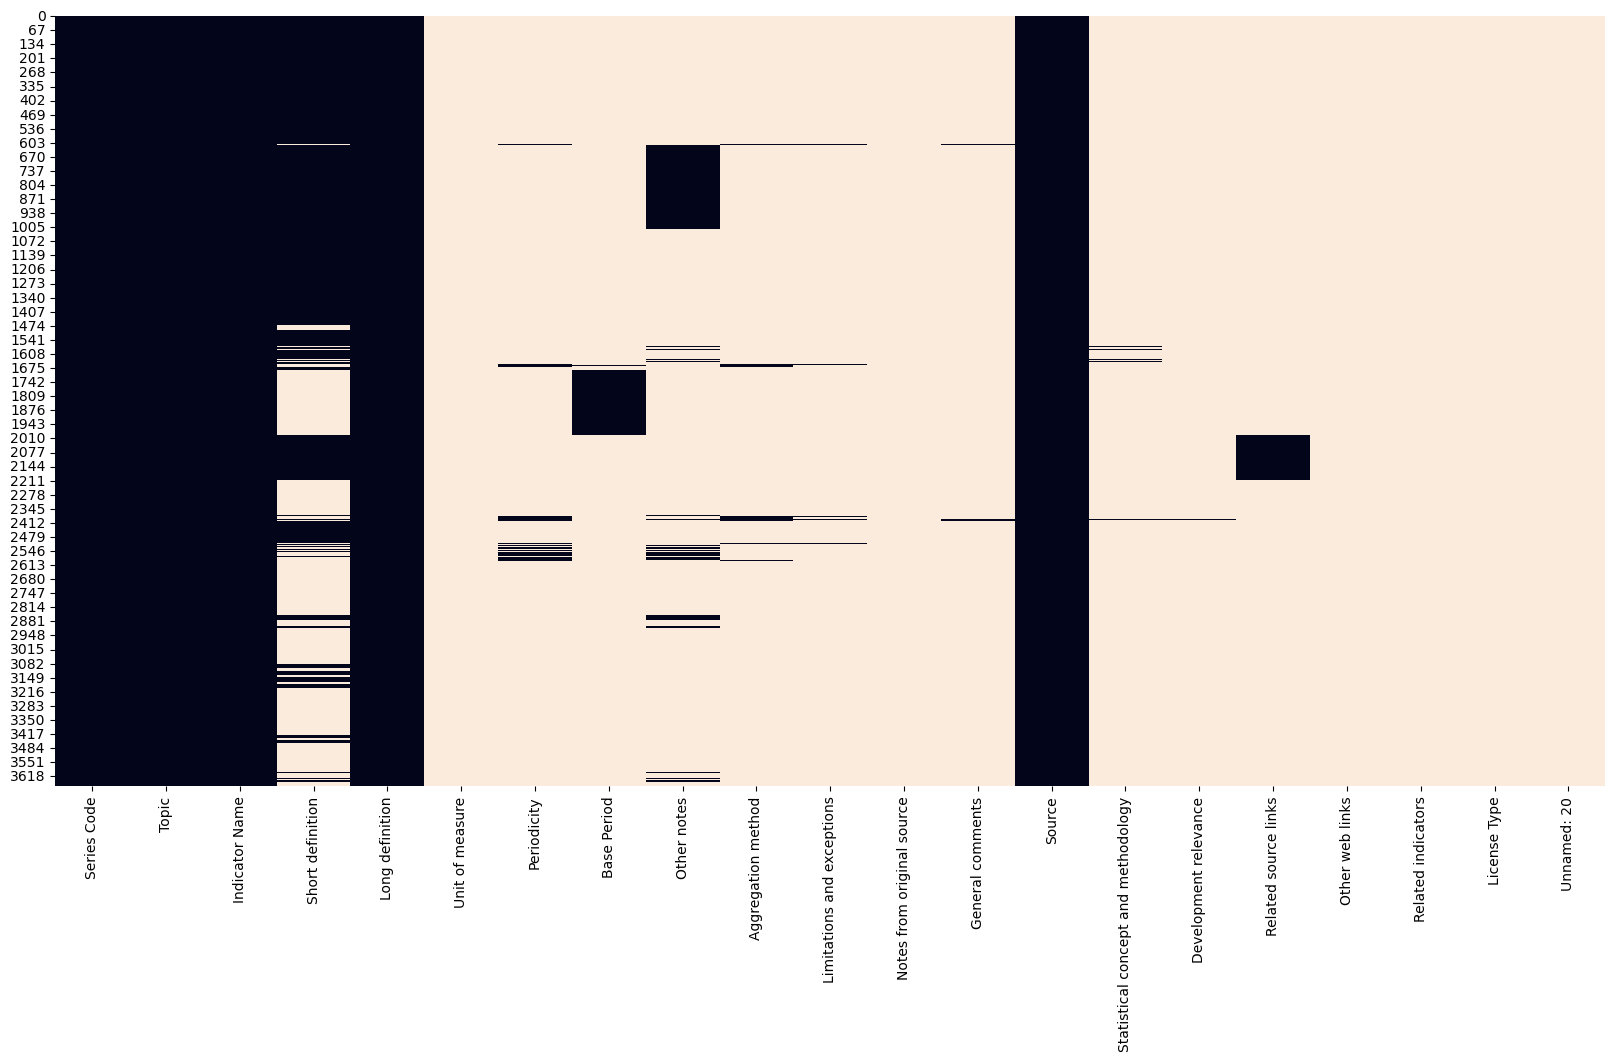

In [77]:
plt.figure(figsize=(20, 10))
sns.heatmap(data5.isna(), cbar=False)
plt.show()

On observe que certaines colonnes sont quasiment toutes vides quand d'autres sont pleines, on décide de garder 'Series Code', 'Topic', 'Indicator Name' pour une analyse plus approfondie

In [78]:
data5.duplicated(['Series Code', 'Topic', 'Indicator Name', 'Short definition','Long definition', 'Other notes', 'Source']).sum()
#Pas de doublons detectés

0

In [79]:
data5.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')

In [80]:
data5 = data5[[ 'Series Code', 'Topic', 'Indicator Name']]

Vérifions que data5 et data3 possèdent les mêmes facteurs :

In [81]:
data3['Indicator Code'].nunique() == data5['Series Code'].nunique() #Les facteurs coincident

True

In [82]:
nb_facteur_par_topic = data5.groupby(['Topic'])['Series Code'].count().reset_index().sort_values(by='Series Code', ascending = False)[:10]
nb_facteur_par_topic.loc[:, 'Series Code'] = (nb_facteur_par_topic.loc[:, 'Series Code']/data5.shape[0])*100
nb_facteur_par_topic

Topic  Series Code
19                    Learning Outcomes    28.540246
0                            Attainment    20.000000
9                    Education Equality    11.623465
28                            Secondary     6.984993
24                              Primary     6.766712
21                           Population     5.811733
34                             Tertiary     4.311050
32                             Teachers     3.738063
12                         Expenditures     2.537517
11  Engaging the Private Sector (SABER)     1.391542

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



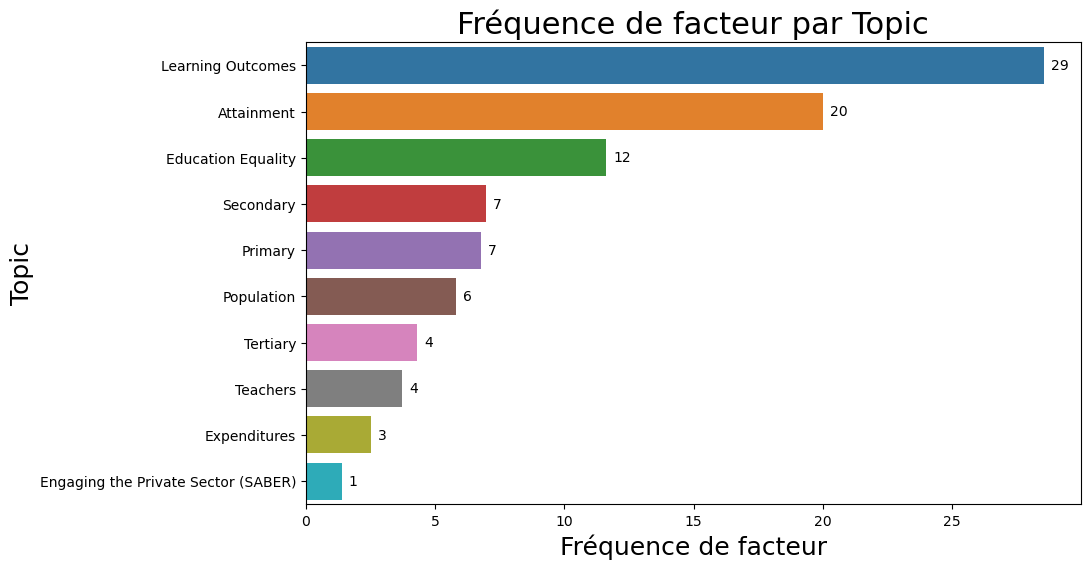

In [83]:
fig=plt.figure(figsize=(10,6))
ax=sns.barplot(nb_facteur_par_topic['Series Code'], nb_facteur_par_topic['Topic'])
plt.xlabel("Fréquence de facteur", fontsize=18)
plt.ylabel('Topic', fontsize=18)
plt.title("Fréquence de facteur par Topic", fontsize=22)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

## Bilan 'EdStatsSeries.csv'

- data5 contient 3665 lignes et 21 colonnes. Chacune des 3665 lignes correspond aux 3665 facteurs qu'on trouve dans data3.
- data5 contient également 37 Topic (thème) se répartissant les 3665 facteurs.
- 71.72 % de valeurs NaN concentrées dans 16 colonnes, on sélectionne donc uniquement les plus utiles/pertinentes : 'Series Code', 'Topic', 'Indicator Name' et on supprime le reste.
- Aucun doublon.
- On observe que 'Learning Outcomes' (29%), 'Attainment'(20%) et 'Education Equality'(12%) contiennent pour 2/3 des facteurs, la répartition est donc très hétérogènes. Les Topics vont nous aider lors de la sélection de variable.

## Conclusion sur la pré-analyse

Après avoir exploré chaque dataframe, on en conclut qu'il est plus judicieux de garder : 
- EdStatsCountry.csv : En effet, la colonne Income Group associée à la colonne Country Code va nous permettre de mettre en valeurs la richesse des pays par groupe d'appartenance économique (High/Upper middle/Lower middle/Low income).
- EdStatsData.csv : C'est notre jeu de donnée principal répertoriant pour chaque pays 3665 facteurs économique/démographique/social des statistiques sur plusieurs dizaines d'années. Notre étude se fera principalement dessus.
- EdStatsSeries.csv : Dans ce jeu de donnée le couple de colonne le plus intéressant est Series Code/Topic car il va nous permettre de filtrer les 3665 facteurs afin d'identifier ceux pertinents dans le cadre de notre étude.

# Nettoyage de donnée

Afin de choisir les meilleurs indicateurs pour notre étude, on va tout d'abord sélectionner les blocs d'indicateurs par thématique. Ainsi, listons les différents Topic : 

In [84]:
data5['Topic'].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

En consultant le lien https://datatopics.worldbank.org/education/, on garde certains Topic (cohérent, contenant une ou plusieurs variables intéressantes), listons les : 
- Attainment (Plus la population est éduquée, plus il y a de chance que les formations se vendent).
- Infrastructure: Communications (Pour suivre les formations il faut avoir un PC ainsi qu'Internet).
- Learning Outcomes (Même logique que Attainment).
- Economic Policy & Debt: National accounts: US (dollar) at current prices: Aggregate indicators (Plus un pays est riche, plus les formations ont une chance de s'y vendre).
- Economic Policy & Debt: National accounts: US (dollar) at constant 2010 prices: Aggregate indicators (Pareil que précedemment).
- Economic Policy & Debt: Purchasing power parity (Pareil que précedemment).
- Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita (Pareil que précedemment).
- Teachers (Si le ratio élève/professeur est trop élevé, on peut penser que les formations pourraient être une option intéressante).
- Literacy (Comme pour Attainment, les pays les plus illétrés ne conviendront pas au projet de formation).
- Secondary (Plus il y a d'élèves scolarisés dans le secondaire, plus les formations auront de chance de se vendre).
- Tertiary (Plus il y a d'élèves scolarisés dans le tertiaire, plus les formations auront de chance de se vendre).
- Population (Plus la population est grande, plus les ventes seront importantes à facteurs autre identique).
- Health: Population: Structure (Pareil que Population).
- Post-Secondary/Non-Tertiary (On veut un rapport Post-Secondary/Non-Tertiary le plus élevé possible).

In [85]:
topic_pertinent = ['Attainment', 'Infrastructure: Communications', 'Learning Outcomes', 
                   'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
                   'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
                   'Economic Policy & Debt: Purchasing power parity',
                   'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita', 
                   'Teachers', 'Literacy', 'Secondary', 'Tertiary', 'Health: Population: Structure', 'Population',
                   'Post-Secondary/Non-Tertiary'] 

Voyons d'environ quel proportion de valeurs ce filtre nous a débarassé : 

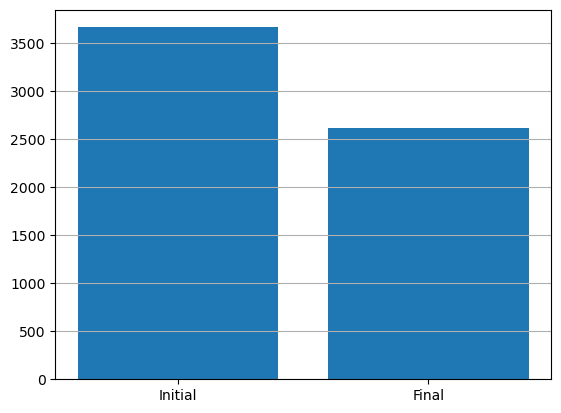

In [86]:
final = data5[data5['Topic'].isin(topic_pertinent)].shape[0]
init = data5.shape[0]
plt.bar(['Initial','Final'], [init, final])
plt.rcParams['axes.axisbelow'] = True
plt.gca().yaxis.grid(True)
plt.show()

In [87]:
#On récupère les indicateurs associés aux Topics sélectionnés plus haut
new_variables = data5[data5['Topic'].isin(topic_pertinent)]['Series Code'].reset_index()
new_variables = list(new_variables['Series Code']) 

In [88]:
#Création d'une copie du dataframe data3
data3_copy = data3.copy()

In [89]:
#Sélection des variables qui nous intéressent dans data3
data3 = data3[data3['Indicator Code'].isin(new_variables)] 

Avant de faire notre sélection d'indicateurs, retenons uniquement les pays et rejetons de nos données les régions/continents :

In [90]:
pays_a_supp = list(data3_pas_data1['Country Name'])
avant = data3.shape[0]
data3 = data3[~data3['Country Name'].isin(pays_a_supp)] #Séléctions des pays uniquement
apres = data3.shape[0]

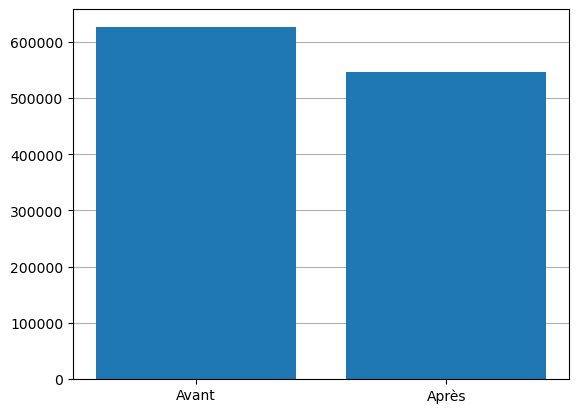

In [91]:
#Nombre de valeurs NaN Avant/Après la suppression des régions (continent, zone économique etc...) 
plt.bar(['Avant','Après'], [avant, apres])
plt.rcParams['axes.axisbelow'] = True
plt.gca().yaxis.grid(True)
plt.show()

On sélectionne maintenant les années antérieures à 2020 car on cherche à faire une étude sur des données perspectives et non prospectives : 

In [92]:
#On affiche l'ensemble des colonnes
data3.columns 

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [93]:
data3 = data3[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020']]

On supprime maintenant les lignes totalement vide (n'ayant aucune information):

In [94]:
data3 = data3[~(data3[['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020']].isna().mean(axis=1) == 1)]

In [95]:
avant_supp_lignes = apres
apres_supp_lignes = data3.shape[0]

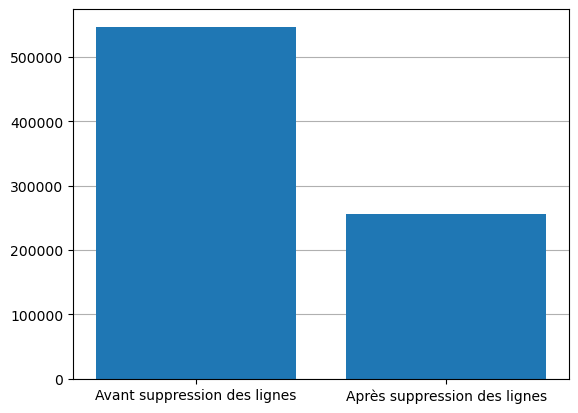

In [96]:
#Nombre de valeurs NaN avant/après la suppression des lignes totalement vide
plt.bar(['Avant suppression des lignes','Après suppression des lignes'], [avant_supp_lignes, apres_supp_lignes])
plt.rcParams['axes.axisbelow'] = True
plt.gca().yaxis.grid(True)
plt.show()

In [97]:
print('En supprimant les lignes totalement vide on peut voir que :', round((1- (apres_supp_lignes/avant_supp_lignes))*100,2),"% des valeurs ont été supprimées.")

En supprimant les lignes totalement vide on peut voir que : 53.24 % des valeurs ont été supprimées.


On peut maintenant chercher les indicateurs à la fois pertinents (grace aux topics) et avec un minimum d'information. Mais avant cela ajoutons une colonne qui donnera pour chaque ligne le nombre de valeurs NaN.

# Sélection des indicateurs

## Accès aux Secondaires / Tertiaires

In [98]:
#Indicateurs contenant 'secondary' et 'both sexes'
data3[data3['Indicator Name'].str.contains('secondary') & data3['Indicator Name'].str.contains('both sexes')].groupby('Indicator Name').count()['Country Name'].sort_values(ascending=False)[:40]

Indicator Name
Enrolment in secondary general, both sexes (number)                                                   206
Enrolment in secondary education, both sexes (number)                                                 206
Enrolment in secondary vocational, both sexes (number)                                                205
Enrolment in Grade 2 of lower secondary general education, both sexes (number)                        202
Enrolment in Grade 1 of lower secondary general education, both sexes (number)                        202
Percentage of students in secondary education enrolled in general programmes, both sexes (%)          201
Percentage of students in secondary education enrolled in vocational programmes, both sexes (%)       200
Teachers in secondary education, both sexes (number)                                                  200
Enrolment in Grade 3 of lower secondary general education, both sexes (number)                        199
Enrolment in lower secondary ed

'Enrolment in secondary general, both sexes (number)' et 'Enrolment in secondary education, both sexes (number)' sont intéressants. Pour les départager regardons lequel à le plus d'information :

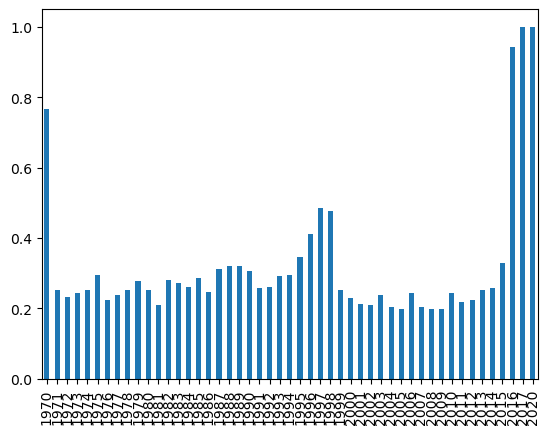

0.32207251832771944

In [99]:
#Diagramme à barres et moyennes du nombre de valeurs NaN par colonnes
plt.figure()
data3[data3['Indicator Name'] == 'Enrolment in secondary general, both sexes (number)'][['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020']].isna().mean().plot.bar()
plt.show()
data3[data3['Indicator Name'] == 'Enrolment in secondary general, both sexes (number)'][['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020']].isna().mean().mean()

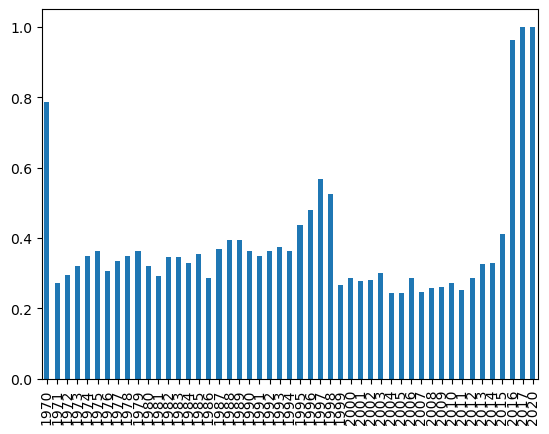

0.3833960768773528

In [100]:
#Diagramme à barres et moyennes du nombre de valeurs NaN par colonnes
plt.figure()
data3[data3['Indicator Name'] == 'Enrolment in secondary education, both sexes (number)'][['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020']].isna().mean().plot.bar()
plt.show()
data3[data3['Indicator Name'] == 'Enrolment in secondary education, both sexes (number)'][['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020']].isna().mean().mean()

'Enrolment in secondary general, both sexes (number)' est plus informé sur les années passées, on la sélectionne donc:

In [101]:
print('Pour la scolarisation dans le secondaire, le code Indicateur est : ', data3[data3['Indicator Name'] == 'Enrolment in secondary general, both sexes (number)']['Indicator Code'].unique()[0])

Pour la scolarisation dans le secondaire, le code Indicateur est :  SE.SEC.ENRL.GC


In [102]:
#Code de l'indicateur 'Enrolment in secondary general, both sexes (number)'
data3[data3['Indicator Name'] == 'Enrolment in secondary general, both sexes (number)']['Indicator Code'].unique()[0]

'SE.SEC.ENRL.GC'

Faisons de même avec la scolarisation dans le tertiaire :

In [103]:
#Indicateurs contenant 'tertiary' et 'both sexes'
data3[data3['Indicator Name'].str.contains('tertiary') & data3['Indicator Name'].str.contains('both sexes')].groupby('Indicator Name').count()['Country Name'].sort_values(ascending=False)[:10]

Indicator Name
Enrolment in tertiary education, all programmes, both sexes (number)                    200
Population of the official age for tertiary education, both sexes (number)              198
Teachers in tertiary education programmes, both sexes (number)                          196
Graduates from tertiary education, both sexes (number)                                  193
School life expectancy, tertiary, both sexes (years)                                    192
Gross enrolment ratio, tertiary, both sexes (%)                                         192
Gross enrolment ratio, primary to tertiary, both sexes (%)                              192
Enrolment in tertiary education per 100,000 inhabitants, both sexes                     191
School life expectancy, primary to tertiary, both sexes (years)                         191
Percentage of all students in tertiary education enrolled in ISCED 5, both sexes (%)    168
Name: Country Name, dtype: int64

<AxesSubplot:>

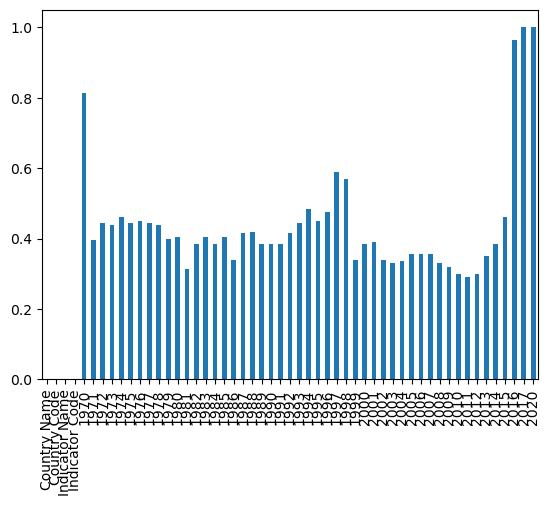

In [104]:
data3[data3['Indicator Name'] == 'Enrolment in tertiary education, all programmes, both sexes (number)'].isna().mean().plot.bar()

Au vue de la pertinence de l'indicateur et de son nombre de valeurs NaN (Entre 30% et 40% par année sauf pour certaines qui seront de toute manière éliminées après notre sélection), on décide de garder: 'Enrolment in tertiary education, all programmes, both sexes (number)'. Cette dernière sera représentative de la scolarisation dans le tertiaire.

In [105]:
#Code de l'indicateur 'Enrolment in tertiary education, all programmes, both sexes (number)'
print('Pour la scolarisation dans le tertiaire, le code Indicateur est : ', data3[data3['Indicator Name'] == 'Enrolment in tertiary education, all programmes, both sexes (number)']['Indicator Code'].unique()[0])

Pour la scolarisation dans le tertiaire, le code Indicateur est :  SE.TER.ENRL


## Financement

Dans cette partie on cherchera à voir quels indicateurs pourraient mettre en évidence la puissance économique des pays. En effet, on peut imaginer que les pays ayant des moyens économiques pourraient être plus intéressant dans l'objectif de vendre des formations. Pour ce faire, on va chercher le PIB (qui se traduit par GDP) ainsi que le RNB (GNI):

In [106]:
#Indicateurs contenant GDP (qui est le PIB)
data3[data3['Indicator Name'].str.contains('GDP')].groupby('Indicator Name').count()['Country Name'].sort_values(ascending=False)[:10]

Indicator Name
GDP at market prices (current US$)                     208
GDP per capita (current US$)                           208
GDP at market prices (constant 2005 US$)               202
GDP per capita (constant 2005 US$)                     202
GDP per capita, PPP (constant 2011 international $)    191
GDP per capita, PPP (current international $)          191
GDP, PPP (constant 2011 international $)               191
GDP, PPP (current international $)                     191
Name: Country Name, dtype: int64

In [107]:
#Indicateurs contenant GNI (Revenu National Brut)
data3[data3['Indicator Name'].str.contains('GNI')].groupby('Indicator Name').count()['Country Name'].sort_values(ascending=False)[:10]

Indicator Name
GNI (current US$)                                202
GNI per capita, Atlas method (current US$)       199
GNI per capita, PPP (current international $)    188
GNI, PPP (current international $)               188
Name: Country Name, dtype: int64

Au vue du nombre de pays informé, nous garderons 'GDP at market prices (current US(dollar))', 'GDP at market prices (current US dollar)' mais également 'GNI (current US dollar)' et 'GNI per capita, Atlas method (current US$)' afin de constituer notre score économique.

In [108]:
print('Pour la puissance économique des pays, les codes Indicateur sont : ', data3[(data3['Indicator Name'] == 'GDP at market prices (current US$)') | (data3['Indicator Name'] == 'GDP per capita (current US$)') | (data3['Indicator Name'] == 'GNI (current US$)') | (data3['Indicator Name'] == 'GNI per capita, Atlas method (current US$)') ]['Indicator Code'].unique())

Pour la puissance économique des pays, les codes Indicateur sont :  ['NY.GDP.MKTP.CD' 'NY.GDP.PCAP.CD' 'NY.GNP.MKTP.CD' 'NY.GNP.PCAP.CD']


## Population

Toujours dans la même logique de chercher des pays intéressants, on imagine bien qu'à indicateurs identiques un pays avec une plus grande population aura un plus grand succès. On va donc chercher le (ou les) meilleur(s) indicateur(s) décrivant au mieux la population du pays.

In [109]:
#Indicateurs contenant 'Population'
data3[data3['Indicator Name'].str.contains('Population')].groupby('Indicator Name').count()['Country Name'].sort_values(ascending=False)[:20]

Indicator Name
Population, total                                                                              211
Population of the official age for tertiary education, male (number)                           198
Population of the official age for tertiary education, female (number)                         198
Population of the official age for tertiary education, both sexes (number)                     198
Population of the official age for the last grade of primary education, female (number)        197
Population of the official entrance age to primary education, both sexes (number)              197
Population of the official age for upper secondary education, male (number)                    197
Population of the official age for upper secondary education, female (number)                  197
Population of the official age for upper secondary education, both sexes (number)              197
Population of the official age for the last grade of primary education, male (number)         

L'affichage précedent est très intéressant. Tout d'abord on retrouve l'indicateur qu'on recherchait (Population, total), il nous permettra de quantifier la puissance démographique d'un pays. De plus on observe 2 variables tout aussi intéressante étant le croisement des domaines Secondary/Tertiary et de Population qui sont 'Population of the official age for tertiary education, both sexes (number)' et 'Population of the official age for upper secondary education, both sexes (number)' (qu'on imagine être pour le lycée à l'inverse de lower secondary qui doit être le collège). Ainsi on va pouvoir s'aider de ces 3 variables pour non seulement regarder la puissance démographique des pays mais en plus spécifiés cette puissance à nos domaines d'études Secondary/Tertiary).

In [110]:
print('Pour la puissance démographique des pays, les codes Indicateur sont : ', data3[(data3['Indicator Name'] == 'Population, total') | (data3['Indicator Name'] == 'Population of the official age for tertiary education, both sexes (number)') | ((data3['Indicator Name'] == 'Population of the official age for upper secondary education, both sexes (number)'))]['Indicator Code'].unique())

Pour la puissance démographique des pays, les codes Indicateur sont :  ['SP.TER.TOTL.IN' 'SP.SEC.UTOT.IN' 'SP.POP.TOTL']


## Accès à Internet / Ordinateur

Pour finir cette sélection de variable finissons par 2 indicateurs essentiels que sont l'accès à un ordinateur ainsi qu'à internet. Ces 2 informations sont nécessaires car sans elles tout le reste devient peu pertinent. Commençons par l'accès à un ordinateur :

In [111]:
#Indicateurs contenant 'computer'
data3[data3['Indicator Name'].str.contains('computer')].groupby('Indicator Name').count()['Country Name'].sort_values(ascending=False)

Indicator Name
Personal computers (per 100 people)                                                                                                                     193
PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). No computer experience                                        30
PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). Opted out of computer-based assessment                        30
PIAAC: Young adults by proficiency level in problem solving in technology-rich environments (%). No computer experience or failed the ICT core test      30
PIAAC: Young adults by proficiency level in problem solving in technology-rich environments (%). Opted out of computer-based assessment                  29
PIAAC: Female adults by proficiency level in problem solving in technology-rich environments (%). No computer experience or failed the ICT core test     26
PIAAC: Male adults by proficiency level in proble

'Personal computers (per 100 people)' apparait être le seul indicateur pertinent dans cette catégorie.

In [112]:
#Code de l'indicateur 'Personal computers (per 100 people)'
print("Pour l'accès à un ordinateur, le code Indicateur est : ", data3[data3['Indicator Name'] == 'Personal computers (per 100 people)']['Indicator Code'].unique()[0])

Pour l'accès à un ordinateur, le code Indicateur est :  IT.CMP.PCMP.P2


Enfin, terminons en cherchant le ou les indicateur(s) permettant de nous informer sur l'accès à internet:

In [113]:
#Indicateurs contenant 'Internet'
data3[data3['Indicator Name'].str.contains('Internet')].groupby('Indicator Name').count()['Country Name'].sort_values(ascending=False)

Indicator Name
Internet users (per 100 people)    208
Name: Country Name, dtype: int64

On a un unique résultat informant sur 208 des 211 pays concernés, ce qui est très intéressant pour notre étude.

In [114]:
#Code de l'indicateur 'Personal computers (per 100 people)'
print("Pour l'accès à Internet', le code Indicateur est : ", data3[data3['Indicator Name'] == 'Internet users (per 100 people)']['Indicator Code'].unique()[0])

Pour l'accès à Internet', le code Indicateur est :  IT.NET.USER.P2


## Bilan de la séléction de variable

In [115]:
#Ensemble des indicateurs conservés
indicator_code = ['IT.NET.USER.P2', 'IT.CMP.PCMP.P2', 'SP.TER.TOTL.IN', 'SP.SEC.UTOT.IN', 'SP.POP.TOTL',
                  'NY.GDP.MKTP.CD', 'NY.GDP.PCAP.CD', 'SE.TER.ENRL', 'SE.SEC.ENRL.GC', 'NY.GNP.MKTP.CD', 'NY.GNP.PCAP.CD']

In [116]:
#On reprends data3 avant le nettoyage
data3 = data3_copy 

In [117]:
#On sélectionne uniquement les lignes décrivant un des indicateurs contenue dans indicator_code :
data3 = data3[data3['Indicator Code'].isin(indicator_code)]
#Vérifions qu'aucun indicateur ne manque :                             
data3['Indicator Code'].unique()

array(['SE.SEC.ENRL.GC', 'SE.TER.ENRL', 'NY.GDP.MKTP.CD',
       'NY.GDP.PCAP.CD', 'NY.GNP.MKTP.CD', 'NY.GNP.PCAP.CD',
       'IT.NET.USER.P2', 'IT.CMP.PCMP.P2', 'SP.TER.TOTL.IN',
       'SP.SEC.UTOT.IN', 'SP.POP.TOTL'], dtype=object)

In [118]:
#Sélectionnons uniquement les pays et excluons toutes les régions : 
pays_a_supp = list(data3_pas_data1['Country Name'])
data3 = data3[~data3['Country Name'].isin(pays_a_supp)]
#On vérifie qu'ils ont bien été supprimés : 
data3[data3['Country Name'].isin(pays_a_supp)]

Empty DataFrame
Columns: [Country Name, Country Code, Indicator Name, Indicator Code, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070, 2075, 2080, 2085, 2090, 2095, 2100, Unnamed: 69]
Index: []

[0 rows x 70 columns]

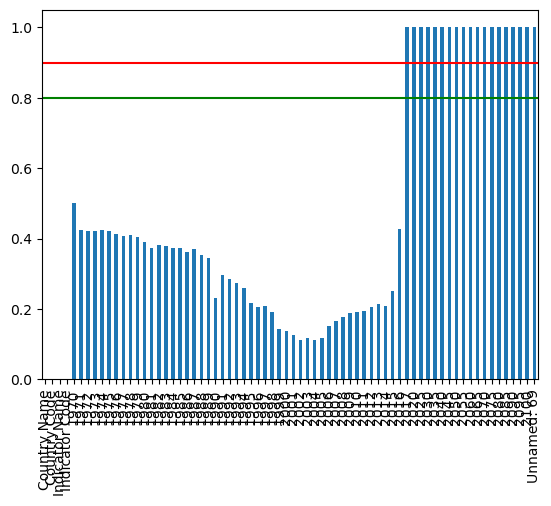

In [119]:
#On observe la répartition de valeurs NaN par année :
data3.isna().mean().plot.bar()
plt.axhline(y=0.9, color='r', linestyle='-')
plt.axhline(y=0.8, color='g', linestyle='-')
plt.show()

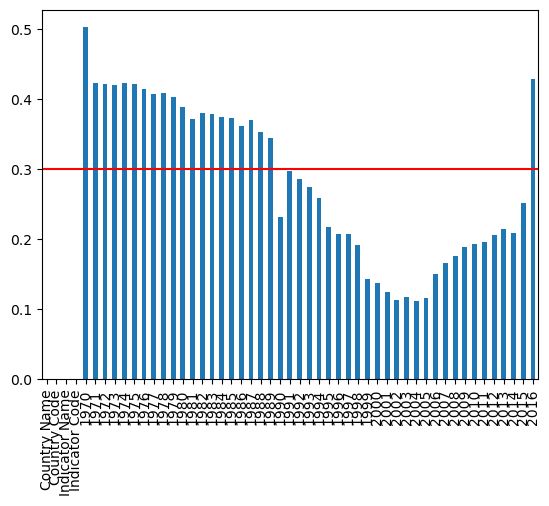

In [120]:
#On observe que les années >= à 2017 sont complètement vide, on les supprime : 
data3 = data3[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016']]
data3.isna().mean().plot.bar()
plt.axhline(y=0.3, color='r', linestyle='-')
plt.show()

On estime qu'il y a encore trop de valeurs NaN, on sélectionne donc les années ayant moins de 30% de valeurs NaN, soit sur notre diagramme en bar les années 1990 à 2015 : 

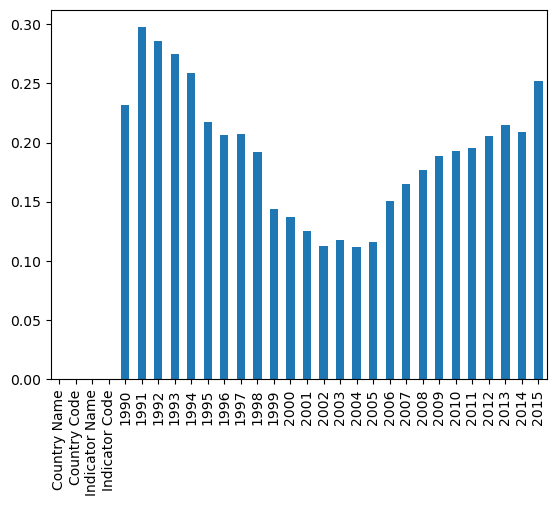

In [121]:
#Suppression des années < 1990 et de 2016
data3 = data3[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']]
data3.isna().mean().plot.bar()
plt.show()

In [122]:
#Créeons une colonne qui donne pour chaque ligne sa proportion de valeurs NaN : 
data3['prop_nan'] = round(data3.isna().mean(axis=1),2)

#Observons la moyenne des proportions de valeurs NaN par variable :
data3.groupby('Indicator Name').mean().sort_values(by='prop_nan')['prop_nan']

Indicator Name
Population, total                                                                    0.001090
GDP at market prices (current US$)                                                   0.062986
GDP per capita (current US$)                                                         0.063460
Population of the official age for upper secondary education, both sexes (number)    0.084929
GNI (current US$)                                                                    0.105924
Population of the official age for tertiary education, both sexes (number)           0.109052
GNI per capita, Atlas method (current US$)                                           0.124218
Internet users (per 100 people)                                                      0.152796
Enrolment in secondary general, both sexes (number)                                  0.249763
Enrolment in tertiary education, all programmes, both sexes (number)                 0.364929
Personal computers (per 100 people)          

On observe que l'indicateur 'Personal computers (per 100 people)' a beaucoup de valeurs NaN (50%). On comparera pour chacun des indicateurs l'effet du remplissage sur le nombre de valeurs NaN.

In [123]:
#On décide de remplir les valeurs NaN par la méthode ffill qui utilise la dernière observation valide afin de remplir la case 
#qui suit :
data3.loc[:, ['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'] ] = data3[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].T.fillna(method="ffill").T  #On transpose data3 car le remplissage se fait colonne par colonne


In [124]:
#Pour les valeurs NaN restantes, on décide de renmplir avec la méthode backfill qui utilise l'observation suivante pour remplir
#la valeur précedente :
data3.loc[:, ['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'] ] = data3[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].T.fillna(method="bfill").T #On transpose data3 car le remplissage se fait colonne par colonne

In [125]:
#Créeons une colonne qui donne pour chaque ligne sa proportion de valeurs NaN : 
data3['prop_nan2'] = round(data3.isna().mean(axis=1),2)

#Observons la moyenne des proportions de valeurs NaN par variable :
data3.groupby('Indicator Name').mean().sort_values(by='prop_nan2')['prop_nan2']

Indicator Name
Population, total                                                                    0.000000
GDP at market prices (current US$)                                                   0.011943
GDP per capita (current US$)                                                         0.011943
Internet users (per 100 people)                                                      0.011943
Enrolment in secondary general, both sexes (number)                                  0.023886
GNI (current US$)                                                                    0.043791
GNI per capita, Atlas method (current US$)                                           0.051754
Enrolment in tertiary education, all programmes, both sexes (number)                 0.059716
Population of the official age for tertiary education, both sexes (number)           0.059716
Population of the official age for upper secondary education, both sexes (number)    0.059716
Personal computers (per 100 people)          

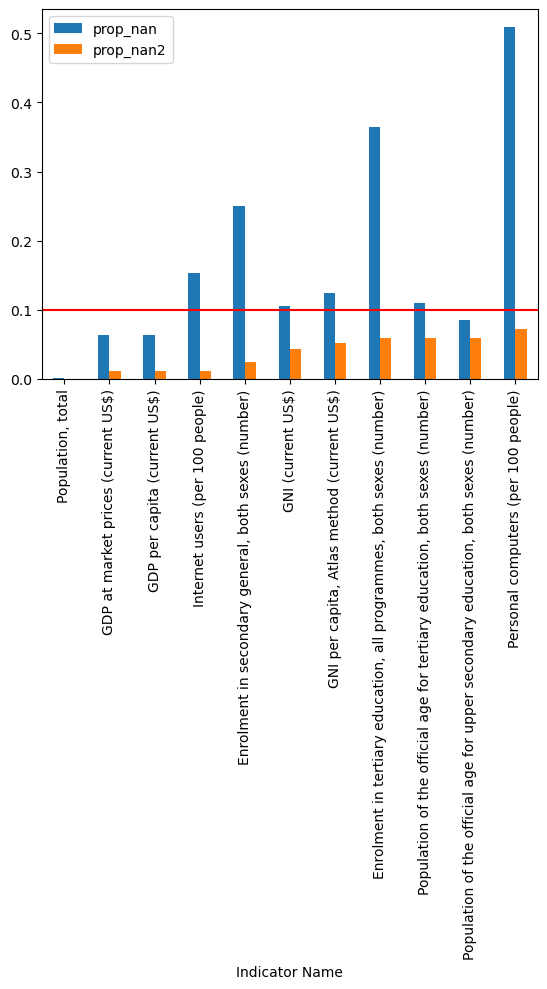

In [126]:
#Proportion de valeurs NaN pour chaque indicateurs Avant/Après le remplissage par les méthodes ffil et bfill
data3.groupby('Indicator Name').mean().sort_values(by='prop_nan2')[['prop_nan','prop_nan2']].plot.bar()
plt.axhline(y=0.1, color='r', linestyle='-')
plt.show()

Le remplissage a permit de passer l'ensemble des indicateurs a un taux de valeurs NaN inferieur à 10% et pour 5 d'entre elles en dessous des 5%. 

In [127]:
#Nombre total de valeurs NaN sur le data frame
round(data3[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].isna().sum().sum()/(data3[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].shape[0]*data3[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].shape[1]),2) 
#On a 4% de valeurs NaN.

0.04

In [128]:
#On supprime les colonnes prop_nan et prop_nan2 dont on a plus besoin : 
data3.drop(['prop_nan', 'prop_nan2'], axis=1, inplace=True)

Maintenant que notre data frame data3 est bien nettoyée on va proposer pour chaque pays un score total. Ce dernier nous permettra de sélectionner les pays dans lesquelles le programme de formation en ligne serait le plus cohérent. Pour ce faire, on décide de faire un score pour chacune des catégories suivantes : 
- Accès à l'enseignement secondaire/tertiaire ('Enrolment in secondary general, both sexes (number)', 'Enrolment in tertiary education, all programmes, both sexes (number)').
- Accès à l'ordinateur/internet ('Personal computers (per 100 people)','Internet users (per 100 people)').
- Puissance économique ('GDP at market prices (current US dollar)', 'GDP per capita (current US dollar)', 'GNI (current US dollar)' et 'GNI per capita, Atlas method (current US dollar)').
- Puissance démographique ('Population of the official age for tertiary education, both sexes (number)', 'Population of the official age for upper secondary education, both sexes (number)', 'Population, total').
Par la suite, on composera un score total sur la base de ces scores. Ce dernier nous servira afin de répondre aux problématiques de départ.

# Scoring

## Accès à l'enseignement secondaire/tertiaire

In [129]:
#Tout d'abord sélectionnons les lignes qui nous intéressent :
data_scol = data3[(data3['Indicator Name'] == 'Enrolment in secondary general, both sexes (number)') | (data3['Indicator Name'] == 'Enrolment in tertiary education, all programmes, both sexes (number)')]

In [130]:
#On va commencer par scorer l'accès au secondaire:
annees = ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
#Prenons la moyenne des années 1990 à 2015:
moyennes = data_scol.loc[data3['Indicator Name'] == 'Enrolment in secondary general, both sexes (number)', annees].mean(axis=1)

#Normalisons ces valeurs:
moyennes_normalize = (moyennes - min(moyennes))/(max(moyennes) - min(moyennes))
moyennes_normalize[moyennes_normalize == 1]


415342    1.0
dtype: float64

In [131]:
#On retire les pays n'ayant pas d'information et on les tri puis, on récupère les 10 meilleurs pays sous forme de liste : 
top_pays_secondaire = list(moyennes_normalize[~moyennes_normalize.isna()].sort_values(ascending=False)[0:10].index)

In [132]:
#10 pays ayant la plus grosse population scolarisée dans le secondaire
data3[data3.index.isin(top_pays_secondaire)] 

Country Name Country Code  \
147797          Bangladesh          BGD   
188112              Brazil          BRA   
243087               China          CHN   
415342               India          IND   
419007           Indonesia          IDN   
422672  Iran, Islamic Rep.          IRN   
448327               Japan          JPN   
558277              Mexico          MEX   
679222  Russian Federation          RUS   
847812       United States          USA   

                                           Indicator Name  Indicator Code  \
147797  Enrolment in secondary general, both sexes (nu...  SE.SEC.ENRL.GC   
188112  Enrolment in secondary general, both sexes (nu...  SE.SEC.ENRL.GC   
243087  Enrolment in secondary general, both sexes (nu...  SE.SEC.ENRL.GC   
415342  Enrolment in secondary general, both sexes (nu...  SE.SEC.ENRL.GC   
419007  Enrolment in secondary general, both sexes (nu...  SE.SEC.ENRL.GC   
422672  Enrolment in secondary general, both sexes (nu...  SE.SEC.ENRL.GC   
448327  Enrolment in secondary general, both sexes (nu...  SE.SEC.ENRL.GC   
558277  Enrolment in secondary general, both sexes (nu...  SE.SEC.ENRL.GC   
679222  Enrolment in secondary general, both sexes (nu...  SE.SEC.ENRL.GC   
847812  Enrolment in secondary general, both sexes (nu...  SE.SEC.ENRL.GC   

              1990        1991        1992        1993        1994  \
147797   3562194.0   3562194.0   3562194.0   3562194.0   3562194.0   
188112  12130155.0  13971090.0  14960211.0  15322543.0  15799825.0   
243087  45541200.0  45859600.0  46835000.0  47708000.0  47391100.0   
415342  52157888.0  54180392.0  55673664.0  61418728.0  63262224.0   
419007   9757174.0   9510766.0   9506882.0   9538778.0   9919480.0   
422672   4456342.0   4822087.0   5311988.0   5995051.0   6683832.0   
448327   9693226.0   9528674.0   9224769.0   9224769.0   8719312.0   
558277   5945595.0   5911816.0   5885986.0   5970118.0   6179579.0   
679222  12257000.0  12363000.0  12313000.0  12306000.0  12424000.0   
847812  19276000.0  19270000.0  19270000.0  20516146.0  21055472.0   

              1995  ...        2006        2007         2008         2009  \
147797   3562194.0  ...  10031776.0  10190592.0    9692260.0   10539656.0   
188112  15799825.0  ...  24109588.0  22426612.0   22516084.0   22384268.0   
243087  49816644.0  ...  85888816.0  84602296.0   82541840.0   80614976.0   
415342  64425676.0  ...  90779920.0  95306728.0  100954560.0  100954560.0   
419007  10631996.0  ...  14565882.0  16315197.0   15575938.0   16425000.0   
422672   7284611.0  ...   7910673.0   7457764.0    7348681.0    7054205.0   
448327   8442844.0  ...   6600724.0   6504875.0    6466297.0    6427548.0   
558277   6429571.0  ...   9281593.0   9446670.0    9588558.0    9711334.0   
679222  12829000.0  ...   9590695.0   8956312.0    8415648.0    8056790.0   
847812  21122632.0  ...  24552316.0  24731028.0   24692888.0   24524564.0   

               2010         2011         2012         2013         2014  \
147797   10961531.0   11178900.0   11758695.0   12884519.0   12884519.0   
188112   22215054.0   21982888.0   21637504.0   24006492.0   23326280.0   
243087   78798728.0   77152864.0   75307816.0   73184064.0   69457944.0   
415342  100954560.0  100954560.0  100954560.0  117899080.0  127848112.0   
419007   16656848.0   17040696.0   17426640.0   18132976.0   18387298.0   
422672    6556388.0    6435868.0    6305168.0    4959951.0    4899693.0   
448327    6436956.0    6427818.0    6439936.0    6433536.0    6390880.0   
558277    9811082.0    9950960.0   10120115.0   10120115.0   10120115.0   
679222    8056790.0    7651800.0    7589670.0    7544082.0    7577881.0   
847812   24192786.0   24214304.0   24122436.0   24095460.0   24229776.0   

               2015  
147797   13964691.0  
188112   22607924.0  
243087   68571880.0  
415342  127787176.0  
419007   19545072.0  
422672    4880395.0  
448327    6390880.0  
558277   10120115.0  
679222    7866270.0  
847812   24229776.0  

[10 

On observe que les pays ayant une grande population scolarisée dans le secondaire sont également des pays ayant une très grande population, notre intuition concernant le lien entre grande démographie et grande population scolarisée semble se confirmer. Nous tenterons de la mettre en évidence lors de notre scoring sur la population total.

In [133]:
#On continue le scoring pour l'éducation dans le tertiaire:
#Prenons la moyenne des années 1990 à 2015:
moyennes2 = data_scol.loc[data3['Indicator Name'] == 'Enrolment in tertiary education, all programmes, both sexes (number)', annees].mean(axis=1)

#Normalisons ces valeurs:
moyennes_normalize2 = (moyennes2 - min(moyennes2))/(max(moyennes2) - min(moyennes2))
moyennes_normalize2[moyennes_normalize2 == 1]

243094    1.0
dtype: float64

In [134]:
#On retire les pays n'ayant pas d'information et on les tri puis, on récupère les 10 meilleurs pays sous forme de liste :
top_pays_tertiaire = list(moyennes_normalize2[~moyennes_normalize2.isna()].sort_values(ascending=False)[0:10].index)

In [135]:
#10 pays ayant la plus grosse population dans le tertiaire
data3[data3.index.isin(top_pays_tertiaire)] 

Country Name Country Code  \
188119              Brazil          BRA   
243094               China          CHN   
415349               India          IND   
419014           Indonesia          IDN   
448334               Japan          JPN   
470324         Korea, Rep.          KOR   
657239         Philippines          PHL   
679229  Russian Federation          RUS   
818499              Turkey          TUR   
847819       United States          USA   

                                           Indicator Name Indicator Code  \
188119  Enrolment in tertiary education, all programme...    SE.TER.ENRL   
243094  Enrolment in tertiary education, all programme...    SE.TER.ENRL   
415349  Enrolment in tertiary education, all programme...    SE.TER.ENRL   
419014  Enrolment in tertiary education, all programme...    SE.TER.ENRL   
448334  Enrolment in tertiary education, all programme...    SE.TER.ENRL   
470324  Enrolment in tertiary education, all programme...    SE.TER.ENRL   
657239  Enrolment in tertiary education, all programme...    SE.TER.ENRL   
679229  Enrolment in tertiary education, all programme...    SE.TER.ENRL   
818499  Enrolment in tertiary education, all programme...    SE.TER.ENRL   
847819  Enrolment in tertiary education, all programme...    SE.TER.ENRL   

              1990        1991        1992        1993        1994  \
188119   1540080.0   1619310.0   1591176.0   1652333.0   1716263.0   
243094   3924546.0   3822371.0   3660248.0   3699840.0   4505215.0   
415349   4780181.0   4950974.0   4950974.0   4950974.0   4950974.0   
419014   1515689.0   1590593.0   1773459.0   1795453.0   2043380.0   
448334   2683035.0   2781000.0   2899143.0   2899143.0   3841134.0   
470324   1630374.0   1691429.0   1761775.0   1911765.0   1950306.0   
657239   1516315.0   1709486.0   1656815.0   1656815.0   1656815.0   
679229   5199300.0   5094500.0   4964700.0   4727900.0   4606600.0   
818499    685500.0    749921.0    810781.0    923719.0   1143083.0   
847819  13538000.0  13710150.0  14360965.0  14486304.0  14305352.0   

              1995  ...        2006        2007        2008        2009  \
188119   1716263.0  ...   4572297.0   5272877.0   5958135.0   6115138.0   
243094   5278935.0  ...  23360536.0  25346280.0  26691696.0  29295840.0   
415349   4932669.0  ...  12852684.0  14862962.0  17211216.0  18500324.0   
419014   2229796.0  ...   3657429.0   3806629.0   4419577.0   4859409.0   
448334   3917709.0  ...   4084861.0   4032625.0   3938632.0   3874224.0   
470324   2065579.0  ...   3204036.0   3208591.0   3204310.0   3219216.0   
657239   1871647.0  ...   2483988.0   2483988.0   2651466.0   2625385.0   
679229   4515300.0  ...   9167277.0   9370428.0   9446408.0   9330115.0   
818499   1174299.0  ...   2342898.0   2453664.0   2532622.0   2924281.0   
847819  14278799.0  ...  17487476.0  17758870.0  18248124.0  19102814.0   

              2010        2011        2012        2013        2014        2015  
188119   6552707.0   6929324.0   7241405.0   7541112.0   8072146.0   8285475.0  
243094  31046736.0  31308378.0  32585960.0  34091288.0  41924200.0  43367392.0  
415349  20740740.0  26650952.0  28568408.0  28175136.0  30305848.0  32107420.0  
419014   5001048.0   5364301.0   6233984.0   6423455.0   6463297.0   5107999.0  
448334   3836314.0   3880544.0   3884638.0   3862749.0   3862460.0   3862460.0  
470324   3269509.0   3356011.0   3359739.0   3342264.0   3318307.0   3268099.0  
657239   2774368.0   2951195.0   3044218.0   3317265.0   3563396.0   3563396.0  
679229   9330115.0   8652607.0   7983111.0   7528163.0   6995732.0   6592416.0  
818499   3529334.0   3817086.0   4353542.0   4975690.0   5472521.0   6062886.0  
847819  20427708.0  21016126.0  20994112.0  19972624.0  19700220.0  19531728.0  

[10 rows x 30 columns]

A quelques pays près, on retombe sur les mêmes pays à forte démographie que nous avions dans le secondaire, on va créer un nuage de point pour voir s'il existe un lien entre ces deux indicateurs : 

In [136]:
#Comme les pays sont classées dans le même ordre mais que moyennes_normalize et moyennes_normalize2 ne sont pas indexer de la 
#même manière, on les réindex :
moyennes_normalize = moyennes_normalize.reset_index()
moyennes_normalize2 = moyennes_normalize2.reset_index()

In [137]:
#On supprime pour les deux dataframe la colonne index
moyennes_normalize.drop(columns=['index'], inplace=True)
moyennes_normalize2.drop(columns=['index'], inplace=True)

In [138]:
#Enfin on renome les colonnes :
moyennes_normalize.rename(columns={0:"secondary_access"}, inplace=True)
moyennes_normalize2.rename(columns={0:"tertiary_access"}, inplace=True)

In [139]:
#Il ne nous reste plus qu'à fusionner les deux data frames : 
df1 = moyennes_normalize.join(moyennes_normalize2)

<AxesSubplot:xlabel='secondary_access', ylabel='tertiary_access'>

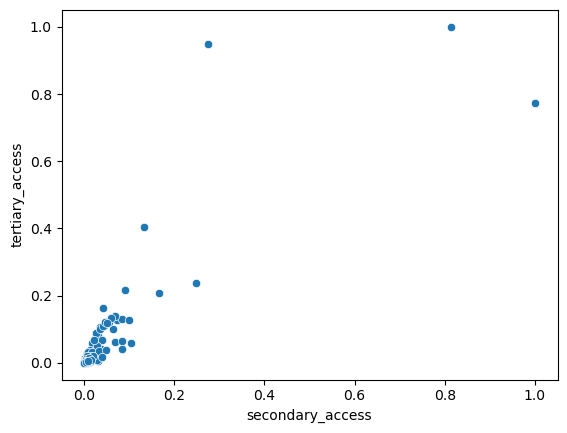

In [140]:
#Nuage de points de secondary_access et tertiary_access
sns.scatterplot(data=df1, x="secondary_access", y="tertiary_access")

In [141]:
#On créer un zoom
zoom1 = df1[(df1['secondary_access'] < 0.02) & (df1['tertiary_access'] < 0.02)]

<AxesSubplot:xlabel='secondary_access', ylabel='tertiary_access'>

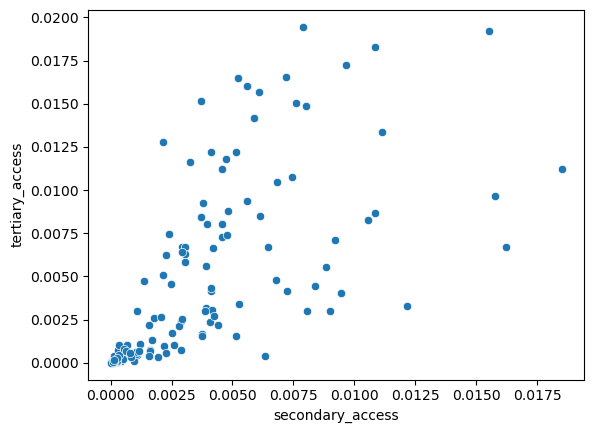

In [142]:
#Nuage de points du zoom
sns.scatterplot(data=zoom1, x="secondary_access", y="tertiary_access")

On observe qu'il y a une corrélation positive entre secondary_access et tertiary_access:

In [143]:
#Mesurons cette corrélation : 
df1.corr()

secondary_access  tertiary_access
secondary_access          1.000000         0.870504
tertiary_access           0.870504         1.000000

Ainsi secondary_access et tertiary_access sont corrélés à 87%.

Pour conclure, on va créer une colonne score_educ afin de quantifier le nombre de personne ayant accès à l'éducation secondaire/tertiaire : 

In [144]:
#Création de score_educ
df1['score_educ'] = df1['secondary_access'] * df1['tertiary_access'] 

On a choisit de multiplier les deux colonnes à défaut d'en faire la moyenne car on recherche une certaine forme de "stabilité", ainsi on privilégiera un pays ayant (0.5, 0.5) de score (car 0.5x0.5 = 0.25) plutôt que (0.75, 0.25) de score (car 0.25x0.75 = 0.19).

In [145]:
df1['score_educ']

0      4.015640e-05
1      1.707430e-05
2      1.514538e-03
3      3.159369e-09
4      5.929277e-10
           ...     
206    2.286682e-08
207    4.340266e-05
208    1.522327e-04
209    8.048612e-06
210    3.811216e-05
Name: score_educ, Length: 211, dtype: float64

In [146]:
#Création d'un dataframe contenant dans l'ordre tous nos pays
pays = pd.DataFrame(data3['Country Name'].unique())
pays.rename(columns={0:"Pays"}, inplace=True)

In [147]:
#Création d'un dataframe contenant les codes des pays 
pays_code = pd.DataFrame(data3['Country Code'].unique())
pays_code.rename(columns={0:"Pays_Code"}, inplace=True)

In [148]:
#Jointure entre score_educ et les pays/codes associés
score_educ = pays.join(df1['score_educ'])
score_educ = score_educ.join(pays_code['Pays_Code'])

In [149]:
score_educ

Pays    score_educ Pays_Code
0              Afghanistan  4.015640e-05       AFG
1                  Albania  1.707430e-05       ALB
2                  Algeria  1.514538e-03       DZA
3           American Samoa  3.159369e-09       ASM
4                  Andorra  5.929277e-10       AND
..                     ...           ...       ...
206  Virgin Islands (U.S.)  2.286682e-08       VIR
207     West Bank and Gaza  4.340266e-05       PSE
208            Yemen, Rep.  1.522327e-04       YEM
209                 Zambia  8.048612e-06       ZMB
210               Zimbabwe  3.811216e-05       ZWE

[211 rows x 3 columns]

In [150]:
#Voyons quels sont les pays ayant le plus gros score :
score_educ.sort_values(by="score_educ", ascending=False)[:10]

Pays  score_educ Pays_Code
40                China    0.813447       CHN
86                India    0.772576       IND
200       United States    0.261423       USA
26               Brazil    0.059044       BRA
157  Russian Federation    0.053650       RUS
87            Indonesia    0.034375       IDN
95                Japan    0.019659       JPN
125              Mexico    0.012593       MEX
88   Iran, Islamic Rep.    0.010984       IRN
151         Philippines    0.009531       PHL

In [151]:
#Création de data_carto pour la cartographie
data_carto = score_educ[~score_educ['score_educ'].isna()].sort_values(by="score_educ").reset_index().reset_index()

In [152]:
data_carto

level_0  index                      Pays    score_educ Pays_Code
0          0    194  Turks and Caicos Islands  0.000000e+00       TCA
1          1    160                San Marino  3.329387e-10       SMR
2          2    111             Liechtenstein  5.240852e-10       LIE
3          3    146                     Palau  5.583071e-10       PLW
4          4      4                   Andorra  5.929277e-10       AND
..       ...    ...                       ...           ...       ...
191      191    157        Russian Federation  5.365033e-02       RUS
192      192     26                    Brazil  5.904357e-02       BRA
193      193    200             United States  2.614229e-01       USA
194      194     86                     India  7.725762e-01       IND
195      195     40                     China  8.134474e-01       CHN

[196 rows x 5 columns]

In [153]:
def indicateur_sur_carte(df, indic_column, color_scale, reverse_scale = True, map_title = "", scale_title = ""):
    
    fig = go_carte.Figure(data=go_carte.Choropleth(
        
        # Informations des données
        locations = df['Pays_Code'],
        z = df[indic_column],
        text = df['Pays'],
        
        # Informations de la carte
        colorscale = color_scale,
        reversescale = reverse_scale,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        
        colorbar_title = scale_title,
    ))
    
    fig.update_layout(
        title_text = map_title
    )
    
    fig.show()

In [154]:
#Cartographie du niveau de scolarisation dans le monde
indicateur_sur_carte(data_carto, indic_column = 'level_0', color_scale = 'earth', reverse_scale = True,
          map_title = 'Niveau de scolarisation dans le tertiaire/secondaire', scale_title = "Niveau de scolarisation") 

On observe que les plus grand territoire (probablement corrélés aux pays les plus peuplés) sont ceux ayant le meilleur score de scolarisation dans le secondaire/tertiaire.

## Accès à l'ordinateur/internet

In [155]:
#Tout d'abord sélectionnons les lignes qui nous intéressent :
data_outils = data3[(data3['Indicator Name'] == 'Personal computers (per 100 people)') | (data3['Indicator Name'] == 'Internet users (per 100 people)')]

In [156]:
#On va commencer par scorer la variable 'Personal computers (per 100 people)' :
annees = ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
#Prenons la moyenne des années 1990 à 2015:
moyennes = data_outils.loc[data_outils['Indicator Name'] == 'Personal computers (per 100 people)', annees].mean(axis=1)

#Normalisons ces valeurs:
moyennes_normalize = (moyennes - min(moyennes))/(max(moyennes) - min(moyennes))
moyennes_normalize[moyennes_normalize == 1]

691104    1.0
dtype: float64

In [157]:
#On retire les pays n'ayant pas d'information et on les tri puis, on récupère les 10 meilleurs pays sous forme de liste : 
top_pays_computer = list(moyennes_normalize[~moyennes_normalize.isna()].sort_values(ascending=False)[0:10].index)

In [158]:
#Voyons quels sont les pays ayant une grande population ayant accès à un PC dans les 25 dernières années
data3[data3.index.isin(top_pays_computer)] 

Country Name Country Code                       Indicator Name  \
221984          Canada          CAN  Personal computers (per 100 people)   
515184      Luxembourg          LUX  Personal computers (per 100 people)   
603144     Netherlands          NLD  Personal computers (per 100 people)   
628799          Norway          NOR  Personal computers (per 100 people)   
691104      San Marino          SMR  Personal computers (per 100 people)   
716759       Singapore          SGP  Personal computers (per 100 people)   
779064          Sweden          SWE  Personal computers (per 100 people)   
782729     Switzerland          CHE  Personal computers (per 100 people)   
845034  United Kingdom          GBR  Personal computers (per 100 people)   
848699   United States          USA  Personal computers (per 100 people)   

        Indicator Code       1990       1991       1992       1993       1994  \
221984  IT.CMP.PCMP.P2  10.485292  12.495775  14.462475  17.087266  19.661111   
515184  IT.CMP.PCMP.P2  37.439252  37.439252  37.439252  37.439252  37.439252   
603144  IT.CMP.PCMP.P2   9.402068  11.338481  13.244102  14.463409  16.973358   
628799  IT.CMP.PCMP.P2  14.545908  14.545908  16.264131  18.934446  22.978779   
691104  IT.CMP.PCMP.P2  71.444687  71.444687  71.444687  71.444687  71.444687   
716759  IT.CMP.PCMP.P2   6.630412   7.419127   9.395417  10.634148  14.753075   
779064  IT.CMP.PCMP.P2  10.515116  12.766153  13.828410  14.878398  18.205204   
782729  IT.CMP.PCMP.P2   8.990219  11.127605  13.207740  17.415787  22.988968   
845034  IT.CMP.PCMP.P2  10.836418  12.550667  14.603548  16.645185  17.118402   
848699  IT.CMP.PCMP.P2  21.296104  22.950323  24.840913  26.764230  29.237553   

             1995  ...       2006       2007       2008       2009       2010  \
221984  21.846807  ...  94.446705  94.446705  94.446705  94.446705  94.446705   
515184  37.439252  ...  68.209751  68.209751  68.209751  68.209751  68.209751   
603144  20.103761  ...  90.987849  90.987849  90.987849  90.987849  90.987849   
628799  27.363716  ...  62.775903  62.775903  62.775903  62.775903  62.775903   
691104  71.444687  ...  81.148357  80.554367  80.554367  80.554367  80.554367   
716759  20.099694  ...  68.916046  72.061563  72.061563  72.061563  72.061563   
779064  24.924321  ...  88.011928  88.011928  88.011928  88.011928  88.011928   
782729  28.502038  ...  88.610693  91.609568  96.170657  96.170657  96.170657   
845034  20.345811  ...  80.170361  80.170361  80.170361  80.170361  80.170361   
848699  32.196729  ...  79.915488  79.915488  79.915488  79.915488  79.915488   

             2011       2012       2013       2014       2015  
221984  94.446705  94.446705  94.446705  94.446705  94.446705  
515184  68.209751  68.209751  68.209751  68.209751  68.209751  
603144  90.987849  90.987849  90.987849  90.987849  90.987849  
628799  62.775903  62.775903  62.775903  62.775903  62.775903  
691104  80.554367  80.554367  80.554367  80.554367  80.554367  
716759  72.061563  72.061563  72.061563  72.061563  72.061563  
779064  88.011928  88.011928  88.011928  88.011928  88.011928  
782729  96.170657  96.170657  96.170657  96.170657  96.170657  
845034  80.170361  80.170361  80.170361  80.170361  80.170361  
848699  79.915488  79.915488  79.915488  79.915488  79.915488  

[10 rows x 30 columns]

On a une majorité de pays européen (qui semblent être parmis les plus riches comme la Suisse ou le Luxembourg), 2 pays d'Amérique (qui semblent aussi faire partit des plus riches : Canada, Etats Unis), et un pays d'Asie (Egalement riche : Singapour).

In [159]:
#On continue le scoring avec la variable 'Internet users (per 100 people)':
#Prenons la moyenne des années 1990 à 2015:
moyennes2 = data_outils.loc[data_outils['Indicator Name'] == 'Internet users (per 100 people)', annees].mean(axis=1)

#Normalisons ces valeurs:
moyennes_normalize2 = (moyennes2 - min(moyennes2))/(max(moyennes2) - min(moyennes2))
moyennes_normalize2[moyennes_normalize2 == 1]

411855    1.0
dtype: float64

In [160]:
#On retire les pays n'ayant pas d'information et on les tri puis, on récupère les 10 meilleurs pays sous forme de liste :
top_pays_internet = list(moyennes_normalize2[~moyennes_normalize2.isna()].sort_values(ascending=False)[0:10].index)

In [161]:
data3[data3.index.isin(top_pays_internet)]

Country Name Country Code                   Indicator Name  \
169965      Bermuda          BMU  Internet users (per 100 people)   
221275       Canada          CAN  Internet users (per 100 people)   
287245      Denmark          DNK  Internet users (per 100 people)   
334890      Finland          FIN  Internet users (per 100 people)   
411855      Iceland          ISL  Internet users (per 100 people)   
470495  Korea, Rep.          KOR  Internet users (per 100 people)   
602435  Netherlands          NLD  Internet users (per 100 people)   
628090       Norway          NOR  Internet users (per 100 people)   
778355       Sweden          SWE  Internet users (per 100 people)   
782020  Switzerland          CHE  Internet users (per 100 people)   

        Indicator Code      1990      1991      1992      1993      1994  \
169965  IT.NET.USER.P2  0.000000  0.000000  0.000000  0.000000  0.000000   
221275  IT.NET.USER.P2  0.361000  0.570386  0.915981  1.184558  2.378694   
287245  IT.NET.USER.P2  0.097277  0.194057  0.386914  0.578330  1.344308   
334890  IT.NET.USER.P2  0.401088  1.397439  1.886880  2.568461  4.915099   
411855  IT.NET.USER.P2  0.000000  0.505129  1.539160  2.667825  6.794812   
470495  IT.NET.USER.P2  0.023265  0.046124  0.098404  0.249947  0.311359   
602435  IT.NET.USER.P2  0.334387  0.531496  1.320008  1.967088  3.257309   
628090  IT.NET.USER.P2  0.707299  1.407395  2.216366  2.783991  4.152450   
778355  IT.NET.USER.P2  0.584192  1.160519  1.497871  1.716364  3.412810   
782020  IT.NET.USER.P2  0.595714  1.179956  1.751713  2.167270  2.720004   

             1995  ...       2006       2007   2008   2009   2010       2011  \
169965   6.838163  ...  69.899655  74.350594  82.30  83.25  84.21  88.336000   
221275   4.163525  ...  72.400000  73.200000  76.70  80.30  80.30  83.000000   
287245   3.825656  ...  86.650000  85.030000  85.02  86.84  88.72  89.810013   
334890  13.900304  ...  79.660000  80.780000  83.67  82.49  86.89  88.709995   
411855  11.215876  ...  89.510000  90.600000  91.00  93.00  93.39  94.819687   
470495   0.819687  ...  78.100000  78.800000  81.00  81.60  83.70  83.759120   
602435   6.473158  ...  83.700000  85.820000  87.42  89.63  90.72  91.419996   
628090   6.423220  ...  82.550000  86.930000  90.57  92.08  93.39  93.489983   
778355   5.098024  ...  87.760000  82.010000  90.00  91.00  90.00  92.769986   
782020   3.552007  ...  75.700000  77.200000  79.20  81.30  83.90  85.193028   

             2012     2013       2014       2015  
169965  91.299305  95.3000  96.800000  98.323610  
221275  83.000000  85.8000  87.120000  88.470000  
287245  92.260012  94.6297  95.990000  96.330500  
334890  89.879998  91.5144  86.530393  86.422133  
411855  96.209800  96.5468  98.160000  98.200000  
470495  84.070000  84.7700  87.556826  89.648631  
602435  92.859992  93.9564  91.666666  91.724138  
628090  94.649978  95.0534  96.300000  96.810300  
778355  93.179988  94.7836  92.520000  90.610200  
782020  85.200000  86.3400  87.400000  87.479056  

[10 rows x 30 columns]

On retombe sur certains pays déjà bien classé pour l'accès à l'ordinateur tels que le Canada, la Norvège ou la Suisse. Etant pour la plupart des pays riches on peut penser qu'il y a corrélation positive entre "accès à l'ordinateur", "accès à Internet" et le "PIB". 

In [162]:
#Comme les pays sont classées dans le même ordre mais que moyennes_normalize et moyennes_normalize2 ne sont pas indexer de la 
#même manière, on les réindex :
moyennes_normalize = moyennes_normalize.reset_index()
moyennes_normalize2 = moyennes_normalize2.reset_index()

In [163]:
#On supprime pour les deux dataframe la colonne index
moyennes_normalize.drop(columns=['index'], inplace=True)
moyennes_normalize2.drop(columns=['index'], inplace=True)

In [164]:
#Enfin on renomme les colonnes :
moyennes_normalize.rename(columns={0:"computer_access"}, inplace=True)
moyennes_normalize2.rename(columns={0:"internet_access"}, inplace=True)

In [165]:
#Il ne nous reste plus qu'à fusionner les deux data frames : 
df2 = moyennes_normalize.join(moyennes_normalize2)

<AxesSubplot:xlabel='internet_access', ylabel='computer_access'>

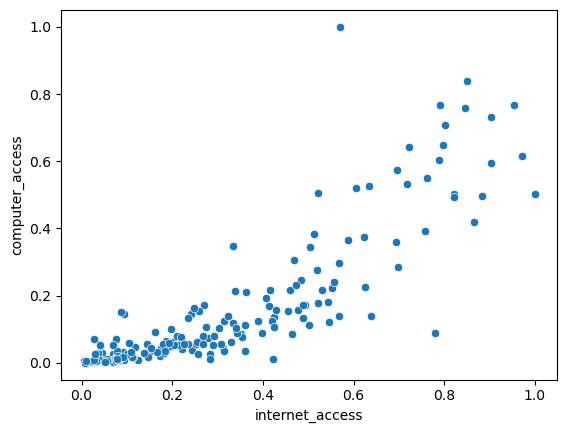

In [166]:
sns.scatterplot(data=df2, x="internet_access", y="computer_access")

On observe une corrélation positive entre l'accès à internet et l'accès à un ordinateur:

Pour conclure, on va créer une colonne score_outil afin de quantifier le nombre de personne ayant accès à un PC/Internet :

In [167]:
#Création de score_outil
df2['score_outil'] = df2['computer_access'] * df2['internet_access'] 

In [168]:
df2

computer_access  internet_access  score_outil
0           0.004483         0.030734     0.000138
1           0.027113         0.284194     0.007705
2           0.008944         0.125528     0.001123
3                NaN         0.000000          NaN
4                NaN         0.617501          NaN
..               ...              ...          ...
206         0.033870         0.360356     0.012205
207         0.056197         0.268915     0.015112
208         0.017859         0.091176     0.001628
209         0.011308         0.078237     0.000885
210         0.051522         0.068306     0.003519

[211 rows x 3 columns]

Comme dans le séction précedente on a choisit de multiplier les deux colonnes à défaut d'en faire la moyenne car on recherche une certaine forme de "stabilité", ainsi on privilégiera un pays ayant (0.5, 0.5) de score (car 0.5x0.5 = 0.25) plutôt que (0.75, 0.25) de score (car 0.25x0.75 = 0.19).

In [169]:
#On créer un DataFrame listant dans l'ordre alphabétique les pays :
pays = pd.DataFrame(data3['Country Name'].unique())
pays.rename(columns={0:"Pays"}, inplace=True)

In [170]:
#On fait la même chose pour le Country Code :
pays_code = pd.DataFrame(data3['Country Code'].unique())
pays_code.rename(columns={0:"Pays_Code"}, inplace=True)

In [171]:
#Jointure entre score_outil et les pays/code pays
score_outil = pays.join(df2['score_outil'])
score_outil = score_outil.join(pays_code['Pays_Code'])

In [172]:
score_outil

Pays  score_outil Pays_Code
0              Afghanistan     0.000138       AFG
1                  Albania     0.007705       ALB
2                  Algeria     0.001123       DZA
3           American Samoa          NaN       ASM
4                  Andorra          NaN       AND
..                     ...          ...       ...
206  Virgin Islands (U.S.)     0.012205       VIR
207     West Bank and Gaza     0.015112       PSE
208            Yemen, Rep.     0.001628       YEM
209                 Zambia     0.000885       ZMB
210               Zimbabwe     0.003519       ZWE

[211 rows x 3 columns]

In [173]:
#Voyons quels sont les pays ayant le plus gros score :
score_outil.sort_values(by="score_outil", ascending=False)[:10]

Pays  score_outil Pays_Code
181          Sweden     0.731266       SWE
182     Switzerland     0.713228       CHE
136     Netherlands     0.660954       NLD
34           Canada     0.641999       CAN
200   United States     0.605460       USA
143          Norway     0.596910       NOR
160      San Marino     0.569646       SMR
113      Luxembourg     0.569165       LUX
51          Denmark     0.536453       DNK
199  United Kingdom     0.517615       GBR

On y trouve une majorité de pays européen comptant parmis les plus riches, les 2 autres sont les Etats Unis ainsi que le Canada.

Représentons sur une carte le score de chaque pays :

In [174]:
#Création de data_carto2 pour la cartographie
data_carto2 = score_outil[~score_outil['score_outil'].isna()].sort_values(by="score_outil").reset_index().reset_index()

In [175]:
data_carto2

level_0  index              Pays  score_outil Pays_Code
0          0     43  Congo, Dem. Rep.     0.000000       COD
1          1    140             Niger     0.000004       NER
2          2     37              Chad     0.000020       TCD
3          3     59           Eritrea     0.000030       ERI
4          4    117            Malawi     0.000035       MWI
..       ...    ...               ...          ...       ...
188      188    200     United States     0.605460       USA
189      189     34            Canada     0.641999       CAN
190      190    136       Netherlands     0.660954       NLD
191      191    182       Switzerland     0.713228       CHE
192      192    181            Sweden     0.731266       SWE

[193 rows x 5 columns]

In [176]:
def indicateur_sur_carte(df, indic_column, color_scale, reverse_scale = True, map_title = "", scale_title = ""):
    
    fig = go_carte.Figure(data=go_carte.Choropleth(
        
        # Informations des données
        locations = df['Pays_Code'],
        z = df[indic_column],
        text = df['Pays'],
        
        # Informations de la carte
        colorscale = color_scale,
        reversescale = reverse_scale,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        
        colorbar_title = scale_title,
    ))
    
    fig.update_layout(
        title_text = map_title
    )
    
    fig.show()

In [177]:
#Cartographie du niveau d'accès au PC/Internet dans le monde
indicateur_sur_carte(data_carto2, indic_column = 'level_0', color_scale = 'earth', reverse_scale = True,
          map_title = 'Accès au PC/Internet', scale_title = "Niveau d'accès")

On observe 3 grandes catégories qui se dessinent : 
- Les pays avec un grand accès au PC/Internet : Amerique du Nord, Europe, Australie, Japon.
- Les pays avec un accès moyen au PC/Internet : Amerique du Sud, Asie.
- Les pays avec un faible accès au PC/Internet : Afrique, Asie du Sud.

## Puissance économique

In [178]:
#Tout d'abord sélectionnons les lignes qui nous intéressent :
data_eco = data3[(data3['Indicator Name'] == 'GNI (current US$)') | (data3['Indicator Name'] == 'GNI per capita, Atlas method (current US$)') | (data3['Indicator Name'] == 'GDP at market prices (current US$)') | (data3['Indicator Name'] == 'GDP per capita (current US$)')]

In [179]:
#On va commencer par scorer l'indicateur 'GNI (current US$)':
annees = ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
#Prenons la moyenne des années 1990 à 2015:
moyennes = data_eco.loc[data_eco['Indicator Name'] == 'GNI (current US$)', annees].mean(axis=1)

#Normalisons ces valeurs:
moyennes_normalize = (moyennes - min(moyennes))/(max(moyennes) - min(moyennes))
moyennes_normalize[moyennes_normalize == 1]


847865    1.0
dtype: float64

In [180]:
#On retire les pays n'ayant pas d'information et on les tri puis, on récupère les 10 meilleurs pays sous forme de liste : 
top_pays_GNI = list(moyennes_normalize[~moyennes_normalize.isna()].sort_values(ascending=False)[0:10].index)

In [181]:
data3[data3.index.isin(top_pays_GNI)] 

Country Name Country Code     Indicator Name  Indicator Code  \
188165          Brazil          BRA  GNI (current US$)  NY.GNP.MKTP.CD   
221150          Canada          CAN  GNI (current US$)  NY.GNP.MKTP.CD   
243140           China          CHN  GNI (current US$)  NY.GNP.MKTP.CD   
338430          France          FRA  GNI (current US$)  NY.GNP.MKTP.CD   
356755         Germany          DEU  GNI (current US$)  NY.GNP.MKTP.CD   
441050           Italy          ITA  GNI (current US$)  NY.GNP.MKTP.CD   
448380           Japan          JPN  GNI (current US$)  NY.GNP.MKTP.CD   
745245           Spain          ESP  GNI (current US$)  NY.GNP.MKTP.CD   
844200  United Kingdom          GBR  GNI (current US$)  NY.GNP.MKTP.CD   
847865   United States          USA  GNI (current US$)  NY.GNP.MKTP.CD   

                1990          1991          1992          1993          1994  \
188165  4.496718e+11  5.893500e+11  3.930424e+11  4.271405e+11  5.371198e+11   
221150  5.724811e+11  5.900288e+11  5.710805e+11  5.574893e+11  5.573675e+11   
243140  3.618228e+11  3.841523e+11  4.271304e+11  4.438089e+11  5.632887e+11   
338430  1.280817e+12  1.280630e+12  1.417074e+12  1.339380e+12  1.408555e+12   
356755  1.793814e+12  1.878910e+12  2.141457e+12  2.078315e+12  2.208141e+12   
441050  1.162857e+12  1.224342e+12  1.294453e+12  1.046398e+12  1.078539e+12   
448380  3.161763e+12  3.603980e+12  3.932822e+12  4.508046e+12  4.948674e+12   
745245  5.310414e+11  5.713825e+11  6.239616e+11  5.213695e+11  5.199377e+11   
844200  1.096995e+12  1.149761e+12  1.200659e+12  1.079474e+12  1.179106e+12   
847865  5.922924e+12  6.117250e+12  6.459473e+12  6.758382e+12  7.195801e+12   

                1995  ...          2006          2007          2008  \
188165  7.578591e+11  ...  1.062336e+12  1.338675e+12  1.614369e+12   
221150  5.831572e+11  ...  1.294421e+12  1.443356e+12  1.526314e+12   
243140  7.227735e+11  ...  2.746989e+12  3.560223e+12  4.626771e+12   
338430  1.617311e+12  ...  2.371774e+12  2.718537e+12  2.985883e+12   
356755  2.586495e+12  ...  3.054165e+12  3.490550e+12  3.788550e+12   
441050  1.156530e+12  ...  1.950191e+12  2.204802e+12  2.368870e+12   
448380  5.496275e+12  ...  4.649027e+12  4.650824e+12  5.169913e+12   
745245  6.101751e+11  ...  1.242534e+12  1.443571e+12  1.591137e+12   
844200  1.282053e+12  ...  2.708545e+12  3.095884e+12  2.885176e+12   
847865  7.602259e+12  ...  1.414077e+13  1.458572e+13  1.479119e+13   

                2009          2010          2011          2012          2013  \
188165  1.588139e+12  2.144024e+12  2.548055e+12  2.412854e+12  2.443020e+12   
221150  1.347484e+12  1.581500e+12  1.754783e+12  1.791840e+12  1.814493e+12   
243140  5.101422e+12  6.074549e+12  7.502177e+12  8.540730e+12  9.529397e+12   
338430  2.741938e+12  2.700866e+12  2.928599e+12  2.719447e+12  2.847670e+12   
356755  3.494797e+12  3.484418e+12  3.852523e+12  3.627098e+12  3.837352e+12   
441050  2.183822e+12  2.120821e+12  2.270278e+12  2.069926e+12  2.126859e+12   
448380  5.359254e+12  5.847341e+12  6.331880e+12  6.369372e+12  5.328796e+12   
745245  1.471602e+12  1.411545e+12  1.462268e+12  1.326607e+12  1.354781e+12   
844200  2.375479e+12  2.460887e+12  2.640305e+12  2.642549e+12  2.703343e+12   
847865  1.449446e+13  1.512113e+13  1.580290e+13  1.659608e+13  1.707372e+13   

                2014          2015  
188165  2.407378e+12  1.764745e+12  
221150  1.763503e+12  1.528949e+12  
243140  1.049567e+13  1.102288e+13  
338430  2.890201e+12  2.470430e+12  
356755  3.967431e+12  3.437869e+12  
441050  2.151814e+12  1.822436e+12  
448380  5.024116e+12  4.548953e+12  
745245  1.372363e+12  1.195249e+12  
844200  2.959727e+12  2.821761e+12  
847865  1.789207e+13  1.858114e+13  

[10 rows x 30 columns]

On remarque que les pays avec un revenu national brut élevé viennent du monde occidental, ils sont très étalés géographiquement contrairement à ce qu'on a pu avoir pour les indicateurs précédents.

In [182]:
#On continue le scoring pour l'indicateur 'GNI per capita, Atlas method (current US$)':
#Prenons la moyenne des années 1990 à 2015:
moyennes2 = data_eco.loc[data_eco['Indicator Name'] == 'GNI per capita, Atlas method (current US$)', annees].mean(axis=1)

#Normalisons ces valeurs:
moyennes_normalize2 = (moyennes2 - min(moyennes2))/(max(moyennes2) - min(moyennes2))
moyennes_normalize2[moyennes_normalize2 == 1]

569326    1.0
dtype: float64

In [183]:
#On retire les pays n'ayant pas d'information et on les tri puis, on récupère les 10 meilleurs pays sous forme de liste :
top_pays_GNI2 = list(moyennes_normalize2[~moyennes_normalize2.isna()].sort_values(ascending=False)[0:10].index)

In [184]:
data3[data3.index.isin(top_pays_GNI2)] 

Country Name Country Code  \
169841          Bermuda          BMU   
235811  Channel Islands          CHI   
287121          Denmark          DNK   
433721      Isle of Man          IMN   
507021    Liechtenstein          LIE   
514351       Luxembourg          LUX   
569326           Monaco          MCO   
627966           Norway          NOR   
671946            Qatar          QAT   
781896      Switzerland          CHE   

                                    Indicator Name  Indicator Code     1990  \
169841  GNI per capita, Atlas method (current US$)  NY.GNP.PCAP.CD  27060.0   
235811  GNI per capita, Atlas method (current US$)  NY.GNP.PCAP.CD  42430.0   
287121  GNI per capita, Atlas method (current US$)  NY.GNP.PCAP.CD  24570.0   
433721  GNI per capita, Atlas method (current US$)  NY.GNP.PCAP.CD  17760.0   
507021  GNI per capita, Atlas method (current US$)  NY.GNP.PCAP.CD  45540.0   
514351  GNI per capita, Atlas method (current US$)  NY.GNP.PCAP.CD  31590.0   
569326  GNI per capita, Atlas method (current US$)  NY.GNP.PCAP.CD  79560.0   
627966  GNI per capita, Atlas method (current US$)  NY.GNP.PCAP.CD  26510.0   
671946  GNI per capita, Atlas method (current US$)  NY.GNP.PCAP.CD  35890.0   
781896  GNI per capita, Atlas method (current US$)  NY.GNP.PCAP.CD  36900.0   

           1991     1992     1993     1994     1995  ...      2006      2007  \
169841  27400.0  29000.0  30890.0  31730.0  34290.0  ...   34290.0  117640.0   
235811  42430.0  42430.0  42430.0  42430.0  42430.0  ...   59810.0   65430.0   
287121  25750.0  28930.0  28800.0  30600.0  32820.0  ...   53540.0   55740.0   
433721  17760.0  17760.0  17760.0  17760.0  17760.0  ...   45600.0   64530.0   
507021  47660.0  54450.0  56810.0  62120.0  70160.0  ...  103700.0  111860.0   
514351  35460.0  39320.0  40390.0  41680.0  46150.0  ...   71780.0   86450.0   
569326  82530.0  91310.0  89570.0  92220.0  97050.0  ...  137370.0  161010.0   
627966  27830.0  30790.0  30220.0  30860.0  32700.0  ...   69980.0   78410.0   
671946  35890.0  35890.0  35890.0  35890.0  35890.0  ...   51430.0   59430.0   
781896  37510.0  40880.0  40780.0  41860.0  45400.0  ...   63830.0   62580.0   

            2008      2009      2010      2011      2012      2013      2014  \
169841  120490.0  111580.0  110440.0  107530.0  106080.0  106140.0  106140.0   
235811   65430.0   65430.0   65430.0   65430.0   65430.0   65430.0   65430.0   
287121   60390.0   60090.0   61220.0   61990.0   61650.0   63200.0   63530.0   
433721   73290.0   75560.0   78300.0   81360.0   85910.0   88840.0   89970.0   
507021  121650.0  116300.0  116300.0  116300.0  116300.0  116300.0  116300.0   
514351   88240.0   71410.0   78440.0   76890.0   75450.0   75500.0   75280.0   
569326  186080.0  186080.0  186080.0  186080.0  186080.0  186080.0  186080.0   
627966   87360.0   87850.0   88440.0   90280.0   99100.0  104190.0  104860.0   
671946   67810.0   63730.0   66360.0   69820.0   75850.0   81810.0   82750.0   
781896   62940.0   70220.0   77360.0   79200.0   84500.0   88460.0   86200.0   

            2015  
169841  106140.0  
235811   65430.0  
287121   60300.0  
433721   82650.0  
507021  116300.0  
514351   73530.0  
569326  186080.0  
627966   93860.0  
671946   75660.0  
781896   84570.0  

[10 rows x 30 columns]

Contrairement à ce qu'on aurait pu attendre, on observe que les pays sont tous différents de ce qu'on a eut plus haut. Par ailleurs, les 10 pays sont tous très petit (géographiquement et démographiquement).

In [185]:
#On continue le scoring pour l'indicateur 'GDP at market prices (current US$)':
#Prenons la moyenne des années 1990 à 2015:
moyennes3 = data_eco.loc[data_eco['Indicator Name'] == 'GDP at market prices (current US$)', annees].mean(axis=1)

#Normalisons ces valeurs:
moyennes_normalize3 = (moyennes3 - min(moyennes3))/(max(moyennes3) - min(moyennes3))
moyennes_normalize3[moyennes_normalize3 == 1]

847858    1.0
dtype: float64

In [186]:
#On retire les pays n'ayant pas d'information et on les tri puis, on récupère les 10 meilleurs pays sous forme de liste :
top_pays_GDP = list(moyennes_normalize3[~moyennes_normalize3.isna()].sort_values(ascending=False)[0:10].index)

In [187]:
data3[data3.index.isin(top_pays_GDP)] 

Country Name Country Code                      Indicator Name  \
188158          Brazil          BRA  GDP at market prices (current US$)   
221143          Canada          CAN  GDP at market prices (current US$)   
243133           China          CHN  GDP at market prices (current US$)   
338423          France          FRA  GDP at market prices (current US$)   
356748         Germany          DEU  GDP at market prices (current US$)   
441043           Italy          ITA  GDP at market prices (current US$)   
448373           Japan          JPN  GDP at market prices (current US$)   
745238           Spain          ESP  GDP at market prices (current US$)   
844193  United Kingdom          GBR  GDP at market prices (current US$)   
847858   United States          USA  GDP at market prices (current US$)   

        Indicator Code          1990          1991          1992  \
188158  NY.GDP.MKTP.CD  4.619518e+11  6.028600e+11  4.005992e+11   
221143  NY.GDP.MKTP.CD  5.939296e+11  6.103282e+11  5.923877e+11   
243133  NY.GDP.MKTP.CD  3.608579e+11  3.833733e+11  4.269157e+11   
338423  NY.GDP.MKTP.CD  1.275301e+12  1.275563e+12  1.408725e+12   
356748  NY.GDP.MKTP.CD  1.764968e+12  1.861874e+12  2.123131e+12   
441043  NY.GDP.MKTP.CD  1.177326e+12  1.242109e+12  1.315807e+12   
448373  NY.GDP.MKTP.CD  3.139974e+12  3.578139e+12  3.897826e+12   
745238  NY.GDP.MKTP.CD  5.351012e+11  5.755985e+11  6.292024e+11   
844193  NY.GDP.MKTP.CD  1.093169e+12  1.142797e+12  1.179660e+12   
847858  NY.GDP.MKTP.CD  5.979589e+12  6.174043e+12  6.539299e+12   

                1993          1994          1995  ...          2006  \
188158  4.377986e+11  5.581120e+11  7.856435e+11  ...  1.107640e+12   
221143  5.771708e+11  5.781393e+11  6.040316e+11  ...  1.315415e+12   
243133  4.447313e+11  5.643247e+11  7.345479e+11  ...  2.752132e+12   
338423  1.330095e+12  1.401636e+12  1.609892e+12  ...  2.325012e+12   
356748  2.068556e+12  2.205966e+12  2.591620e+12  ...  3.002446e+12   
441043  1.061445e+12  1.095591e+12  1.170787e+12  ...  1.942634e+12   
448373  4.466565e+12  4.907039e+12  5.449116e+12  ...  4.530377e+12   
745238  5.236495e+11  5.291216e+11  6.129397e+11  ...  1.264551e+12   
844193  1.061389e+12  1.140490e+12  1.335219e+12  ...  2.692613e+12   
847858  6.878718e+12  7.308755e+12  7.664060e+12  ...  1.385589e+13   

                2007          2008          2009          2010          2011  \
188158  1.397084e+12  1.695825e+12  1.667020e+12  2.208872e+12  2.616202e+12   
221143  1.464977e+12  1.549131e+12  1.371153e+12  1.613464e+12  1.788648e+12   
243133  3.552182e+12  4.598206e+12  5.109954e+12  6.100620e+12  7.572554e+12   
338423  2.663113e+12  2.923466e+12  2.693827e+12  2.646837e+12  2.862680e+12   
356748  3.439953e+12  3.752366e+12  3.418005e+12  3.417095e+12  3.757698e+12   
441043  2.203053e+12  2.390729e+12  2.185160e+12  2.125058e+12  2.276292e+12   
448373  4.515265e+12  5.037908e+12  5.231383e+12  5.700098e+12  6.157460e+12   
745238  1.479342e+12  1.635015e+12  1.499100e+12  1.431617e+12  1.488067e+12   
844193  3.074360e+12  2.890564e+12  2.382826e+12  2.441173e+12  2.619700e+12   
847858  1.447764e+13  1.471858e+13  1.441874e+13  1.496437e+13  1.551793e+13   

                2012          2013          2014          2015  
188158  2.465189e+12  2.472807e+12  2.455993e+12  1.803653e+12  
221143  1.824289e+12  1.842628e+12  1.792883e+12  1.552808e+12  
243133  8.560547e+12  9.607224e+12  1.048237e+13  1.106467e+13  
338423  2.681416e+12  2.808511e+12  2.849305e+12  2.433562e+12  
356748  3.543984e+12  3.752514e+12  3.890607e+12  3.375611e+12  
441043  2.072823e+12  2.130491e+12  2.151733e+12  1.832347e+12  
448373  6.203213e+12  5.155717e+12  4.848733e+12  4.383076e+12  
745238  1.336019e+12  1.361854e+12  1.376911e+12  1.197790e+12  
844193  2.662085e+12  2.739819e+12  3.022828e+12  2.885570e+12  
847858  1.615526e+13  1.669152e+13  1.739310e+13  1.812071e+13  

[10 rows x 30 columns]

On retrouve le même classement que pour l'indicateur 'GNI (current US$)', ces deux indicateurs sont surement très liés. Si c'est le cas, on en prendra probablement qu'une (la plus informé). On cherchera à le mettre en évidence plus bas.

In [188]:
#On finit le scoring avec l'indicateur 'GDP per capita (current US$)':
#Prenons la moyenne des années 1990 à 2015:
moyennes4 = data_eco.loc[data_eco['Indicator Name'] == 'GDP per capita (current US$)', annees].mean(axis=1)

#Normalisons ces valeurs:
moyennes_normalize4 = (moyennes4 - min(moyennes4))/(max(moyennes4) - min(moyennes4))
moyennes_normalize4[moyennes_normalize4 == 1]

569320    1.0
dtype: float64

In [189]:
#On retire les pays n'ayant pas d'information et on les tri puis, on récupère les 10 meilleurs pays sous forme de liste :
top_pays_GDP2 = list(moyennes_normalize4[~moyennes_normalize4.isna()].sort_values(ascending=False)[0:10].index)

In [190]:
#10 pays au meilleurs scores économiques
data3[data3.index.isin(top_pays_GDP2)] 

Country Name Country Code                Indicator Name  \
169835          Bermuda          BMU  GDP per capita (current US$)   
235805  Channel Islands          CHI  GDP per capita (current US$)   
287115          Denmark          DNK  GDP per capita (current US$)   
507015    Liechtenstein          LIE  GDP per capita (current US$)   
514345       Luxembourg          LUX  GDP per capita (current US$)   
569320           Monaco          MCO  GDP per capita (current US$)   
627960           Norway          NOR  GDP per capita (current US$)   
671940            Qatar          QAT  GDP per capita (current US$)   
690265       San Marino          SMR  GDP per capita (current US$)   
781890      Switzerland          CHE  GDP per capita (current US$)   

        Indicator Code          1990          1991          1992  \
169835  NY.GDP.PCAP.CD  26841.519738  27700.309517  28669.682260   
235805  NY.GDP.PCAP.CD  40537.511687  40537.511687  40537.511687   
287115  NY.GDP.PCAP.CD  26891.441640  27011.385891  29569.654526   
507015  NY.GDP.PCAP.CD  49447.463720  50987.770452  55300.468158   
514345  NY.GDP.PCAP.CD  34645.143244  37007.438747  40965.744318   
569320  NY.GDP.PCAP.CD  84286.696350  83732.701453  91654.119007   
627960  NY.GDP.PCAP.CD  28242.943739  28596.933004  30523.985056   
671940  NY.GDP.PCAP.CD  15448.665477  14120.294495  15430.659258   
690265  NY.GDP.PCAP.CD  44862.894513  44862.894513  44862.894513   
781890  NY.GDP.PCAP.CD  38428.385502  38399.210612  39534.541997   

                1993          1994           1995  ...           2006  \
169835  30900.694891  31476.063115   33989.722358  ...   83912.697798   
235805  40537.511687  40537.511687   40537.511687  ...   62261.828011   
287115  27597.971483  29995.565219   35351.380707  ...   52026.993112   
507015  55921.136862  64156.701060   78761.761598  ...  113983.167762   
514345  41479.087204  45481.892202   52831.252366  ...   89739.711696   
569320  85421.725834  89404.073321  101993.122374  ...  135535.002415   
627960  27963.665219  29315.841907   34875.197388  ...   74114.697150   
671940  14268.498371  14542.542855   15849.318787  ...   60256.559259   
690265  44862.894513  44862.894513   44862.894513  ...   70662.038998   
781890  38100.736729  41843.756884   48662.439774  ...   57579.501954   

                 2007           2008           2009           2010  \
169835   90849.586981   93605.748165   88463.312816   88207.327560   
235805   73569.644965   73569.644965   73569.644965   73569.644965   
287115   58487.045012   64322.066644   58163.293594   58041.411225   
507015  130267.243271  142973.830900  125945.009624  141165.082857   
514345  106018.492791  114293.843321  103198.669313  104965.306078   
569320  170156.694368  192989.189527  152111.598027  144246.368775   
627960   85170.862166   97007.941892   80067.176638   87770.266844   
671940   67005.612581   82967.372285   61478.238127   70306.227845   
690265   83009.164586   90682.581011   76918.153577   68758.368617   
781890   63555.237500   72487.845930   69927.468770   74605.721021   

                 2011           2012           2013           2014  \
169835   85973.158416   85458.455508   85748.065414   85748.065414   
235805   73569.644965   73569.644965   73569.644965   73569.644965   
287115   61753.660072   58507.500210   61191.192626   62548.985017   
507015  158283.076260  149295.646044  173528.150454  179308.075616   
514345  115761.507705  106749.013623  113625.132900  119225.380023   
569320  162009.877819  162009.877819  162009.877819  162009.877819   
627960  100711.224781  101668.170659  103059.248228   97199.919096   
671940   85948.070456   88564.822980   88304.879575   86852.710189   
690265   65213.618990   56403.994833   57746.166070   56513.516081   
781890   88415.628061   83538.230078   85112.464398   86605.563376   

                 2015  
169835   85748.065414  
235805   73569.644965  
287115   53012.996584  
507015  168146.015281  
514345  101446.786303  
5

Ici aussi on observe que le classement est exactement le même que pour l'indicateur 'GNI per capita, Atlas method (current US$)'. On se laissera ici aussi la liberté de choisir l'indicateur le plus intéressant.

In [191]:
#Comme les pays sont classées dans le même ordre mais que moyennes_normalize,  moyennes_normalize2, moyennes_normalize3, 
#moyennes_normalize4 ne sont pas indexé de la même manière, on les réindex :

moyennes_normalize = moyennes_normalize.reset_index()
moyennes_normalize2 = moyennes_normalize2.reset_index()
moyennes_normalize3 = moyennes_normalize3.reset_index()
moyennes_normalize4 = moyennes_normalize4.reset_index()

In [192]:
#On supprime pour les quatres dataframe la colonne index
moyennes_normalize.drop(columns=['index'], inplace=True)
moyennes_normalize2.drop(columns=['index'], inplace=True)
moyennes_normalize3.drop(columns=['index'], inplace=True)
moyennes_normalize4.drop(columns=['index'], inplace=True)

In [193]:
#Enfin on renomme les colonnes :
moyennes_normalize.rename(columns={0:"GNI"}, inplace=True)
moyennes_normalize2.rename(columns={0:"GNI_per_hab"}, inplace=True)
moyennes_normalize3.rename(columns={0:"GDP"}, inplace=True)
moyennes_normalize4.rename(columns={0:"GDP_per_cap"}, inplace=True)

In [194]:
#Il ne nous reste plus qu'à fusionner les quatres data frames : 
df1 = moyennes_normalize.join(moyennes_normalize2)
df1 = df1.join(moyennes_normalize3)
df1 = df1.join(moyennes_normalize4)

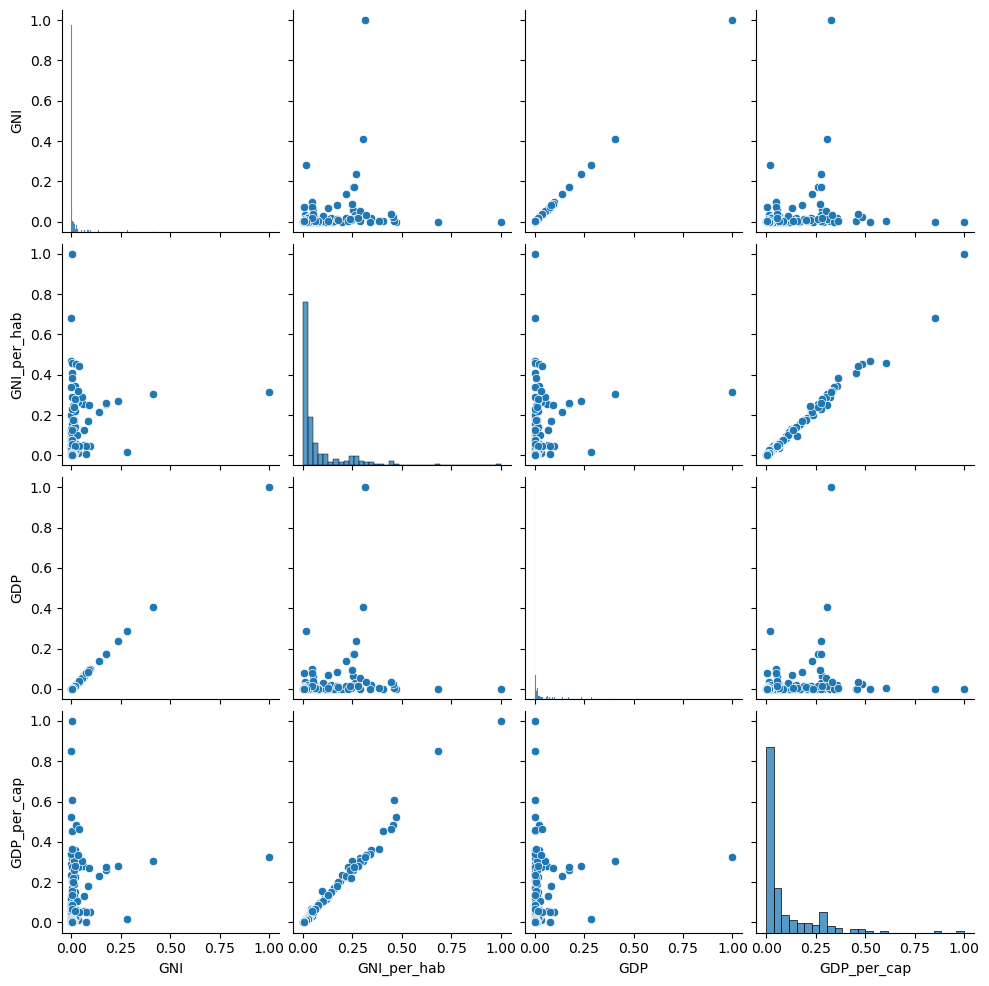

In [195]:
#Affichons graphoquement l'ensemble des nuages de points de chacun des binômes :

sns.pairplot(df1, kind="scatter")
plt.show()

On observe que GNI et GDP sont très corrélées. Le constat est analogue entre GDP_per_cap et GNI_per_hab.
Voyons sur une matrice de corrélation à quels point les variables sont corrélées entre elles :

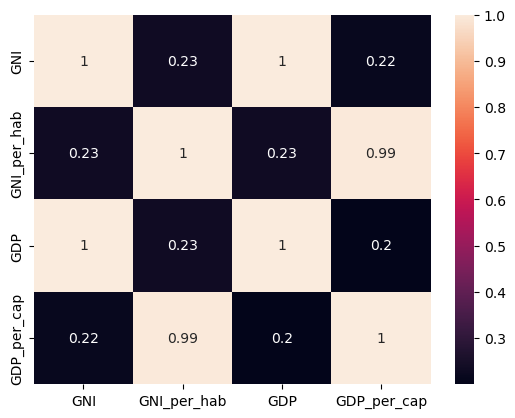

In [196]:
#Heatmap des corrélations 
correlation_mat = df1.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

Ainsi GNI et GDP sont corrélées à 100% et GDP_per_cap/GNI_per_hab sont corrélées à 99%. C'est bien trop élevée, on se propose d'en sélectionner une par paire :

In [197]:
#Nombre de valeurs NaN
df1[['GNI', 'GDP']].isna().mean(axis=0)

GNI    0.052133
GDP    0.014218
dtype: float64

In [198]:
#Voyons les pays manquant pour l'indicateur GDP
df1[df1['GDP'].isna()]

GNI  GNI_per_hab  GDP  GDP_per_cap
72   NaN          NaN  NaN          NaN
100  NaN          NaN  NaN          NaN
194  NaN          NaN  NaN          NaN

Ainsi pour les pays de code 72, 100 et 194 aucune information n'est renseignée.

In [199]:
#Voyons de quels pays il s'agit
data3['Country Name'].unique()[[72, 100, 194]]

array(['Gibraltar', 'Korea, Dem. People’s Rep.',
       'Turks and Caicos Islands'], dtype=object)

On a les îles turques et caïques, la corée du nord ainsi que Gibraltar étant tous des régions ne nous intéressant pas pour notre analyse. On sélectionne donc GDP plutôt que GNI ayant plus d'information manquante.

In [200]:
#Nombre de valeurs NaN
df1[['GNI_per_hab', 'GDP_per_cap']].isna().mean(axis=0)

GNI_per_hab    0.061611
GDP_per_cap    0.014218
dtype: float64

In [201]:
#Voyons les pays manquant pour l'indicateur GDP
df1[df1['GDP_per_cap'].isna()]

GNI  GNI_per_hab  GDP  GDP_per_cap
72   NaN          NaN  NaN          NaN
100  NaN          NaN  NaN          NaN
194  NaN          NaN  NaN          NaN

Même pays/régions non informées donc même logique. On sélectionne GDP_per_cap plutôt que GNI_per_hab

In [202]:
#Supprimons les colonnes GNI & GNI_per_hab
df1.drop(['GNI', 'GNI_per_hab'], axis=1, inplace=True)

Pour conclure, on va créer une colonne score_eco afin de quantifier la puissance économique de chaque état :

In [203]:
#Création du score
df1['score_eco'] = df1['GDP'] * df1['GDP_per_cap'] 

In [204]:
#On créer un DataFrame listant dans l'ordre alphabétique les pays :
pays = pd.DataFrame(data3['Country Name'].unique())
pays.rename(columns={0:"Pays"}, inplace=True)

In [205]:
#On fait la même chose pour le Country Code :
pays_code = pd.DataFrame(data3['Country Code'].unique())
pays_code.rename(columns={0:"Pays_Code"}, inplace=True)

In [206]:
#Fusions des dataframes
score_eco = pays.join(df1['score_eco'])
score_eco = score_eco.join(pays_code['Pays_Code'])

In [207]:
#Voyons quels sont les pays ayant le plus gros score :
score_eco.sort_values(by="score_eco", ascending=False)[:10]

Pays  score_eco Pays_Code
200   United States   0.327004       USA
95            Japan   0.124839       JPN
70          Germany   0.065826       DEU
199  United Kingdom   0.048043       GBR
65           France   0.044894       FRA
93            Italy   0.032312       ITA
34           Canada   0.024736       CAN
10        Australia   0.017404       AUS
182     Switzerland   0.016812       CHE
136     Netherlands   0.015708       NLD

On y trouve de grands pays tous connut pour être très riche. (Etats Unis, Japon, Allemagne...)

Représentons sur une carte le score de chaque pays :

In [208]:
#Création de data_carto3 pour la cartographie
data_carto3 = score_eco[~score_eco['score_eco'].isna()].sort_values(by="score_eco").reset_index().reset_index()

In [209]:
def indicateur_sur_carte(df, indic_column, color_scale, reverse_scale = True, map_title = "", scale_title = ""):
    
    fig = go_carte.Figure(data=go_carte.Choropleth(
        
        # Informations des données
        locations = df['Pays_Code'],
        z = df[indic_column],
        text = df['Pays'],
        
        # Informations de la carte
        colorscale = color_scale,
        reversescale = reverse_scale,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        
        colorbar_title = scale_title,
    ))
    
    fig.update_layout(
        title_text = map_title
    )
    
    fig.show()

In [210]:
#Carte de la puissance économique des pays dans le monde
indicateur_sur_carte(data_carto3, indic_column = 'level_0', color_scale = 'earth', reverse_scale = True,
          map_title = 'Puissance économique de chaque pays', scale_title = "Puissance Economique relative")

- On observe que les pays les plus performants économiquements se situent en Amérique du Nord, Europe de l'Ouest/du Nord, Asie (avec la Chine, la Russie et le Japon), l'Australie et le Brésil.
- Les pays moyennement performant se situe en Amérique du Sud, Afrique du Nord/du Sud, et en Asie du Sud.
- Les pays pauvres se situent pour la majorité en Afrique central et en Asie Central.

## Puissance démographique

In [211]:
#Tout d'abord sélectionnons les lignes qui nous intéressent :
data_demo = data3[(data3['Indicator Name'] == 'Population of the official age for tertiary education, both sexes (number)') | (data3['Indicator Name'] == 'Population of the official age for upper secondary education, both sexes (number)') | (data3['Indicator Name'] == 'Population, total')]

In [212]:
#On va commencer par scorer la population dans le tertiaire:
annees = ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
#Prenons la moyenne des années 1990 à 2015:
moyennes = data_demo.loc[data_demo['Indicator Name'] == 'Population of the official age for tertiary education, both sexes (number)', annees].mean(axis=1)

#Normalisons ces valeurs:
moyennes_normalize = (moyennes - min(moyennes))/(max(moyennes) - min(moyennes))
moyennes_normalize[moyennes_normalize == 1]


244216    1.0
dtype: float64

In [213]:
#On retire les pays n'ayant pas d'information et on les tri puis, on récupère les 10 meilleurs pays sous forme de liste : 
top_pays_terti = list(moyennes_normalize[~moyennes_normalize.isna()].sort_values(ascending=False)[0:10].index)

In [214]:
#Top pays tertiaire
data3[data3.index.isin(top_pays_terti)] 

Country Name Country Code  \
148926          Bangladesh          BGD   
189241              Brazil          BRA   
244216               China          CHN   
416471               India          IND   
420136           Indonesia          IDN   
559406              Mexico          MEX   
621711             Nigeria          NGA   
636371            Pakistan          PAK   
680351  Russian Federation          RUS   
848941       United States          USA   

                                           Indicator Name  Indicator Code  \
148926  Population of the official age for tertiary ed...  SP.TER.TOTL.IN   
189241  Population of the official age for tertiary ed...  SP.TER.TOTL.IN   
244216  Population of the official age for tertiary ed...  SP.TER.TOTL.IN   
416471  Population of the official age for tertiary ed...  SP.TER.TOTL.IN   
420136  Population of the official age for tertiary ed...  SP.TER.TOTL.IN   
559406  Population of the official age for tertiary ed...  SP.TER.TOTL.IN   
621711  Population of the official age for tertiary ed...  SP.TER.TOTL.IN   
636371  Population of the official age for tertiary ed...  SP.TER.TOTL.IN   
680351  Population of the official age for tertiary ed...  SP.TER.TOTL.IN   
848941  Population of the official age for tertiary ed...  SP.TER.TOTL.IN   

               1990         1991         1992         1993         1994  \
148926   10623977.0   10791367.0   10902079.0   11042777.0   11246255.0   
189241   15275652.0   15275652.0   15275652.0   15275652.0   15275652.0   
244216  130276776.0  130415872.0  128705784.0  126235088.0  122870440.0   
416471   80256168.0   81985528.0   83704840.0   85431088.0   87145440.0   
420136   18096620.0   18466958.0   18808884.0   19114148.0   19397364.0   
559406    8709377.0    9116989.0    9567477.0    9947915.0   10211860.0   
621711    8426844.0    8743148.0    9053797.0    9381190.0    9721523.0   
636371    9915391.0   10161516.0   10368053.0   10611742.0   10895524.0   
680351    9451764.0    9708955.0    9974316.0   10189043.0   10360476.0   
848941   19134968.0   18898272.0   18629816.0   18410550.0   18267840.0   

               1995  ...         2006         2007         2008         2009  \
148926   11512315.0  ...   14793269.0   14917875.0   15038863.0   15038863.0   
189241   15275652.0  ...   17592776.0   17127132.0   16754170.0   16510265.0   
244216  118333352.0  ...  113966672.0  121596760.0  127467608.0  130111424.0   
416471   88871592.0  ...  111369672.0  112694112.0  113852616.0  114887520.0   
420136   19676500.0  ...   21125412.0   21365432.0   21350326.0   21075336.0   
559406   10371383.0  ...   10363982.0   10473703.0   10600063.0   10737925.0   
621711   10078824.0  ...   13660742.0   13899360.0   14150794.0   14420778.0   
636371   11221717.0  ...   16428981.0   16955136.0   17369320.0   17692108.0   
680351   10471626.0  ...   12585146.0   12651857.0   12602438.0   12368754.0   
848941   18233686.0  ...   21312414.0   21388224.0   21466660.0   21565184.0   

               2010         2011         2012         2013         2014  \
148926   15075014.0   15122229.0   15217635.0   15303217.0   15388625.0   
189241   16510265.0   15944204.0   16006990.0   16236096.0   16380221.0   
244216  129642728.0  125873928.0  119869952.0  113027008.0  106432544.0   
416471  115795728.0  116576344.0  117250232.0  117936408.0  118681472.0   
420136   20665772.0   20239432.0   20335060.0   20531690.0   20780900.0   
559406   10881786.0   11026525.0   11167364.0   11299243.0   11420467.0   
621711   14711701.0   15027092.0   15331340.0   15665927.0   16039920.0   
636371   17940468.0   18147532.0   18297156.0   18470100.0   18656032.0   
680351   11945824.0   11310926.0   10488271.0    9651927.0    8894383.0   
848941   21679020.0   21818524.0   22135816.0   22489522.0   22731736.0   

               2015  
148926   15388625.0  
189241   16372865.0  
244216   99943816.0  
416471  119469984.0  
420136   21059620.0  
559406   11533390.0  
62171

On remarque pour ces pays qu'ils sont tous des pays avec une très forte démographie (minimum 100 millions d'habitant), on cherchera à voir si une corrélation existe avec l'indicateur 'Population, total'.

In [215]:
#On continue le scoring pour la population dans le secondaire:
#Prenons la moyenne des années 1990 à 2015:
moyennes2 = data_demo.loc[data_demo['Indicator Name'] == 'Population of the official age for upper secondary education, both sexes (number)', annees].mean(axis=1)

#Normalisons ces valeurs:
moyennes_normalize2 = (moyennes2 - min(moyennes2))/(max(moyennes2) - min(moyennes2))
moyennes_normalize2[moyennes_normalize2 == 1]

416477    1.0
dtype: float64

In [216]:
#On retire les pays n'ayant pas d'information et on les tri puis, on récupère les 10 meilleurs pays sous forme de liste :
top_pays_second = list(moyennes_normalize2[~moyennes_normalize2.isna()].sort_values(ascending=False)[0:10].index)

In [217]:
#Top pays scolarisant le plus dans le secondaire
data3[data3.index.isin(top_pays_second)] 

Country Name Country Code  \
148932          Bangladesh          BGD   
189247              Brazil          BRA   
244222               China          CHN   
416477               India          IND   
420142           Indonesia          IDN   
423807  Iran, Islamic Rep.          IRN   
559412              Mexico          MEX   
621717             Nigeria          NGA   
636377            Pakistan          PAK   
848947       United States          USA   

                                           Indicator Name  Indicator Code  \
148932  Population of the official age for upper secon...  SP.SEC.UTOT.IN   
189247  Population of the official age for upper secon...  SP.SEC.UTOT.IN   
244222  Population of the official age for upper secon...  SP.SEC.UTOT.IN   
416477  Population of the official age for upper secon...  SP.SEC.UTOT.IN   
420142  Population of the official age for upper secon...  SP.SEC.UTOT.IN   
423807  Population of the official age for upper secon...  SP.SEC.UTOT.IN   
559412  Population of the official age for upper secon...  SP.SEC.UTOT.IN   
621717  Population of the official age for upper secon...  SP.SEC.UTOT.IN   
636377  Population of the official age for upper secon...  SP.SEC.UTOT.IN   
848947  Population of the official age for upper secon...  SP.SEC.UTOT.IN   

              1990        1991        1992        1993        1994  \
148932   4597388.0   4738759.0   4896464.0   5052402.0   5204690.0   
189247  10439179.0  10439179.0  10439179.0  10439179.0  10439179.0   
244222  74715120.0  71690672.0  67716616.0  63763172.0  60317248.0   
416477  71221840.0  72608168.0  73897216.0  75258352.0  76793760.0   
420142  11778100.0  11960491.0  12127238.0  12283741.0  12430882.0   
423807   4696029.0   4945546.0   5089846.0   5243098.0   5426016.0   
559412   6381135.0   6451323.0   6438977.0   6404364.0   6377947.0   
621717   5979460.0   6203432.0   6410637.0   6630909.0   6858279.0   
636377   9033969.0   9328353.0   9604905.0   9908859.0  10237036.0   
848947  10723700.0  10703948.0  10683643.0  10724945.0  10829210.0   

              1995  ...        2006        2007        2008        2009  \
148932   5344298.0  ...  12565979.0  12576252.0  12603870.0  12657296.0   
189247  10439179.0  ...  10806628.0  10264931.0  10288554.0  10302361.0   
244222  57814068.0  ...  79682944.0  76289656.0  72095800.0  67986328.0   
416477  78554800.0  ...  93973512.0  94465728.0  94937104.0  95450352.0   
420142  12577124.0  ...  13314025.0  13150722.0  12981728.0  12854980.0   
423807   5663197.0  ...   7083965.0   6696173.0   6285889.0   5894004.0   
559412   6359242.0  ...   6584296.0   6660726.0   6743337.0   6827592.0   
621717   7083987.0  ...   9064771.0   9218403.0   9399080.0   9608628.0   
636377  10584028.0  ...  14691939.0  14820448.0  14937282.0  15052706.0   
848947  10996130.0  ...  12882710.0  12918001.0  12984536.0  13052178.0   

              2010        2011        2012        2013        2014        2015  
148932  12741303.0  12811429.0  12880749.0  12942679.0  12997460.0  13048209.0  
189247  10302361.0  10528848.0  10379362.0  10671976.0  10632570.0  10596253.0  
244222  63935432.0  60089948.0  56444740.0  52732112.0  49212488.0  46531520.0  
416477  96032912.0  96680720.0  97328080.0  97985136.0  98613256.0  99198160.0  
420142  12772024.0  12755606.0  12963577.0  13177263.0  13400031.0  13619948.0  
423807   5536368.0   5218795.0   4924092.0   4664527.0   4450791.0   4300906.0  
559412   6909111.0   6983764.0   7049175.0   7107633.0   7154249.0   7180821.0  
621717   9845856.0  10109440.0  10370957.0  10660474.0  10977676.0  11326234.0  
636377  15182885.0  15340861.0  15441405.0  15515885.0  15539628.0  15504304.0  
848947  13081354.0  13051672.0  13022033.0  12845029.0  12580923.0  12321350.0  

[10 rows x 30 columns]

Même réfléxion que pour précedemment, on observe beaucoup de pays à forte démographie.

In [218]:
#On fini le scoring avec l'indicateur 'Population, total':
#Prenons la moyenne des années 1990 à 2015:
moyennes3 = data_demo.loc[data_demo['Indicator Name'] == 'Population, total', annees].mean(axis=1)

#Normalisons ces valeurs:
moyennes_normalize3 = (moyennes3 - min(moyennes3))/(max(moyennes3) - min(moyennes3))
moyennes_normalize3[moyennes_normalize3 == 1]

244423    1.0
dtype: float64

In [219]:
#On retire les pays n'ayant pas d'information et on les tri puis, on récupère les 10 meilleurs pays sous forme de liste :
top_pays_demo = list(moyennes_normalize3[~moyennes_normalize3.isna()].sort_values(ascending=False)[0:10].index)

In [220]:
#Pays ayant les plus grandes populations
data3[data3.index.isin(top_pays_demo)]

Country Name Country Code     Indicator Name Indicator Code  \
149133          Bangladesh          BGD  Population, total    SP.POP.TOTL   
189448              Brazil          BRA  Population, total    SP.POP.TOTL   
244423               China          CHN  Population, total    SP.POP.TOTL   
416678               India          IND  Population, total    SP.POP.TOTL   
420343           Indonesia          IDN  Population, total    SP.POP.TOTL   
449663               Japan          JPN  Population, total    SP.POP.TOTL   
621918             Nigeria          NGA  Population, total    SP.POP.TOTL   
636578            Pakistan          PAK  Population, total    SP.POP.TOTL   
680558  Russian Federation          RUS  Population, total    SP.POP.TOTL   
849148       United States          USA  Population, total    SP.POP.TOTL   

                1990          1991          1992          1993          1994  \
149133  1.061886e+08  1.087274e+08  1.112219e+08  1.136951e+08  1.161823e+08   
189448  1.493521e+08  1.519766e+08  1.545643e+08  1.571327e+08  1.597051e+08   
244423  1.135185e+09  1.150780e+09  1.164970e+09  1.178440e+09  1.191835e+09   
416678  8.701335e+08  8.880549e+08  9.060211e+08  9.240578e+08  9.422042e+08   
420343  1.814368e+08  1.846160e+08  1.877661e+08  1.908795e+08  1.939453e+08   
449663  1.235370e+08  1.239210e+08  1.242290e+08  1.245360e+08  1.249610e+08   
621918  9.526999e+07  9.772632e+07  1.002216e+08  1.027617e+08  1.053558e+08   
636578  1.076786e+08  1.107304e+08  1.137471e+08  1.167496e+08  1.197696e+08   
680558  1.482920e+08  1.486240e+08  1.486890e+08  1.485200e+08  1.483360e+08   
849148  2.496230e+08  2.529810e+08  2.565140e+08  2.599190e+08  2.631260e+08   

                1995  ...          2006          2007          2008  \
149133  1.187069e+08  ...  1.453680e+08  1.471392e+08  1.488058e+08   
189448  1.622966e+08  ...  1.890124e+08  1.910266e+08  1.929790e+08   
244423  1.204855e+09  ...  1.311020e+09  1.317885e+09  1.324655e+09   
416678  9.604828e+08  ...  1.161978e+09  1.179681e+09  1.197147e+09   
420343  1.969578e+08  ...  2.298382e+08  2.329891e+08  2.361593e+08   
449663  1.254390e+08  ...  1.278540e+08  1.280010e+08  1.280630e+08   
621918  1.080115e+08  ...  1.426141e+08  1.464170e+08  1.503474e+08   
636578  1.228291e+08  ...  1.570940e+08  1.603330e+08  1.636446e+08   
680558  1.483757e+08  ...  1.430495e+08  1.428051e+08  1.427424e+08   
849148  2.662780e+08  ...  2.983799e+08  3.012312e+08  3.040940e+08   

                2009          2010          2011          2012          2013  \
149133  1.504547e+08  1.521491e+08  1.539119e+08  1.557271e+08  1.575713e+08   
189448  1.948960e+08  1.967963e+08  1.986867e+08  2.005610e+08  2.024086e+08   
244423  1.331260e+09  1.337705e+09  1.344130e+09  1.350695e+09  1.357380e+09   
416678  1.214270e+09  1.230981e+09  1.247236e+09  1.263066e+09  1.278562e+09   
420343  2.393405e+08  2.425241e+08  2.457075e+08  2.488832e+08  2.520323e+08   
449663  1.280470e+08  1.280700e+08  1.278330e+08  1.276290e+08  1.274450e+08   
621918  1.544022e+08  1.585783e+08  1.628771e+08  1.672973e+08  1.718293e+08   
636578  1.670496e+08  1.705602e+08  1.741843e+08  1.779115e+08  1.817126e+08   
680558  1.427853e+08  1.428494e+08  1.429609e+08  1.432017e+08  1.435069e+08   
849148  3.067715e+08  3.093482e+08  3.116634e+08  3.139984e+08  3.162049e+08   

                2014          2015  
149133  1.594053e+08  1.612009e+08  
189448  2.042131e+08  2.059621e+08  
244423  1.364270e+09  1.371220e+09  
416678  1.293859e+09  1.309054e+09  
420343  2.551311e+08  2.581621e+08  
449663  1.272760e+08  1.271410e+08  
621918  1.764605e+08  1.811817e+08  
636578  1.855463e+08  1.893805e+08  
680558  1.438197e+08  1.440969e+08  
849148  3.185635e+08  3.208966e+08  

[10 rows x 30 columns]

Sans surprise on observe des pays bien connut pour le grande démographie comme l'Inde, la Chine, l'Indonésie etc...

In [221]:
#Comme les pays sont classées dans le même ordre mais que moyennes_normalize,  moyennes_normalize2, moyennes_normalize3
#ne sont pas indexé de la même manière, on les réindex :

moyennes_normalize = moyennes_normalize.reset_index()
moyennes_normalize2 = moyennes_normalize2.reset_index()
moyennes_normalize3 = moyennes_normalize3.reset_index()

In [222]:
#On supprime pour les trois dataframe la colonne index
moyennes_normalize.drop(columns=['index'], inplace=True)
moyennes_normalize2.drop(columns=['index'], inplace=True)
moyennes_normalize3.drop(columns=['index'], inplace=True)

In [223]:
#Enfin on renomme les colonnes :
moyennes_normalize.rename(columns={0:"pop_terti"}, inplace=True)
moyennes_normalize2.rename(columns={0:"pop_second"}, inplace=True)
moyennes_normalize3.rename(columns={0:"pop_mondial"}, inplace=True)

In [224]:
#Il ne nous reste plus qu'à fusionner les trois data frames : 
df1 = moyennes_normalize.join(moyennes_normalize2)
df1 = df1.join(moyennes_normalize3)

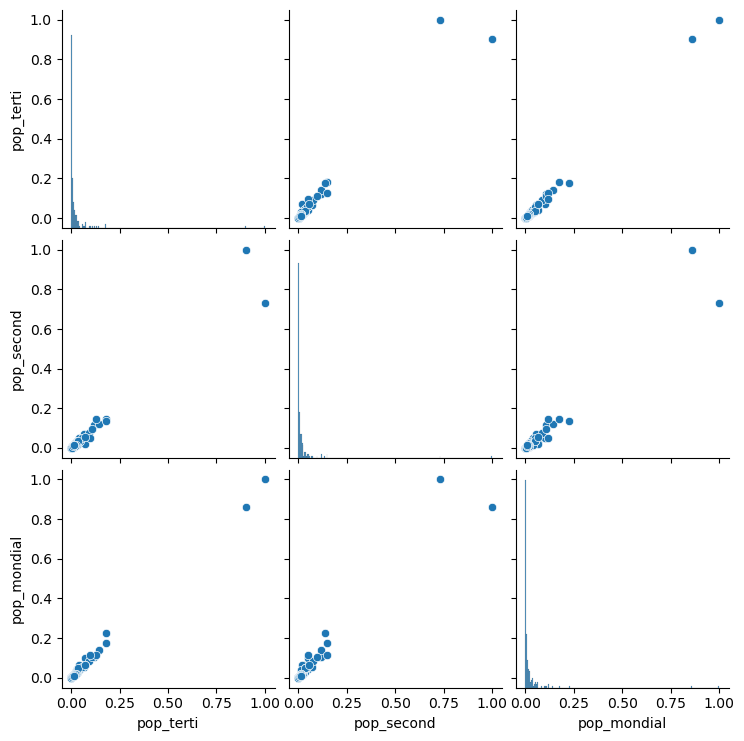

In [225]:
#Affichons graphiquement l'ensemble des nuages de points de chacun des binômes :

sns.pairplot(df1, kind="scatter")
plt.show()

On observe une corrélation positive entre les 3 variables, voyons à quel point avec une matrice de corrélation :

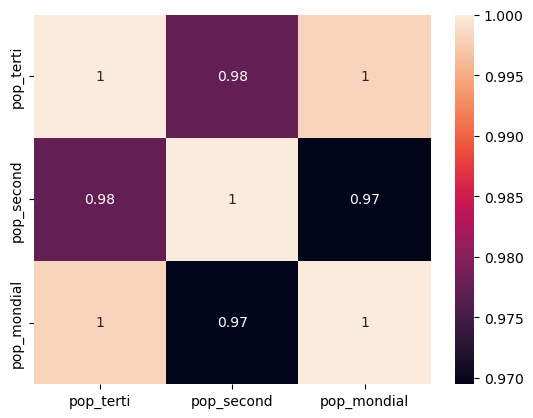

In [226]:
#Matrice de corrélation
correlation_mat = df1.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

Etant donné la très forte corrélation entre les 3 indicateurs, on se propose de ne sélectionner qu'un seul indicateur (le plus renseigné).

In [227]:
#Proportion de valeurs NaN
df1.isna().mean(axis=0)

pop_terti      0.07109
pop_second     0.07109
pop_mondial    0.00000
dtype: float64

pop_mondial est renseigné à 100%. Il sera notre indicateur démographique.

In [228]:
#On créer un DataFrame listant dans l'ordre alphabétique les pays :
pays = pd.DataFrame(data3['Country Name'].unique())
pays.rename(columns={0:"Pays"}, inplace=True)

In [229]:
#On fait la même chose pour le Country Code :
pays_code = pd.DataFrame(data3['Country Code'].unique())
pays_code.rename(columns={0:"Pays_Code"}, inplace=True)

In [230]:
#Fusions des dataframes
score_demo = pays.join(df1['pop_mondial'])
score_demo = score_demo.join(pays_code['Pays_Code'])

In [231]:
#Voyons quels sont les pays ayant le plus gros score :
score_demo.sort_values(by="pop_mondial", ascending=False)[:10]

Pays  pop_mondial Pays_Code
40                China     1.000000       CHN
86                India     0.861087       IND
200       United States     0.226093       USA
87            Indonesia     0.172532       IDN
26               Brazil     0.141289       BRA
145            Pakistan     0.115428       PAK
157  Russian Federation     0.114368       RUS
15           Bangladesh     0.106793       BGD
141             Nigeria     0.104707       NGA
95                Japan     0.099550       JPN

Représentons sur une carte le score de chaque pays :

In [232]:
#data_carto4 pour la cartographie
data_carto4 = score_demo[~score_demo['pop_mondial'].isna()].sort_values(by="pop_mondial").reset_index().reset_index()

In [233]:
def indicateur_sur_carte(df, indic_column, color_scale, reverse_scale = True, map_title = "", scale_title = ""):
    
    fig = go_carte.Figure(data=go_carte.Choropleth(
        
        # Informations des données
        locations = df['Pays_Code'],
        z = df[indic_column],
        text = df['Pays'],
        
        # Informations de la carte
        colorscale = color_scale,
        reversescale = reverse_scale,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        
        colorbar_title = scale_title,
    ))
    
    fig.update_layout(
        title_text = map_title
    )
    
    fig.show()

In [234]:
#Carte de la puissance démographique des pays dans le monde
indicateur_sur_carte(data_carto4, indic_column = 'level_0', color_scale = 'earth', reverse_scale = True,
          map_title = 'Puissance démographique de chaque pays', scale_title = "Puissance démographique relative")

Les pays les plus peuplés sont beaucoup plus étalés que les pays les plus riches. En effet sur chaque partie de chaque continent existe un pays très peuplé : 
- En Amérique du Nord (les Etats Unis)
- En Amérique du Sud (le Brésil)
- En Asie (la Chine, la Russie, l'Inde, le Pakistan)
- Au Moyen Orient (Iran,  Egypte)
- En Europe (Turquie, Allemagne)
- En Afrique (Ethiopie, Nigéria)

On a ensuite beaucoup de pays moyennement peuplé en Amérique du Sud, en Afrique et en Europe.
Enfin, on a des pays très peu peuplé en Afrique (Mauritanie, Namibie, Botswana), Amérique du Sud (Uruguay, Suriname), Europe (Estonie, Letonie, Lituanie) et Asie (Mongolie). A noté que ces pays ont aussi une très petite superficie.

## Score final

In [235]:
#On construit le score final en multipliant les 4 scores créés plus haut
score_final = pd.DataFrame(score_demo['pop_mondial'] * score_eco['score_eco'] * score_outil['score_outil'] * score_educ['score_educ'])

In [236]:
#On associe au score final le nom/le code du pays associé
df5 = score_demo[['Pays', 'Pays_Code']].join(score_final)

In [237]:
#data_carto5 pour la cartographie
data_carto5 = df5[~df5[0].isna()].sort_values(by=0).reset_index().reset_index()

In [238]:
data_carto5

level_0  index                   Pays Pays_Code             0
0          0     30                Burundi       BDI  0.000000e+00
1          1     43       Congo, Dem. Rep.       COD  0.000000e+00
2          2    122       Marshall Islands       MHL  1.200648e-22
3          3    161  Sao Tome and Principe       STP  1.552027e-22
4          4     79          Guinea-Bissau       GNB  4.226938e-22
..       ...    ...                    ...       ...           ...
179      179    199         United Kingdom       GBR  7.282086e-06
180      180     70                Germany       DEU  1.656913e-05
181      181     40                  China       CHN  4.298834e-05
182      182     95                  Japan       JPN  7.272005e-05
183      183    200          United States       USA  1.170223e-02

[184 rows x 5 columns]

In [239]:
def indicateur_sur_carte(df, indic_column, color_scale, reverse_scale = True, map_title = "", scale_title = ""):
    
    fig = go_carte.Figure(data=go_carte.Choropleth(
        
        # Informations des données
        locations = df['Pays_Code'],
        z = df[indic_column],
        text = df['Pays'],
        
        # Informations de la carte
        colorscale = color_scale,
        reversescale = reverse_scale,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        
        colorbar_title = scale_title,
    ))
    
    fig.update_layout(
        title_text = map_title
    )
    
    fig.show()

In [240]:
#Carte des pays à fort potentiel pour les services de formation en ligne
indicateur_sur_carte(data_carto5, indic_column = "level_0", color_scale = 'earth', reverse_scale = True,
          map_title = 'Pays à fort potentiel pour nos services', scale_title = "Potentiel relatif")

Les pays les plus intéressant pour nos services se situent en Amérique du Nord, en Europe de l'Ouest et en Asie de l'Est (Inde, Chine, Japon).

In [241]:
#Classement des 15 pays à fort potentiel de clients pour nos services (selon le score final)
df5.sort_values(by=0, ascending = False)[:15]

Pays Pays_Code             0
200       United States       USA  1.170223e-02
95                Japan       JPN  7.272005e-05
40                China       CHN  4.298834e-05
70              Germany       DEU  1.656913e-05
199      United Kingdom       GBR  7.282086e-06
65               France       FRA  4.813216e-06
26               Brazil       BRA  1.640085e-06
34               Canada       CAN  9.558463e-07
101         Korea, Rep.       KOR  9.048601e-07
157  Russian Federation       RUS  8.295567e-07
93                Italy       ITA  8.098618e-07
86                India       IND  3.539274e-07
173               Spain       ESP  2.998099e-07
10            Australia       AUS  1.319445e-07
125              Mexico       MEX  1.131008e-07

Créeons une heatmap afin de mettre en relief pour ce top 15 leurs score dans chacun des indicateurs : 

In [242]:
df5

Pays Pays_Code             0
0              Afghanistan       AFG  5.365104e-17
1                  Albania       ALB  3.111500e-15
2                  Algeria       DZA  8.703408e-12
3           American Samoa       ASM           NaN
4                  Andorra       AND           NaN
..                     ...       ...           ...
206  Virgin Islands (U.S.)       VIR  1.325141e-18
207     West Bank and Gaza       PSE  1.023251e-14
208            Yemen, Rep.       YEM  2.803042e-14
209                 Zambia       ZMB  3.016180e-16
210               Zimbabwe       ZWE  3.821807e-15

[211 rows x 3 columns]

In [243]:
df5 = df5.join(score_demo['pop_mondial'])
df5 = df5.join(score_eco['score_eco'])
df5 = df5.join(score_outil['score_outil'])
df5 = df5.join(score_educ['score_educ'])

In [244]:
df5_heatmap = df5.sort_values(by=0, ascending=False).copy().set_index('Pays')

In [245]:
df5_heatmap

Pays_Code         0  pop_mondial     score_eco  \
Pays                                                                      
United States                  USA  0.011702     0.226093  3.270039e-01   
Japan                          JPN  0.000073     0.099550  1.248393e-01   
China                          CHN  0.000043     1.000000  5.493388e-03   
Germany                        DEU  0.000017     0.064121  6.582621e-02   
United Kingdom                 GBR  0.000007     0.047354  4.804319e-02   
...                            ...       ...          ...           ...   
Solomon Islands                SLB       NaN     0.000341  4.246483e-07   
Somalia                        SOM       NaN     0.007826  8.557881e-07   
Timor-Leste                    TLS       NaN     0.000759  1.740868e-07   
Turks and Caicos Islands       TCA       NaN     0.000010           NaN   
Tuvalu                         TUV       NaN     0.000000  0.000000e+00   

                          score_outil    score_educ  
Pays                                                 
United States                0.605460  2.614229e-01  
Japan                        0.297648  1.965885e-02  
China                        0.009620  8.134474e-01  
Germany                      0.419734  9.352507e-03  
United Kingdom               0.517615  6.183933e-03  
...                               ...           ...  
Solomon Islands              0.001963           NaN  
Somalia                      0.000059           NaN  
Timor-Leste                       NaN  4.418868e-07  
Turks and Caicos Islands          NaN  0.000000e+00  
Tuvalu                       0.011410           NaN  

[211 rows x 6 columns]

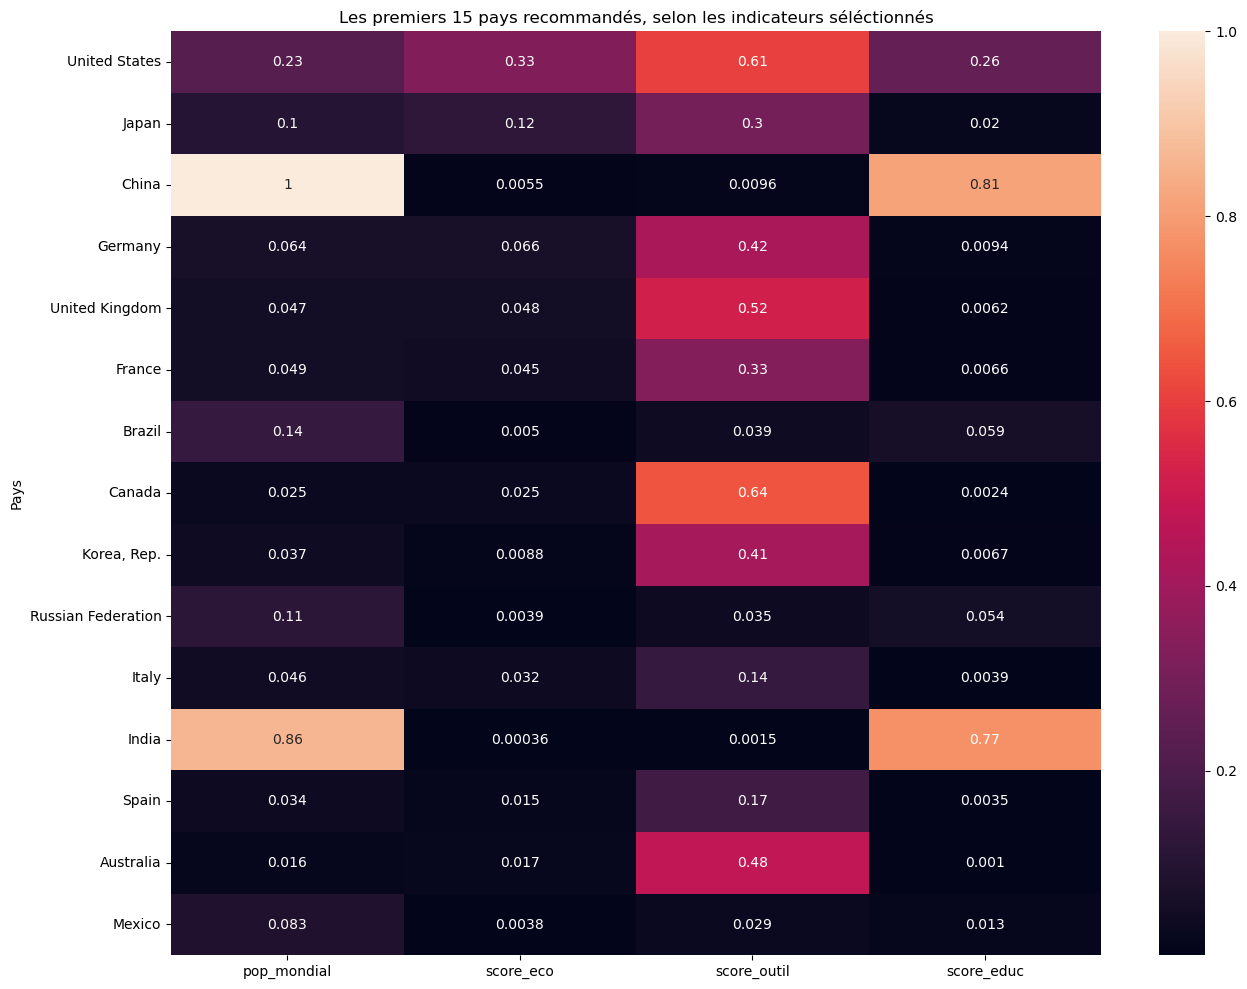

In [246]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(df5_heatmap[0:15][['pop_mondial', 'score_eco', 'score_outil', 'score_educ']], annot = True)
plt.title("Les premiers 15 pays recommandés, selon les indicateurs séléctionnés")
plt.show()

In [247]:
#On veut uniquement étudier l'évolution du top 15
df5_heatmap[:15]['Pays_Code'].index

Index(['United States', 'Japan', 'China', 'Germany', 'United Kingdom',
       'France', 'Brazil', 'Canada', 'Korea, Rep.', 'Russian Federation',
       'Italy', 'India', 'Spain', 'Australia', 'Mexico'],
      dtype='object', name='Pays')

In [248]:
#On ne sélectionne que les années après 2020, mais pas trop tardive non plus car cela n'aurait pas de sens étant donné
#la vitesse à laquelle les technolgies évoluent (par exemple).
data3_copy.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [249]:
#On sélectionne alors les années 2025, 2030 et 2035
data_predict = data3_copy[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2025', '2030', '2035']]

In [250]:
#On sélectionne uniquement les lignes informées d'au moins une information
data_predict = data_predict[data_predict[['2025', '2030', '2035']].isna().mean(axis=1) != 1]

In [251]:
#On sélectionne les pays du top 15
data_predict = data_predict[data_predict['Country Name'].isin(['United States', 'Japan', 'China', 'Germany', 'United Kingdom',
       'France', 'Brazil', 'Canada', 'Korea, Rep.', 'Russian Federation',
       'Italy', 'India', 'Spain', 'Australia', 'Mexico'])]

In [252]:
#Affichage de l'ensemble des indicateurs disponibles
data_predict['Indicator Name'].unique()

array(['Wittgenstein Projection: Mean years of schooling. Age 0-19. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 0-19. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 0-19. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Female',
       'Wittgenstein Projection: Mean Years of Schooling. Age 15+. Gender Gap',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Total',
     

<AxesSubplot:>

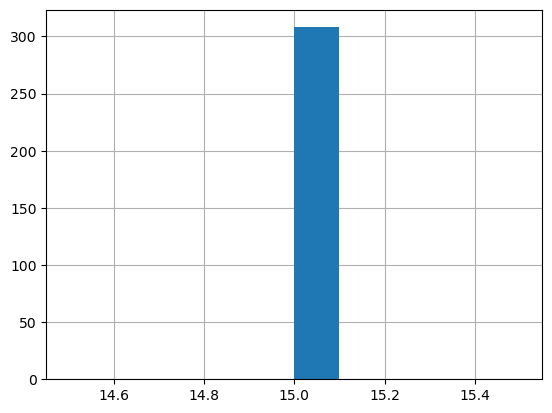

In [253]:
#Pour combien de pays sont disponible les indicateurs (sur les 15 pays retenues)
data_predict.groupby('Indicator Name').count()['Country Name'].hist() 

Ainsi les différents indicateurs sont disponibles pour l'ensemble des 15 pays, faisons maintenant notre sélection.

In [254]:
#Composition d'une liste d'indicateur pertinent
indic_name = ['Wittgenstein Projection: Mean years of schooling. Age 15-19. Total', 
              'Wittgenstein Projection: Mean years of schooling. Age 20-24. Total',
              'Wittgenstein Projection: Percentage of the population age 15-19 by highest level of educational attainment. Upper Secondary. Total',
              'Wittgenstein Projection: Percentage of the population age 20-24 by highest level of educational attainment. Post Secondary. Total',
              'Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total',
              'Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total',
             ]

Afin d'étudier l'évolution des pays concernés dans les 15 prochaines années on s'intéresse aux tranches d'âges suivantes : 
- 15-19 ans représentant notre population lycéenne
- 20-24 ans représentant notre population post bac

Pour ces tranches d'âges on considère les variables suivantes : 
- Nombre moyen d'années de scolarité 
- Pourcentage de la population de la tranche d'âge considérée atteignant le secondaire supérieur (pour les 15-19) ou le post secondaire (pour les 20-24)
- Population de la tranche d'âge considérée en millier atteignant le secondaire supérieur (pour les 15-19) ou le post secondaire (pour les 20-24)

La première variable va nous servir d'indicateur de niveau d'éducation entre les pays, la seconde variable nous indiquera la performance éducative au sein même du pays (car se rapport à la population du pays par le pourcentage), enfin la troisième mettra en valeur le rapport population/niveau d'éducation. Nous scorerons ces 3 variables et composerons un score prédictif pour les 15 prochaines années.

In [255]:
#Aucune valeurs NaN
data_predict.isna().mean()

Country Name      0.0
Country Code      0.0
Indicator Name    0.0
Indicator Code    0.0
2025              0.0
2030              0.0
2035              0.0
dtype: float64

In [256]:
#Sélection des indicateurs pertinents
data_predict = data_predict[data_predict['Indicator Name'].isin(indic_name)]


In [257]:
#Création d'une colonne prenant la moyenne des lignes pour les années 2025, 2030, 2035
data_predict['moyennes_annees'] = data_predict[['2025', '2030', '2035']].mean(axis=1)

In [258]:
#Création d'une colonne score
data_predict['score'] = 0

In [259]:
#A l'aide d'une boucle on construit pour les 6 indicateurs un score pour chacun des pays dans la colonne 'score'
for indic in indic_name:
    #Sélection des moyennes de l'indicateur indic
    moyennes_indicateur = data_predict.loc[data_predict['Indicator Name'] == indic, 'moyennes_annees']
    #Création et ajout des scores dans la colonne 'score' pour chaque pays
    data_predict.loc[data_predict['Indicator Name'] == 
                 indic, 'score'] = (moyennes_indicateur - min(moyennes_indicateur))/(max(moyennes_indicateur) - min(moyennes_indicateur))

In [260]:
#Scores généraux pour chaque pays
data_predict.groupby('Country Name').mean()['score'].sort_values(ascending = False)

Country Name
Canada                0.594199
Australia             0.586813
China                 0.553433
India                 0.479868
Japan                 0.459121
France                0.423624
United States         0.364532
Spain                 0.330534
United Kingdom        0.310414
Russian Federation    0.299461
Korea, Rep.           0.295116
Italy                 0.226020
Mexico                0.196870
Germany               0.171665
Brazil                0.054353
Name: score, dtype: float64

In [261]:
#Création d'un dataframe pour la heatmap
predict_heatmap = pd.DataFrame(data_predict['Country Name'].unique()).rename(columns={0:"pays"}).join(pd.DataFrame([data_predict[data_predict['Indicator Name'] ==
             indic]['score'].values for indic in indic_name]).T).set_index('pays').rename(columns={0:"annees_schol1", 1:"annees_schol2", 2:"high_2nd_percent", 3:"high_3rd_percent", 4:"high_2nd_thous", 5:"high_3rd_thous"})

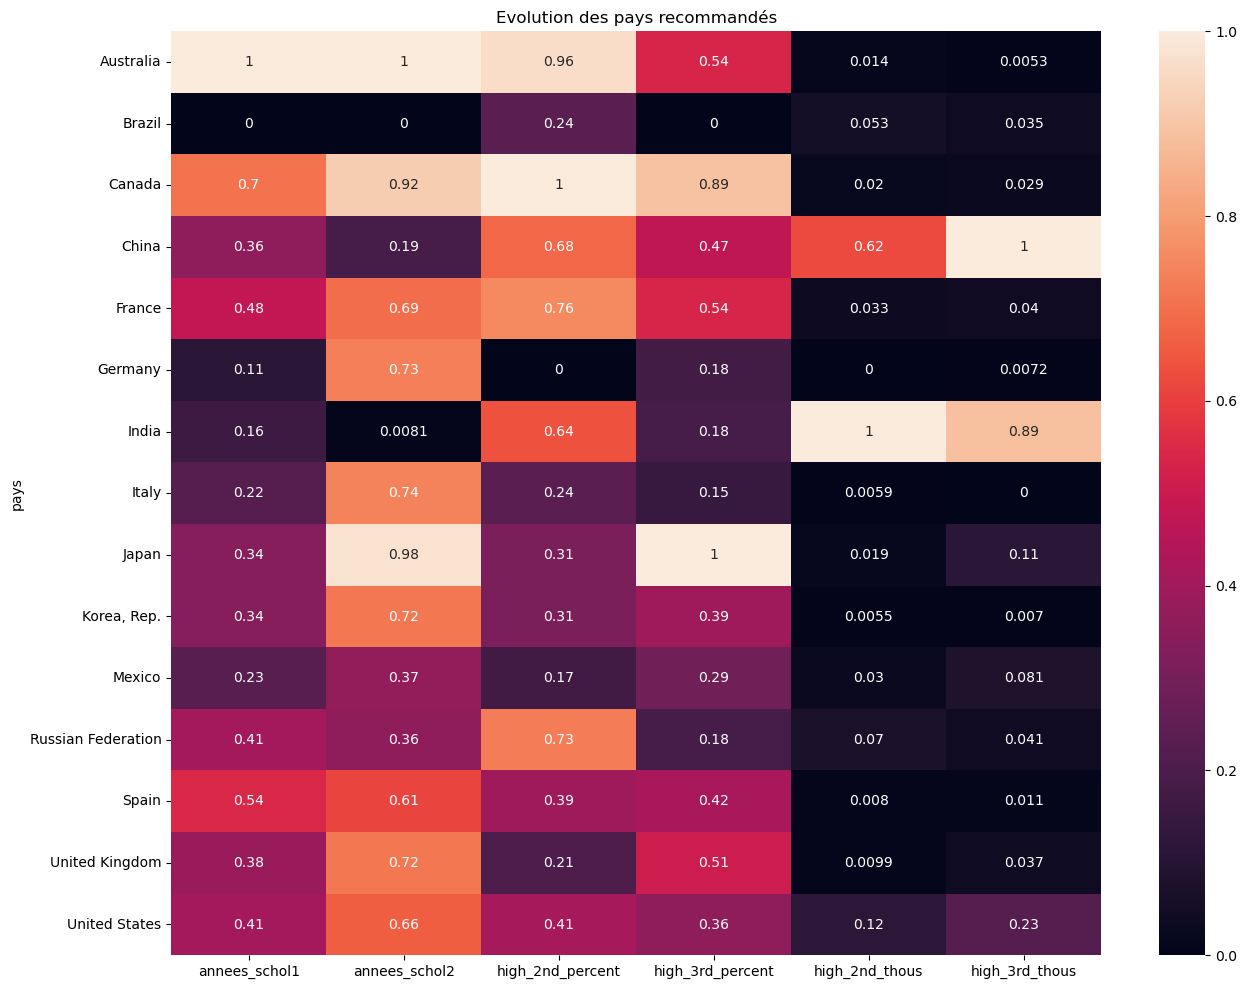

In [262]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(predict_heatmap, annot = True)
plt.title("Evolution des pays recommandés")
plt.show()

On observe que certains pays ont une évolution supposée très intéressante relativement aux autres pays à l'image des Etats Unis avec un équilibre global dans les scores ou bien de la Chine n'ayant elle non plus pas de réel point faible au regard de ces scores.

On remarque ensuite des pays avec de bonnes évolutions sur certains indicateurs mais de très mauvais sur d'autres à l'image de l'Inde ayant une grande population dans le secondaire/tertiaire mais dans le même temps un pourcentage de scolarisation dans le tertiaire très faible.

Enfin, on a des pays comme l'Allemagne ou le Brésil avec des scores de prédiction très mauvaise relativement aux autres pays. Par exemple le Brésil score trois fois à 0, deux fois en dessous de 0,1 et son meilleur score est de 0,25 ce qui n'est pas très bon.

# Conclusion

L'étude des données de la Banque mondiale sur l'Education nous a permis de répondre aux questions posées par Mark, en effet :

-> Quels sont les pays avec un fort potentiel de clients pour nos services ?

Après avoir sélectionné nos indicateurs/années et nettoyé notre base de données on a pu organiser nos indicateurs en 4 grandes catégories : l'accès aux secondaires/tertiaires, l'accès à un PC/Internet, la puissance démographique et la puissance économique. Nous avons calculé pour chaque couple pays/catégorie un score évaluant ses "performances" relatives dans chacune des catégories. Enfin, nous avons pu créer un score final résumant ainsi les "performances" générales de chaque pays. Nous avons décidé de choisir les 15 pays avec le meilleur score, ils constitueront notre liste des pays avec un fort potentiel de clients pour nos services :
- Les pays avec d'excellents résultats (Etats-Unis et Japon très équilibrés sur l'ensemble des indicateurs ; Chine avec un très gros point fort sur sa démographie et donc sa population scolarisée au lycée/post lycée).
- Les pays avec de bons résultats (Allemagne, Royaume-Uni, France, Brésil, Canada, Corée, Russie et Italie avec globalement de petits scores sur l'ensemble des indicateurs mais néanmoins un très bon score sur l'accès au PC/Internet argument indispensable pour l'accès aux formations).
- Les pays avec des résultats médiocres sur certains indicateurs mais avec beaucoup de points fort (Inde de par sa population mais très mauvais sur son pourcentage d'accès au PC/Internet ; Espagne, Australie et Mexique avec un accès raisonnable au PC/Internet).

-> Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?

Après cela, nous nous sommes intéressés à l'évolution supposée des pays en s'aidant des indicateurs "Wittgenstein Projection". En effet, après avoir sélectionné 6 indicateurs de prédictions (2 résumant le nombre moyen d'années de scolarisation au lycée et dans le tertiaire, 2 résumant le pourcentage de personnes atteignant le lycée/tertiaire et 2 résumant la population prédite dans le secondaire/tertiaire), nous avons encore pour chacun des couples pays/indicateurs crée un score puis, en prenant la moyenne de ces scores nous avons calculé pour chaque pays son score total prédictif. Celui-ci nous a donné les résultats suivants : 
- Des pays avec une évolution relative supposée très forte (Canada et Australie comme pays avec les élèves les plus "éduqués" ainsi qu'un très bon pourcentage dans le secondaire/tertiaire ; Chine et Inde sont équilibrés sur l'ensemble des indicateurs considérés).
- Des pays avec une évolution relative supposée moyenne (Japan, France, Etats-Unis, Espagne, Royaume-Unis, Russie, Corée du Sud, Italie et Mexique avec de très bon score sur l'éducation relative mais moins bon sur la population scolarisée au lycée/post lycée)
- Des pays avec une évolution relative supposée mauvaise (Brésil et Allemagne avec de très mauvais score)

-> Dans quels pays l'entreprise doit-elle opérer en priorité ?

Au vu des résultats aux différents Scoring, nous sélectionnerons 3 pays dans lesquels opérer en priorité : 
- La Chine : En effet, sa démographie est son plus grand atout. En opérant en Chine, le nombre de clients potentiels pourrait être très élevé en considérant le score très élevé de sa population scolarisée dans le secondaire/tertiaire. Par ailleurs, le score de prévision est aussi excellent pour la Chine avec des populations de plus en plus éduquées et nombreuses.
- Les Etats-Unis : Arrivé en premier de notre scoring général, les Etats-Unis performent dans tous les domaines; Puissance démographique et économique, ce pays affiche un très bon score d'accès à Internet/PC et il a le 3ème meilleur score de notre top 15 concernant la démographie scolarisée dans le secondaire/tertiaire. Par ailleurs les Etats Unis affiche un score prédictif très rassurant avec un équilibre sur l'ensemble des indicateurs.
- Le Japon : En 2ème sur notre classement général, le Japon affiche de bons scores dans tous les domaines malgré une superficie et une démographie que la Chine et les Etats Unis. De plus, il affiche dans le cadre des scores prédictifs un des meilleurs scores pour le nombre moyen d'études des élèves (ce qui signifie que beaucoup d'élèves font de longues études) ainsi que le meilleur score pour la longévité dans les études. Ainsi, l'évolution du Japon est prévue pour être l'une des meilleures.

